# **0. Introdución**
Este Notebook se utiliza para realizar un análisis descriptivo de la información, preprocesamiento de datos y entrenamiento previo de modelos

# **1. Instalación de librerias y cargue de información**



In [31]:
# Importar librerias

# Manipulación de información
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento de datos
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats

# Separación de datos para entrenamiento / prueba / validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Modelos de machine learning
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Librerias para hacer regresión con múltiples targets
from sklearn.multioutput import MultiOutputRegressor

# Modelos de deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
import torch as th
from torch import Tensor
from torch.nn.parameter import Parameter

# Métricas
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Explicacion del modelo
import shap

# Imputación de datos nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Utilidades
from itertools import product
import json
import time
import warnings
import datetime
from pathlib import Path
import os
import pickle
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
print('Librerías cargadas.')

Librerías cargadas.


In [32]:
# Cargar información
ruta_archivo = r'..\data'
nombre_archivo = '\Resultados__nicos_Saber_Pro_20231019.csv'
tipo_de_dato = {'ESTU_CODDANE_COLE_TERMINO' : str}
data_1 = pd.read_csv(ruta_archivo + nombre_archivo).reset_index(drop = True)
data_1

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0          20183   EK201830011083                 CC         COLOMBIA   
1          20183   EK201830053875                 CC         COLOMBIA   
2          20183   EK201830167993                 CC         COLOMBIA   
3          20183   EK201830168158                 CC         COLOMBIA   
4          20183   EK201830164354                 CC         COLOMBIA   
...          ...              ...                ...              ...   
1217477    20222   EK202220148630                 CC         COLOMBIA   
1217478    20222   EK202220164335                 CC         COLOMBIA   
1217479    20222   EK202220142587                 CC         COLOMBIA   
1217480    20222   EK202220116355                 CC         COLOMBIA   
1217481    20222   EK202220153024                 CC         COLOMBIA   

         ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                         11.0            BOGOTÁ                11001.0   
1                         76.0             VALLE                76736.0   
2                         73.0            TOLIMA                73001.0   
3                         68.0         SANTANDER                68081.0   
4                         11.0            BOGOTÁ                11001.0   
...                        ...               ...                    ...   
1217477                   41.0             HUILA                41396.0   
1217478                   54.0   NORTE SANTANDER                54810.0   
1217479                   11.0            BOGOTÁ                11001.0   
1217480                    5.0         ANTIOQUIA                 5001.0   
1217481                   76.0             VALLE                76001.0   

        ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0             BOGOTÁ D.C.                        NaN   
1                 SEVILLA                        NaN   
2                  IBAGUÉ               1.730010e+11   
3         BARRANCABERMEJA               1.680810e+11   
4             BOGOTÁ D.C.               1.110010e+11   
...                   ...                        ...   
1217477          LA PLATA               2.413960e+11   
1217478              TIBÚ               1.548100e+11   
1217479       BOGOTÁ D.C.               3.230010e+11   
1217480          MEDELLÍN               1.050010e+11   
1217481              CALI                        NaN   

         ESTU_COD_COLE_MCPIO_TERMINO  ...  FAMI_TIENEINTERNET  \
0                                NaN  ...                  Si   
1                                NaN  ...                  Si   
2                            73001.0  ...                  Si   
3                            68081.0  ...                  Si   
4                            11001.0  ...                  Si   
...                              ...  ...                 ...   
1217477                      41396.0  ...                  Si   
1217478                      54810.0  ...                  No   
1217479                      23001.0  ...                  Si   
1217480                       5001.0  ...                  Si   
1217481                          NaN  ...                 NaN   

                          FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0        Secundaria (Bachillerato) incompleta  NO OFICIAL - CORPORACIÓN   
1        Secundaria (Bachillerato) incompleta     OFICIAL DEPARTAMENTAL   
2                                     No sabe  NO OFICIAL - CORPORACIÓN   
3              Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
4              Educación profesional completa     OFICIAL DEPARTAMENTAL   
...                                       ...                       ...   
1217477                   Primaria incompleta          OFICIAL NACIONAL   
1217478                     Primaria completa    NO OFICIAL - FUNDACIÓN   
1217479    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
1217480  Secundaria (Bachil

In [33]:
# Definir las columnas de los puntajes
columnas_puntajes = ['MOD_RAZONA_CUANTITAT_PUNT',
                     'MOD_COMUNI_ESCRITA_PUNT',
                     'MOD_INGLES_PUNT',
                     'MOD_LECTURA_CRITICA_PUNT',
                     'MOD_COMPETEN_CIUDADA_PUNT']
# Quitar los valores nulos de las columnas de puntaje
data = data_1.copy()
for i in columnas_puntajes:
    data = data[data[i].isnull() == False]

In [34]:
# Crear la columna de target como el promedio de todos los puntajes
data['PUNTAJE_GLOBAL'] = data[columnas_puntajes].mean(axis = 1)
data

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0          20183   EK201830011083                 CC         COLOMBIA   
1          20183   EK201830053875                 CC         COLOMBIA   
2          20183   EK201830167993                 CC         COLOMBIA   
3          20183   EK201830168158                 CC         COLOMBIA   
4          20183   EK201830164354                 CC         COLOMBIA   
...          ...              ...                ...              ...   
1217477    20222   EK202220148630                 CC         COLOMBIA   
1217478    20222   EK202220164335                 CC         COLOMBIA   
1217479    20222   EK202220142587                 CC         COLOMBIA   
1217480    20222   EK202220116355                 CC         COLOMBIA   
1217481    20222   EK202220153024                 CC         COLOMBIA   

         ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                         11.0            BOGOTÁ                11001.0   
1                         76.0             VALLE                76736.0   
2                         73.0            TOLIMA                73001.0   
3                         68.0         SANTANDER                68081.0   
4                         11.0            BOGOTÁ                11001.0   
...                        ...               ...                    ...   
1217477                   41.0             HUILA                41396.0   
1217478                   54.0   NORTE SANTANDER                54810.0   
1217479                   11.0            BOGOTÁ                11001.0   
1217480                    5.0         ANTIOQUIA                 5001.0   
1217481                   76.0             VALLE                76001.0   

        ESTU_MCPIO_RESIDE  ESTU_CODDANE_COLE_TERMINO  \
0             BOGOTÁ D.C.                        NaN   
1                 SEVILLA                        NaN   
2                  IBAGUÉ               1.730010e+11   
3         BARRANCABERMEJA               1.680810e+11   
4             BOGOTÁ D.C.               1.110010e+11   
...                   ...                        ...   
1217477          LA PLATA               2.413960e+11   
1217478              TIBÚ               1.548100e+11   
1217479       BOGOTÁ D.C.               3.230010e+11   
1217480          MEDELLÍN               1.050010e+11   
1217481              CALI                        NaN   

         ESTU_COD_COLE_MCPIO_TERMINO  ...  \
0                                NaN  ...   
1                                NaN  ...   
2                            73001.0  ...   
3                            68081.0  ...   
4                            11001.0  ...   
...                              ...  ...   
1217477                      41396.0  ...   
1217478                      54810.0  ...   
1217479                      23001.0  ...   
1217480                       5001.0  ...   
1217481                          NaN  ...   

                          FAMI_EDUCACIONMADRE               INST_ORIGEN  \
0        Secundaria (Bachillerato) incompleta  NO OFICIAL - CORPORACIÓN   
1        Secundaria (Bachillerato) incompleta     OFICIAL DEPARTAMENTAL   
2                                     No sabe  NO OFICIAL - CORPORACIÓN   
3              Técnica o tecnológica completa     OFICIAL DEPARTAMENTAL   
4              Educación profesional completa     OFICIAL DEPARTAMENTAL   
...                                       ...                       ...   
1217477                   Primaria incompleta          OFICIAL NACIONAL   
1217478                     Primaria completa    NO OFICIAL - FUNDACIÓN   
1217479    Secundaria (Bachillerato) completa    NO OFICIAL - FUNDACIÓN   
1217480  Secundaria (Bachillerato) incompleta          OFICIAL NACIONAL   
1217481                                   NaN  NO OFICIAL - CORPORACIÓN   

        MOD_RAZONA_CUANTITAT_PUNT MOD_COMUNI_ESCRITA_PUNT  \
0                             161                   174

In [35]:
# Mostrar columnas
data.columns.tolist()

['PERIODO',
 'ESTU_CONSECUTIVO',
 'ESTU_TIPODOCUMENTO',
 'ESTU_PAIS_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_CODDANE_COLE_TERMINO',
 'ESTU_COD_COLE_MCPIO_TERMINO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_NOMBRE_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_NUCLEO_PREGRADO',
 'ESTU_INST_DEPARTAMENTO',
 'ESTU_INST_CODMUNICIPIO',
 'ESTU_INST_MUNICIPIO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_PRGM_CODMUNICIPIO',
 'ESTU_PRGM_MUNICIPIO',
 'ESTU_NIVEL_PRGM_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_SNIES_PRGMACADEMICO',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_NACIONALIDAD',
 'ESTU_ESTUDIANTE',
 'ESTU_GENERO',
 'ESTU_COLE_TERMINO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACI

In [42]:
# Mostrar el número de instituciones por año, evaluadas.
aux_periodos = pd.DataFrame()
for i in data['PERIODO'].unique().tolist():
    aux = pd.DataFrame({'Periodo' : [str(i)[:4]  + str(i)[-1:].zfill(2)],
                        'Total Instituciones' :len(data[data['PERIODO'] == i]['INST_NOMBRE_INSTITUCION'].unique().tolist())})
    aux_periodos = pd.concat([aux_periodos,
                              aux] , axis = 0)
aux_periodos.sort_values(by = 'Periodo')

Periodo  Total Instituciones
0  201803                  254
0  201804                   46
0  201904                  146
0  201905                  252
0  201906                   67
0  202002                   83
0  202003                  262
0  202102                  261
0  202103                  135
0  202202                  250
0  202203                   97
0  202205                  263
0  202206                  109

In [43]:
# Definir Target y tipos de datos
target = ['PUNTAJE_GLOBAL'] +  ['MOD_RAZONA_CUANTITAT_PUNT',
                                 'MOD_COMUNI_ESCRITA_PUNT',
                                 'MOD_INGLES_PUNT',
                                 'MOD_LECTURA_CRITICA_PUNT',
                                 'MOD_COMPETEN_CIUDADA_PUNT']
ignore_columns = [ 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO' ,'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE',
                  'ESTU_COD_COLE_MCPIO_TERMINO', 'INST_NOMBRE_INSTITUCION' ,'ESTU_NUCLEO_PREGRADO' , 'ESTU_INST_DEPARTAMENTO' , 'ESTU_INST_CODMUNICIPIO',
                  'ESTU_INST_MUNICIPIO' , 'ESTU_PRGM_DEPARTAMENTO' , 'ESTU_PRGM_CODMUNICIPIO' , 'ESTU_PRGM_MUNICIPIO' , 'ESTU_DEPTO_PRESENTACION' , 'ESTU_COD_MCPIO_PRESENTACION',
                  'ESTU_MCPIO_PRESENTACION' , 'ESTU_NACIONALIDAD' , 'ESTU_ESTUDIANTE' , 'ESTU_COLE_TERMINO' , 'ESTU_TIPODOCUMENTOSB11' , 'ESTU_FECHANACIMIENTO',
                  'ESTU_CODDANE_COLE_TERMINO' , 'MOD_INGLES_DESEM' , 'ESTU_NIVEL_PRGM_ACADEMICO' , 'ESTU_PRIVADO_LIBERTAD' , 'MOD_COMUNI_ESCRITA_DESEM']
ordinal_features = ['ESTU_VALORMATRICULAUNIVERSIDAD' , 'ESTU_HORASSEMANATRABAJA' , 'FAMI_ESTRATOVIVIENDA',
                   'FAMI_EDUCACIONPADRE' , 'FAMI_EDUCACIONMADRE']
numeric_features = []
categorical_features = [i for i in data.columns.tolist() if i not in target and i not in numeric_features and i not in ignore_columns and i not in ordinal_features]
categorical_features

['ESTU_COD_RESIDE_DEPTO',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_COD_DEPTO_PRESENTACION',
 'INST_COD_INSTITUCION',
 'INST_CARACTER_ACADEMICO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_METODO_PRGM',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_SNIES_PRGMACADEMICO',
 'ESTU_GENERO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'INST_ORIGEN']

# **2. Exploración de datos**

In [44]:
# Quitar las columnas que se ignoran
data = data.drop(columns = ignore_columns)

In [45]:
# Describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161914 entries, 0 to 1217481
Data columns (total 30 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ESTU_COD_RESIDE_DEPTO           1158657 non-null  float64
 1   ESTU_COD_RESIDE_MCPIO           1158657 non-null  float64
 2   ESTU_COD_DEPTO_PRESENTACION     1161824 non-null  float64
 3   INST_COD_INSTITUCION            1161914 non-null  int64  
 4   INST_CARACTER_ACADEMICO         1161914 non-null  object 
 5   ESTU_PRGM_ACADEMICO             1161914 non-null  object 
 6   ESTU_METODO_PRGM                1161914 non-null  object 
 7   ESTU_VALORMATRICULAUNIVERSIDAD  1150686 non-null  object 
 8   ESTU_PAGOMATRICULABECA          1150221 non-null  object 
 9   ESTU_PAGOMATRICULACREDITO       1150300 non-null  object 
 10  ESTU_HORASSEMANATRABAJA         1109299 non-null  object 
 11  ESTU_SNIES_PRGMACADEMICO        1161912 non-null  float64
 12  

In [46]:
data.describe()

ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
count           1.158657e+06           1.158657e+06   
mean            6.636466e+01           2.995069e+04   
std             1.912195e+03           2.588547e+04   
min             0.000000e+00           1.000000e+00   
25%             1.100000e+01           1.100100e+04   
50%             1.500000e+01           1.540700e+04   
75%             5.200000e+01           5.235600e+04   
max             9.999900e+04           9.999900e+04   

       ESTU_COD_DEPTO_PRESENTACION  INST_COD_INSTITUCION  \
count                 1.161824e+06          1.161914e+06   
mean                  2.104383e+01          2.327839e+03   
std                   2.103136e+01          1.423053e+03   
min                   0.000000e+00          1.101000e+03   
25%                   1.100000e+01          1.701000e+03   
50%                   1.100000e+01          1.824000e+03   
75%                   1.800000e+01          2.812000e+03   
max                   9.900000e+01          9.932000e+03   

       ESTU_SNIES_PRGMACADEMICO  MOD_RAZONA_CUANTITAT_PUNT  \
count              1.161912e+06               1.161914e+06   
mean               3.900662e+04               1.474435e+02   
std                4.056164e+04               3.209778e+01   
min                1.000000e+00               0.000000e+00   
25%                2.935000e+03               1.240000e+02   
50%                1.562300e+04               1.470000e+02   
75%                9.077300e+04               1.700000e+02   
max                1.108320e+05               3.000000e+02   

       MOD_COMUNI_ESCRITA_PUNT  MOD_LECTURA_CRITICA_PUNT  MOD_INGLES_PUNT  \
count             1.161914e+06              1.161914e+06     1.161914e+06   
mean              1.448562e+02              1.500175e+02     1.540919e+02   
std               3.193333e+01              3.094232e+01     3.362031e+01   
min               4.700000e+01              0.000000e+00     0.000000e+00   
25%               1.260000e+02              1.280000e+02     1.320000e+02   
50%               1.420000e+02              1.500000e+02     1.510000e+02   
75%               1.650000e+02              1.720000e+02     1.750000e+02   
max               3.000000e+02              3.000000e+02     3.000000e+02   

       MOD_COMPETEN_CIUDADA_PUNT  PUNTAJE_GLOBAL  
count               1.161914e+06    1.161914e+06  
mean                1.455402e+02    1.240500e+02  
std                 3.368059e+01    2.024762e+01  
min                 0.000000e+00    1.066667e+01  
25%                 1.220000e+02    1.098333e+02  
50%                 1.470000e+02    1.230000e+02  
75%                 1.700000e+02    1.375000e+02  
max                 3.000000e+02    2.325000e+02

In [47]:
# Mostrar valores nulos
null_values_count = pd.DataFrame(data.isnull().sum() / data.shape[0]).sort_values(by = 0 , ascending = False).T
null_values_count = null_values_count.T.reset_index()
null_values_count.columns = ['Variable' , '% de nulos']
null_values_count.index = null_values_count['Variable']
null_values_count = null_values_count.drop(columns = ['Variable'])
null_values_count['% de nulos'] = round(null_values_count['% de nulos'] * 100 , 2)
null_values_count

% de nulos
Variable                                  
FAMI_TIENEAUTOMOVIL                   6.21
FAMI_TIENELAVADORA                    5.53
FAMI_TIENECOMPUTADOR                  5.30
ESTU_HORASSEMANATRABAJA               4.53
FAMI_ESTRATOVIVIENDA                  4.50
FAMI_TIENEINTERNET                    3.87
FAMI_EDUCACIONMADRE                   3.42
FAMI_EDUCACIONPADRE                   3.35
ESTU_PAGOMATRICULABECA                1.01
ESTU_PAGOMATRICULACREDITO             1.00
ESTU_PAGOMATRICULAPROPIO              1.00
ESTU_PAGOMATRICULAPADRES              0.99
ESTU_VALORMATRICULAUNIVERSIDAD        0.97
ESTU_COD_RESIDE_MCPIO                 0.28
ESTU_COD_RESIDE_DEPTO                 0.28
ESTU_GENERO                           0.01
ESTU_COD_DEPTO_PRESENTACION           0.01
ESTU_SNIES_PRGMACADEMICO              0.00
ESTU_ESTADOINVESTIGACION              0.00
ESTU_METODO_PRGM                      0.00
ESTU_PRGM_ACADEMICO                   0.00
INST_CARACTER_ACADEMICO               0.00
INST_COD_INSTITUCION                  0.00
INST_ORIGEN                           0.00
MOD_RAZONA_CUANTITAT_PUNT             0.00
MOD_COMUNI_ESCRITA_PUNT               0.00
MOD_LECTURA_CRITICA_PUNT              0.00
MOD_INGLES_PUNT                       0.00
MOD_COMPETEN_CIUDADA_PUNT             0.00
PUNTAJE_GLOBAL                        0.00

In [48]:
# Quitar categorias con más del 50% de nans
to_drop_features = [i for i in null_values_count.T.columns.tolist() if null_values_count.T[i].values[0] > 50]
data = data.drop(columns = to_drop_features)
# Re definir variables
categorical_features = [i for i in categorical_features if i in data.columns.tolist()]
numeric_features = [i for i in numeric_features if i in data.columns.tolist()]
print('Variables Eliminadas:')
to_drop_features

Variables Eliminadas:


[]

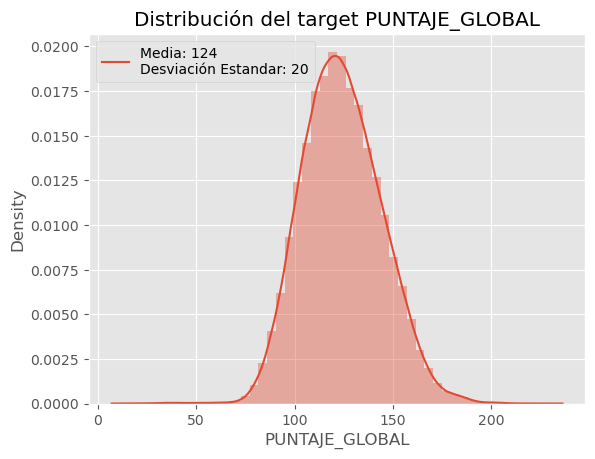

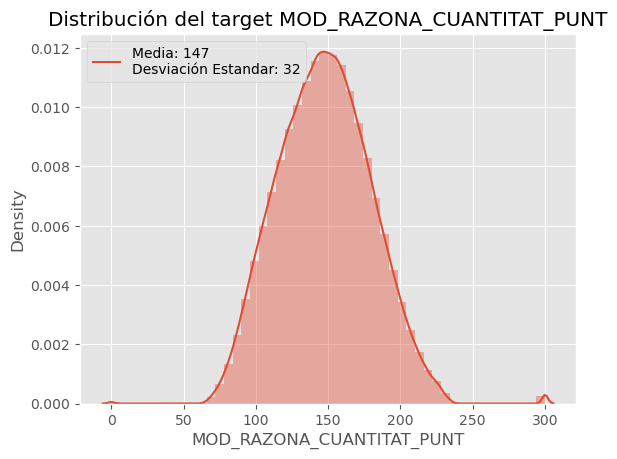

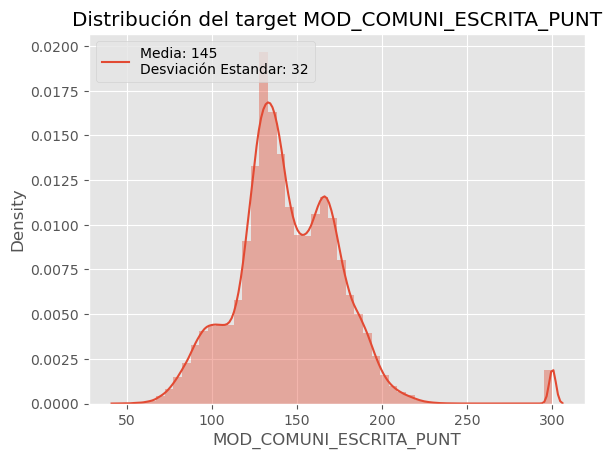

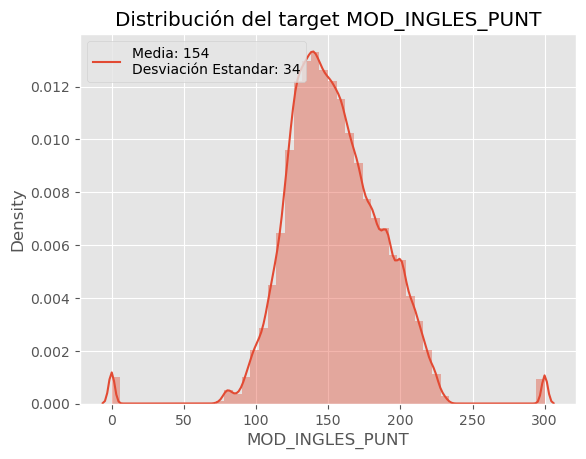

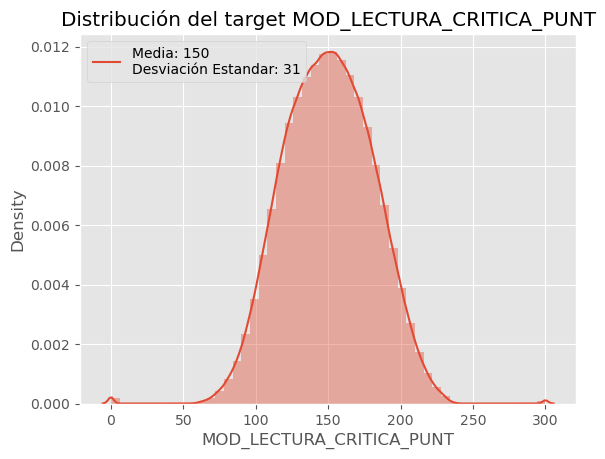

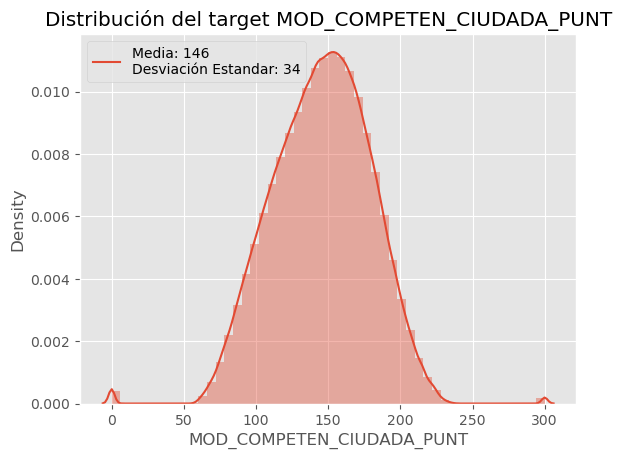

In [49]:
# Mostrar distribución del target
for i in target:
    plt.figure()
    sns.distplot(data[i])
    plt.title('Distribución del target ' + str(i))
    plt.legend([f'Media: {round(data[i].values.mean())}\nDesviación Estandar: {round(data[i].values.std())}'], loc='upper left')
    plt.show()

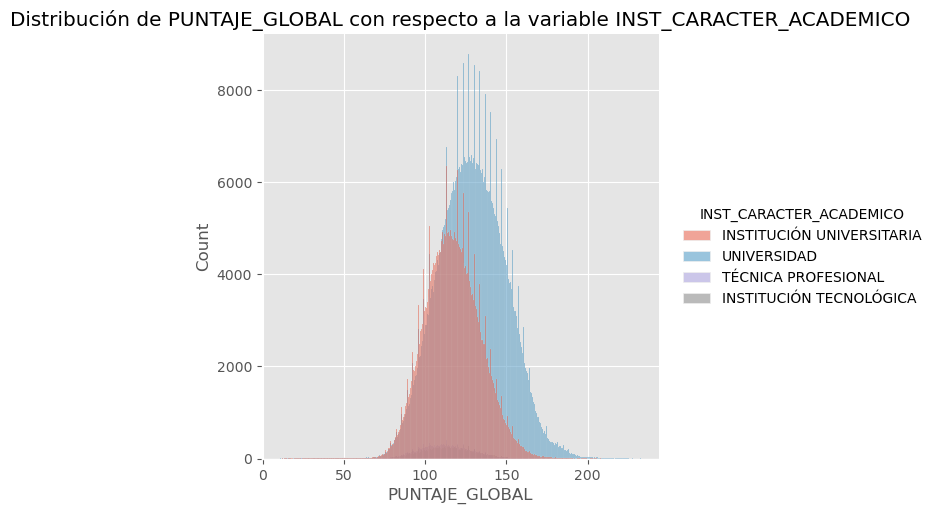

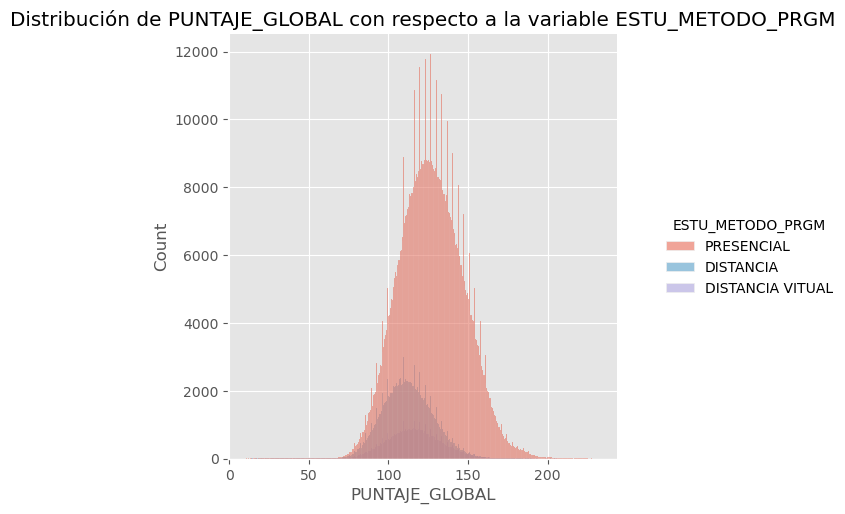

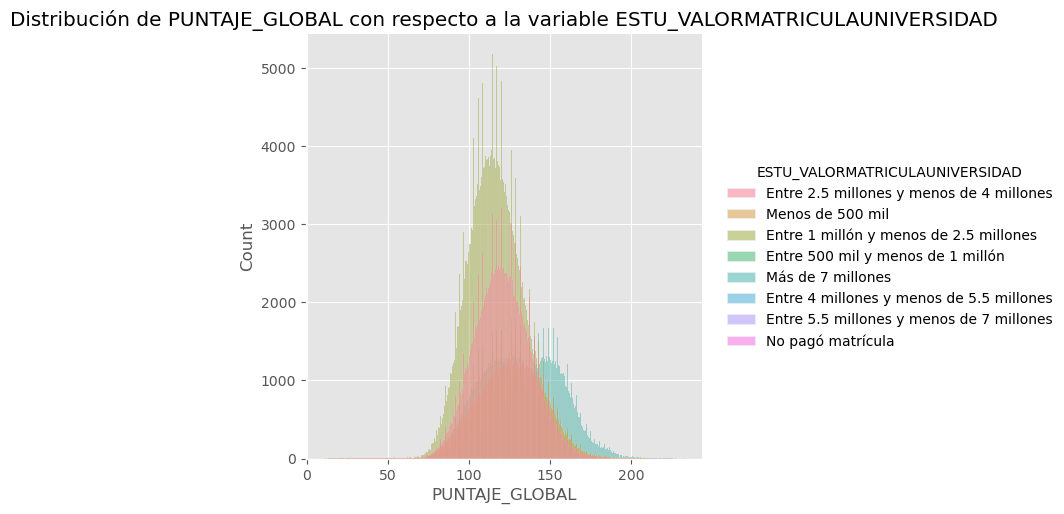

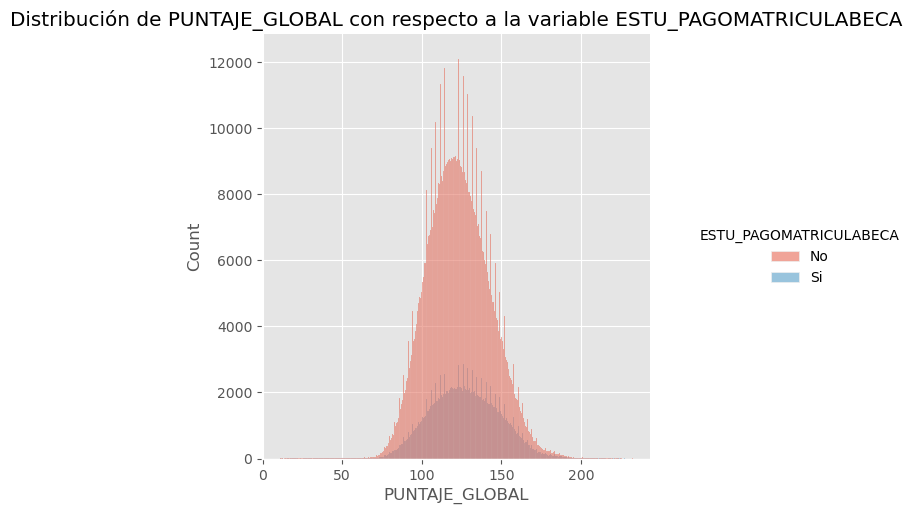

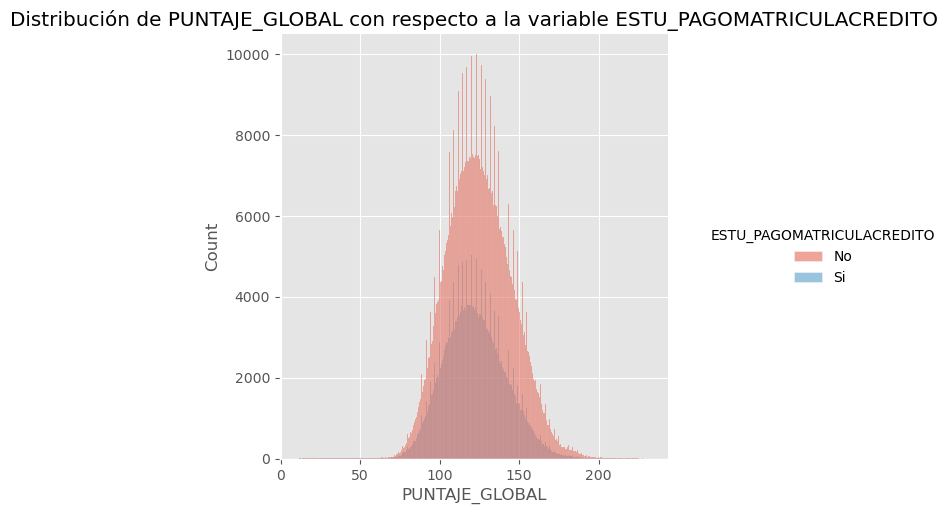

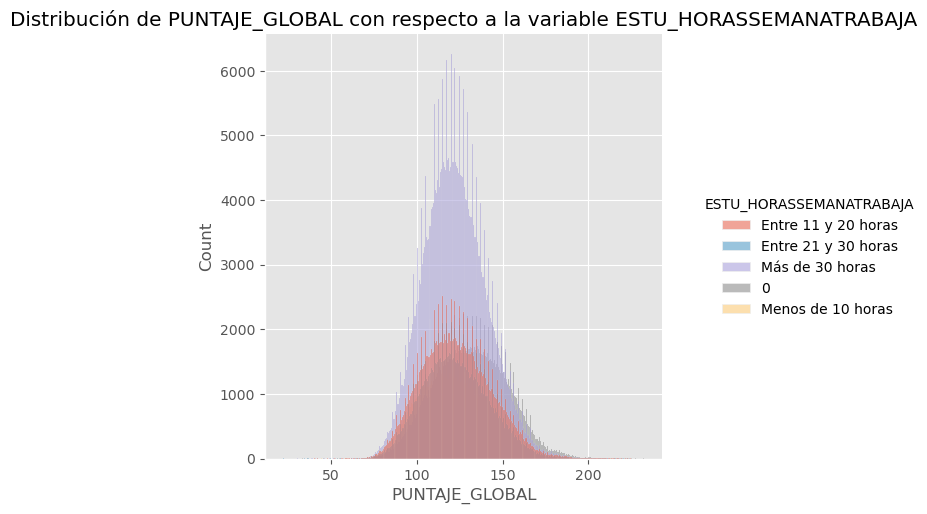

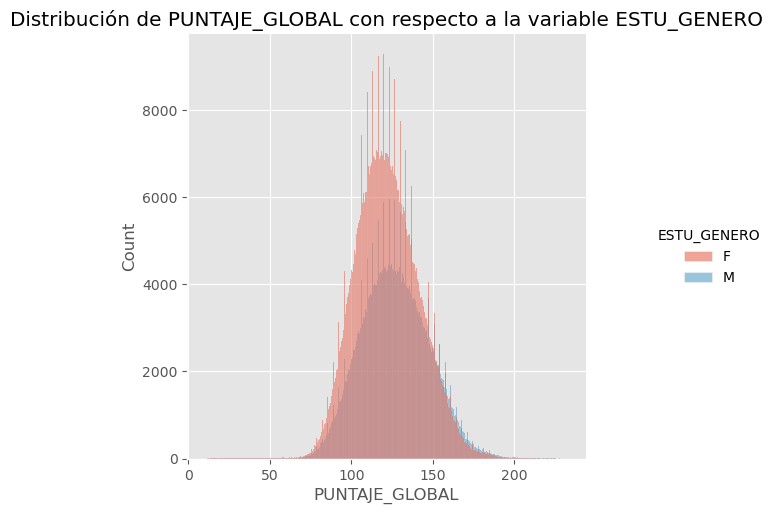

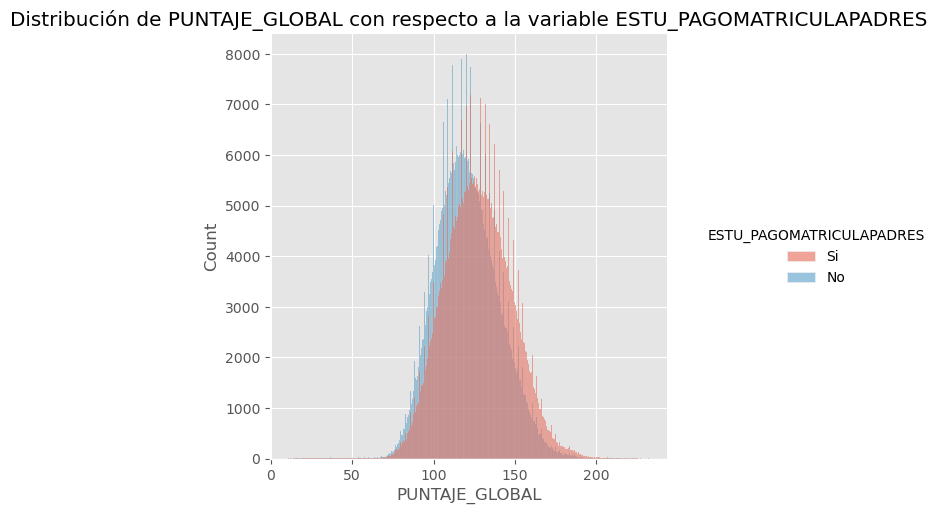

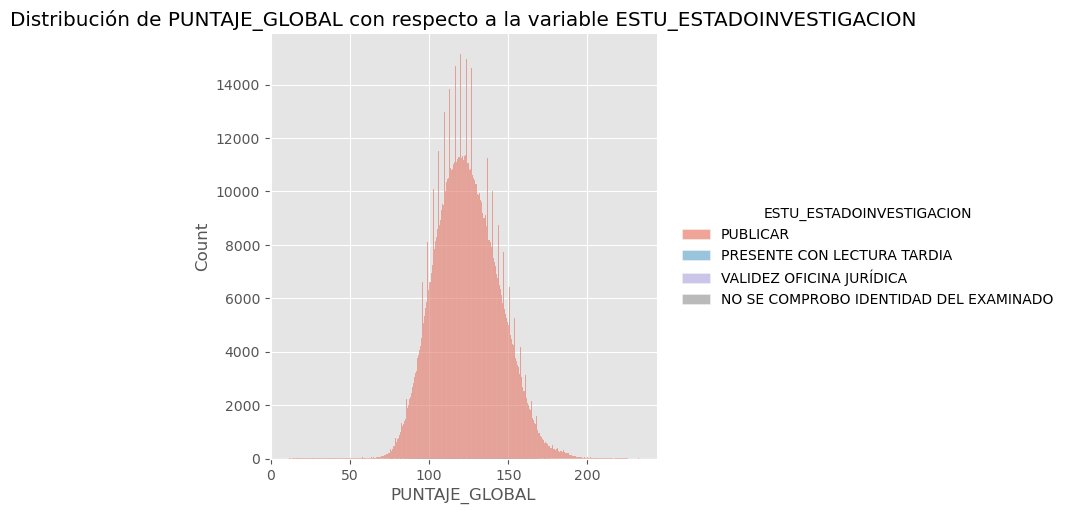

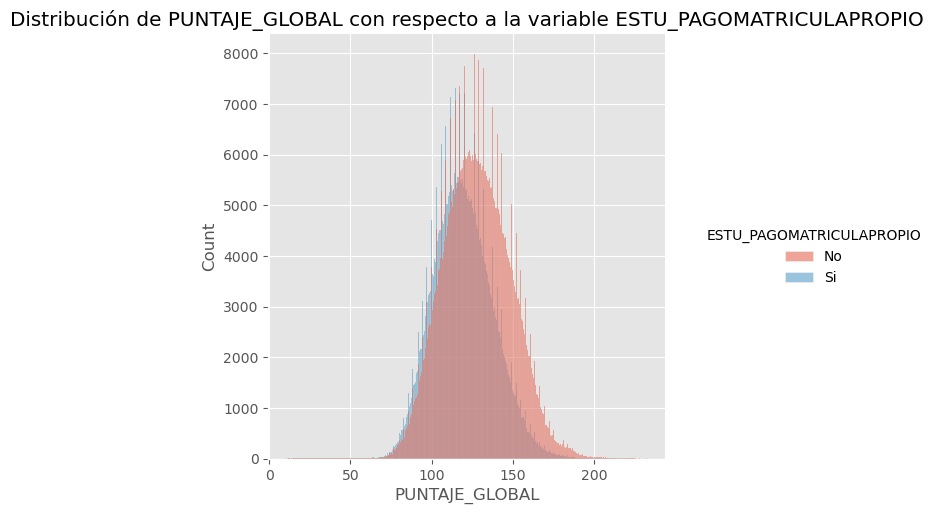

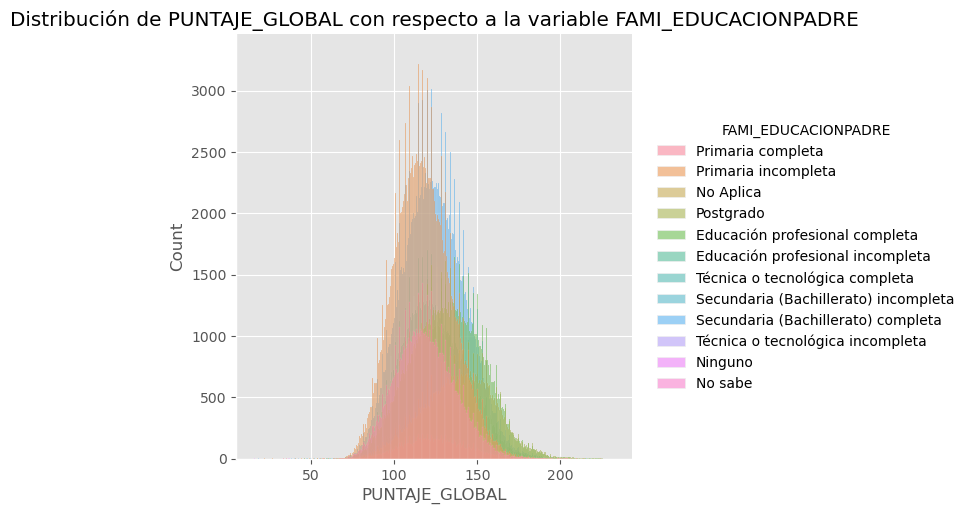

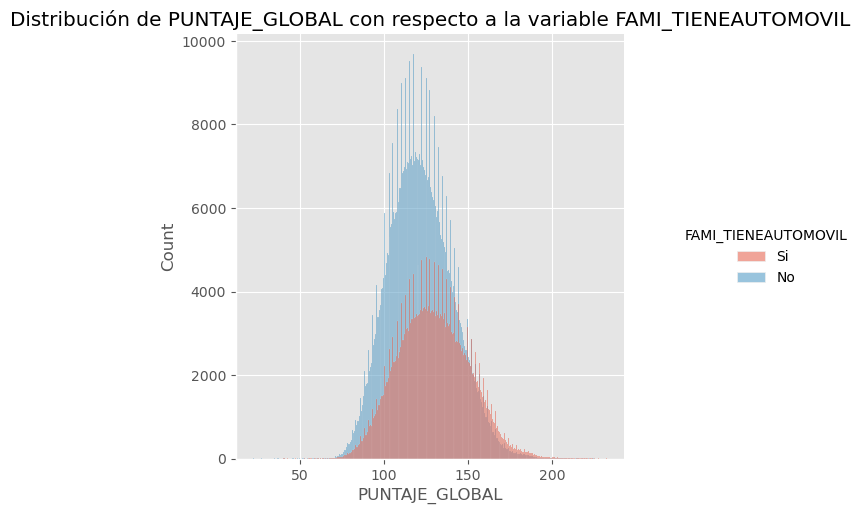

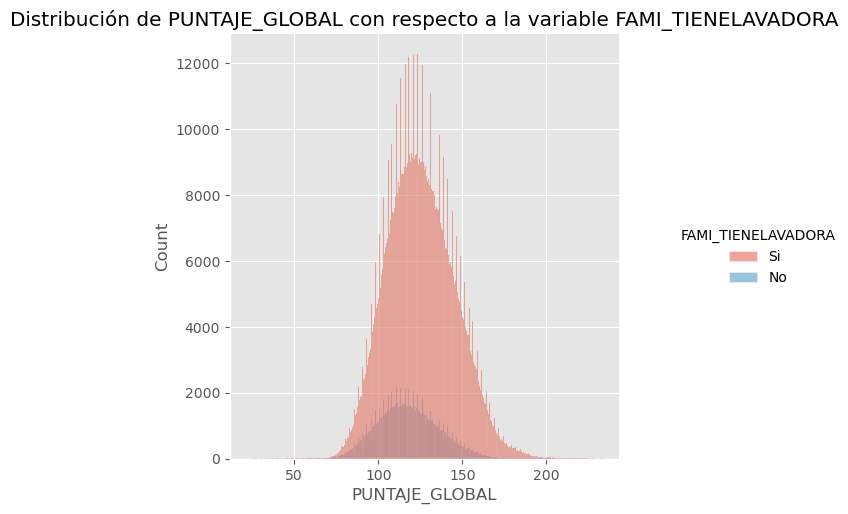

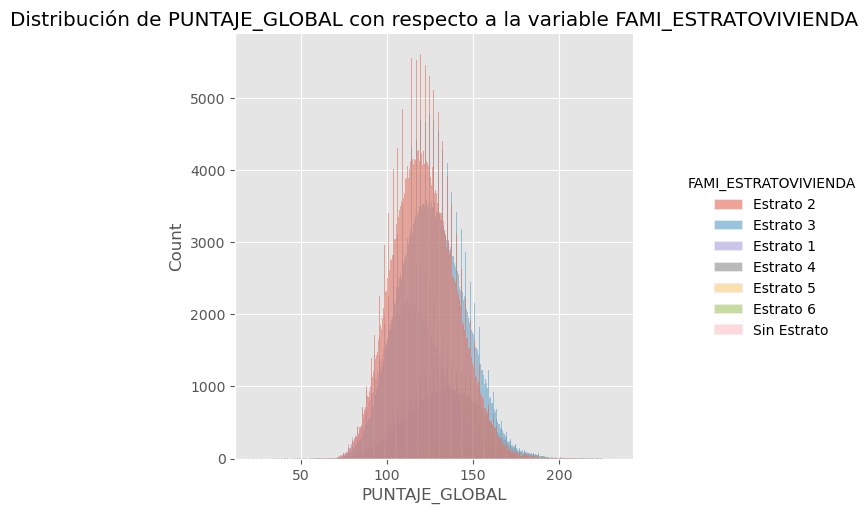

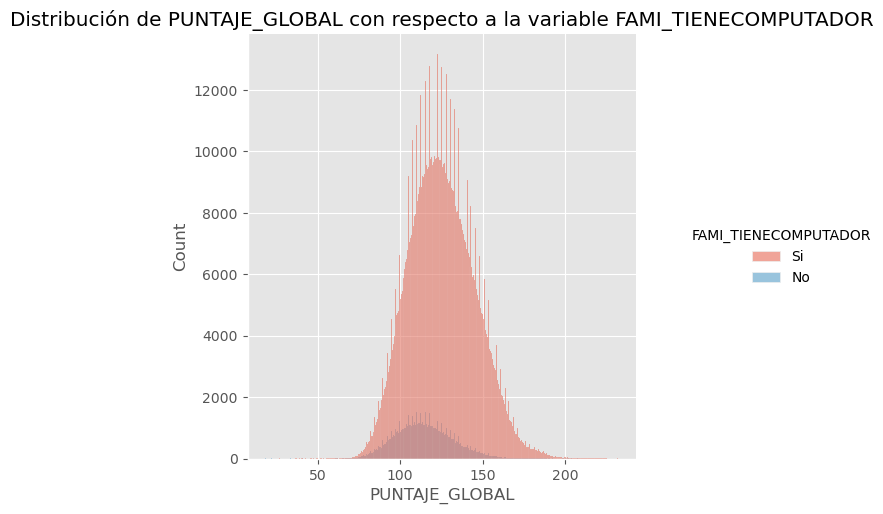

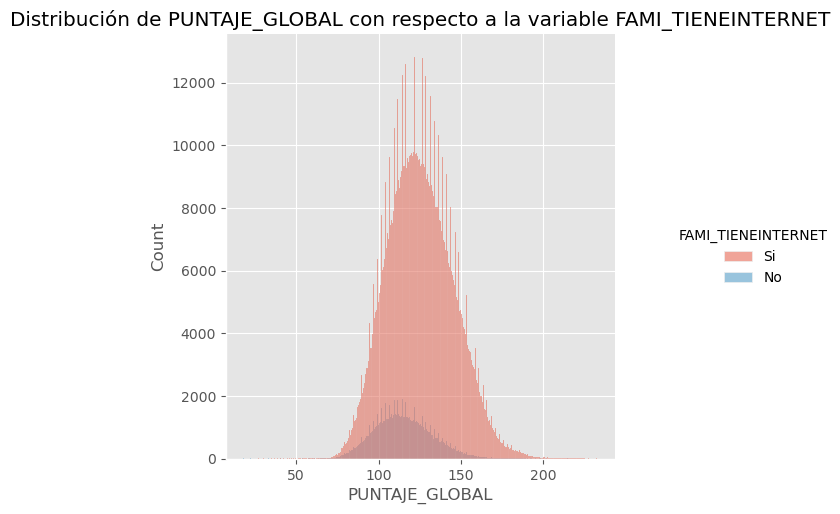

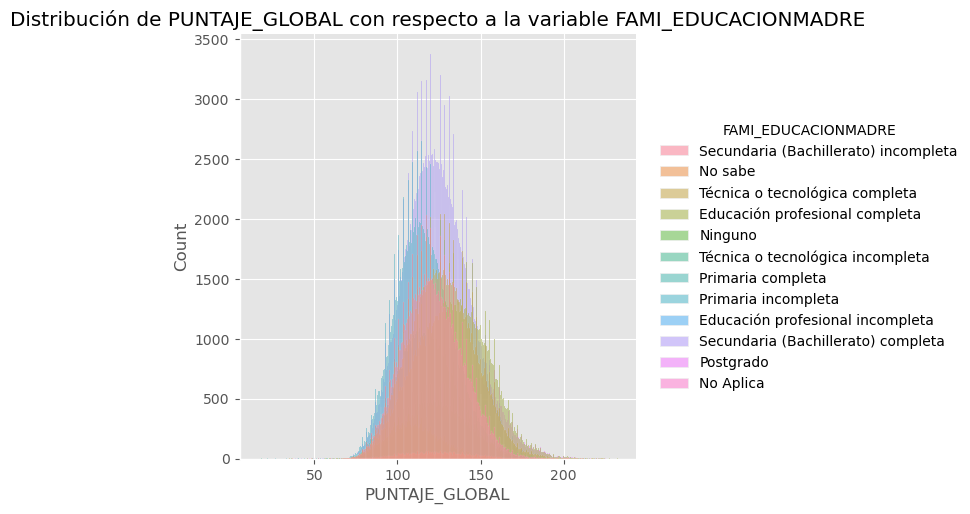

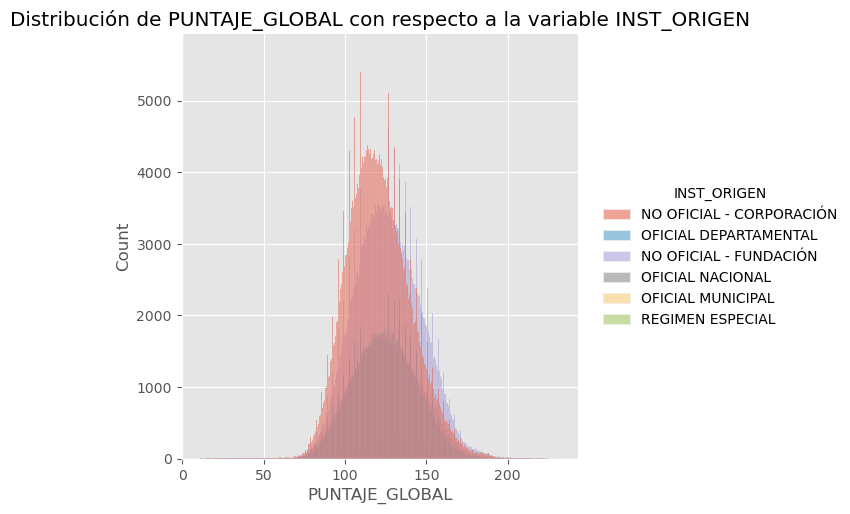

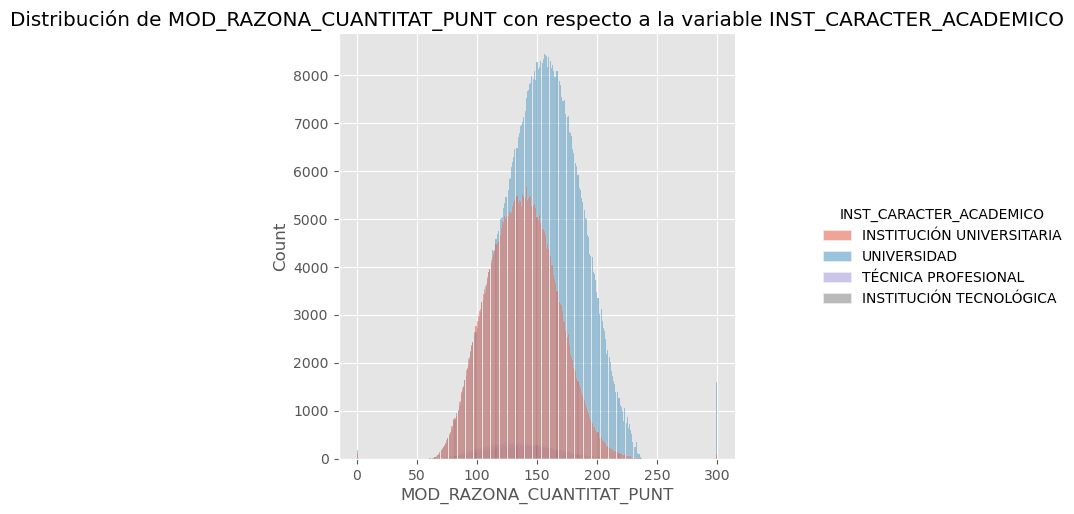

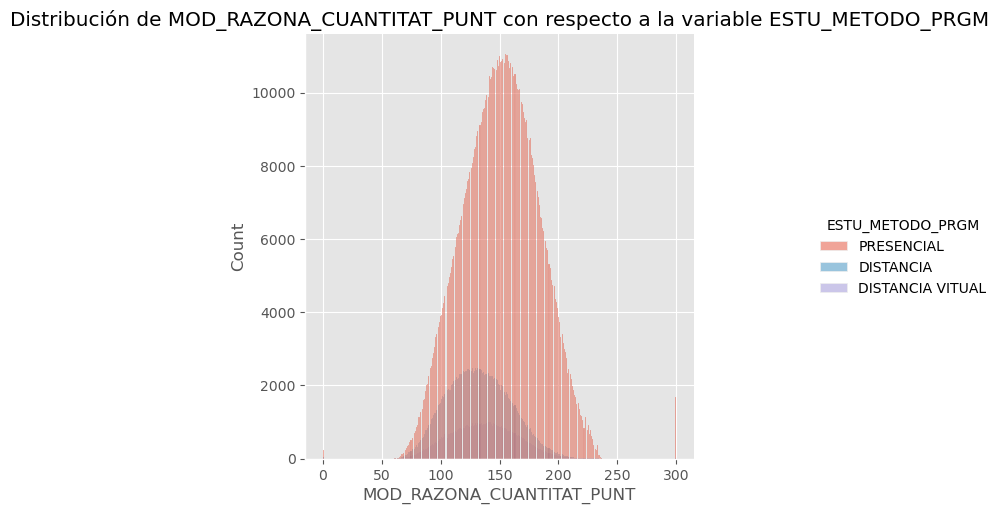

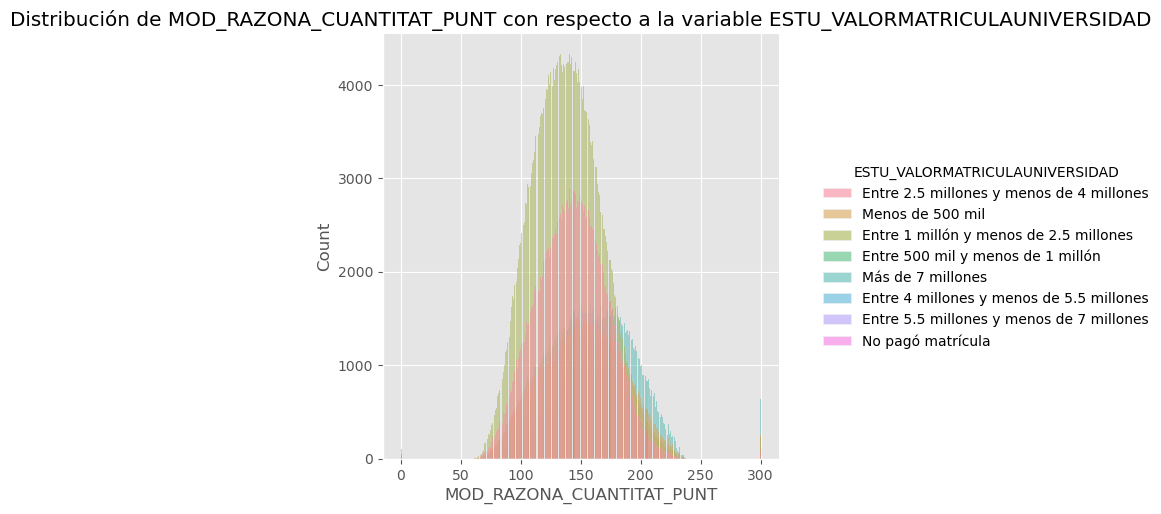

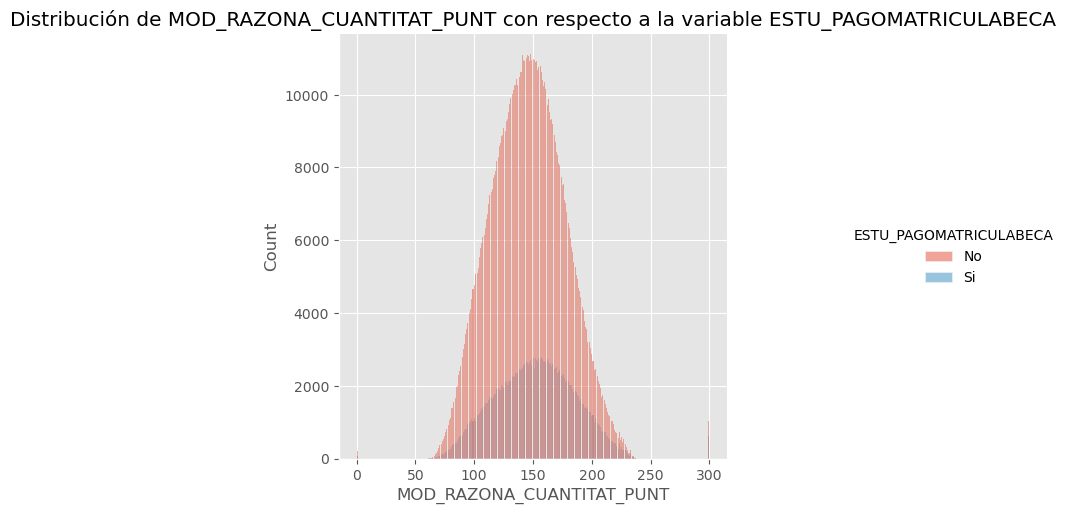

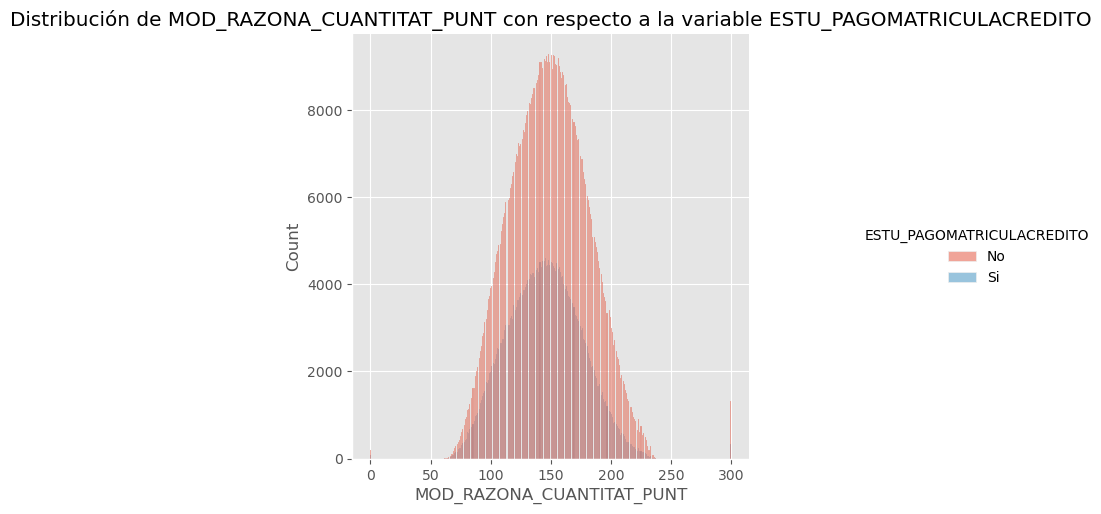

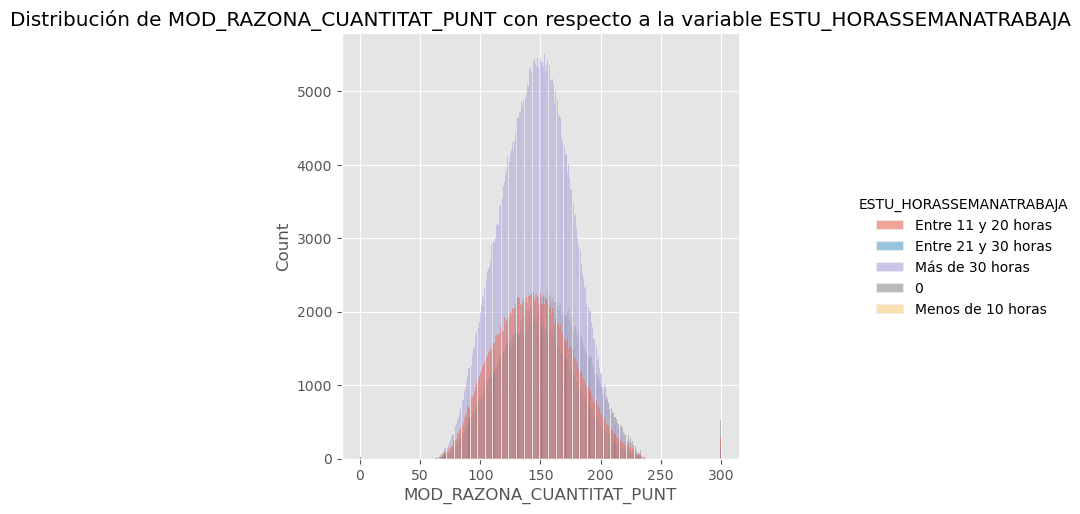

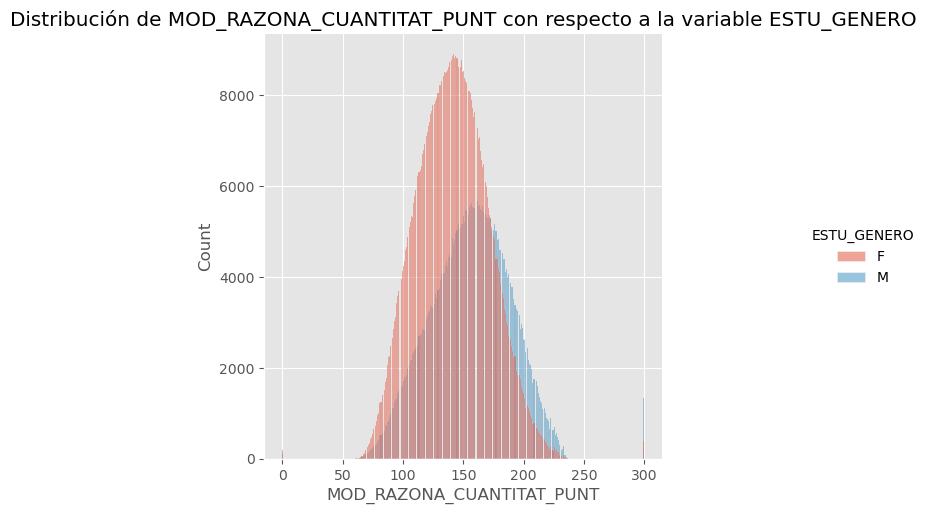

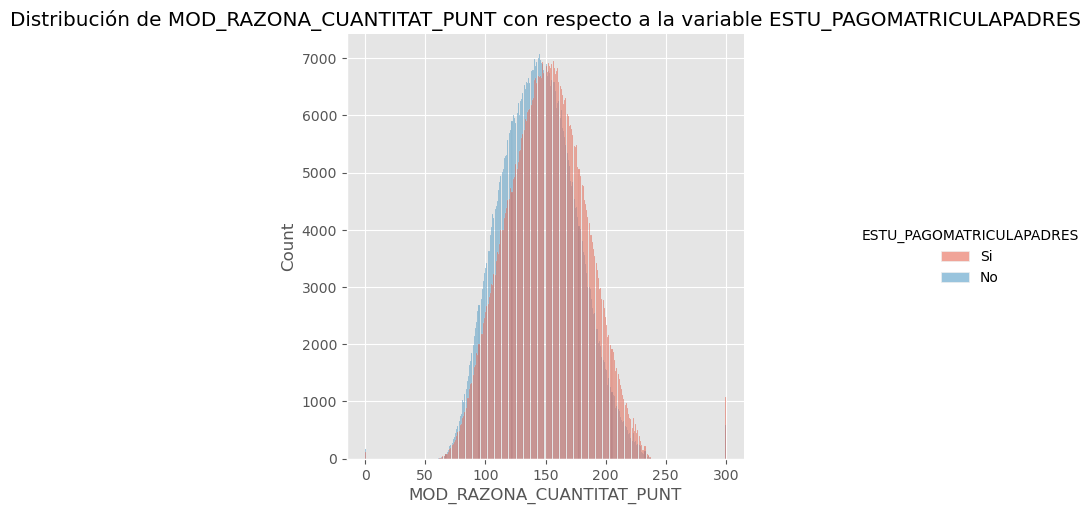

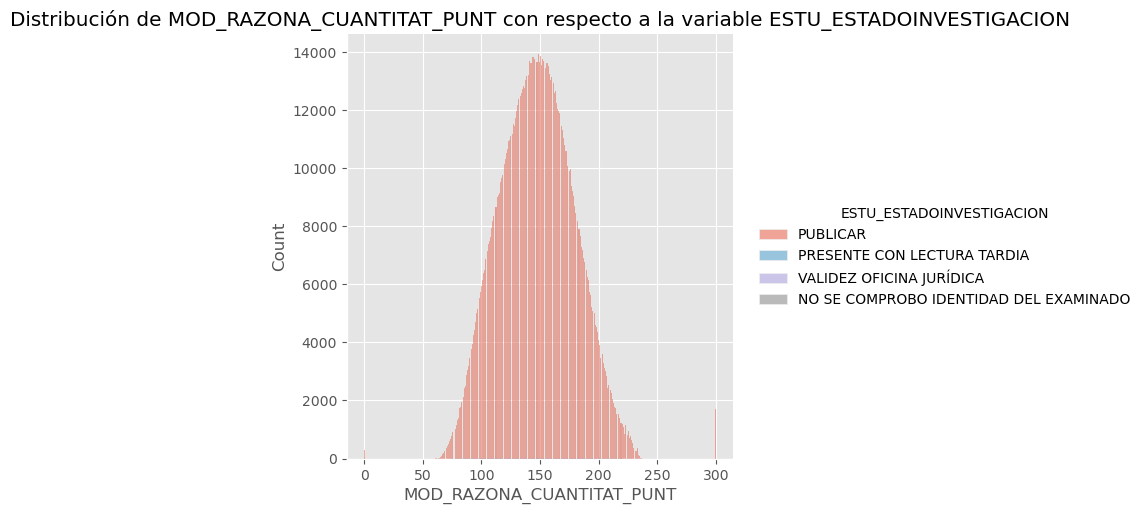

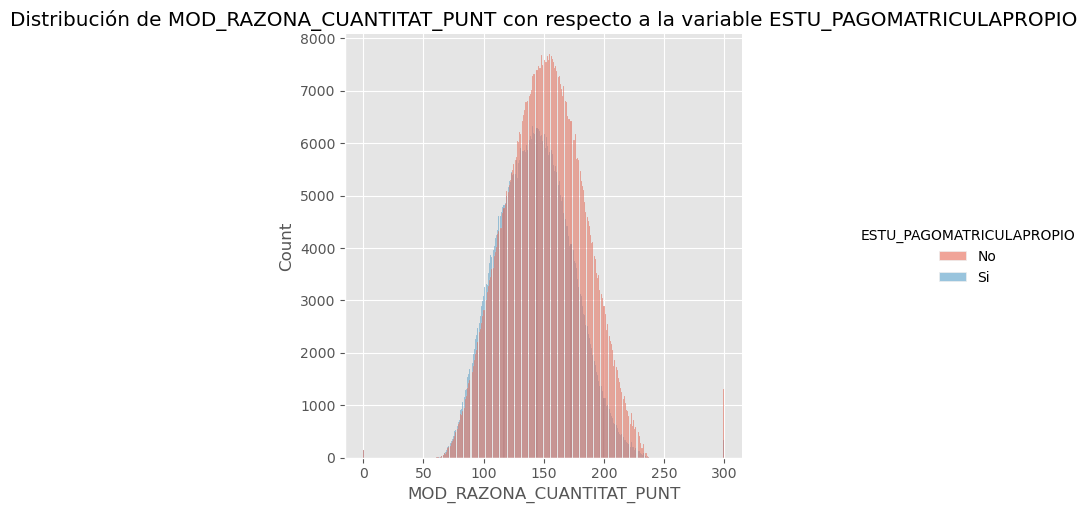

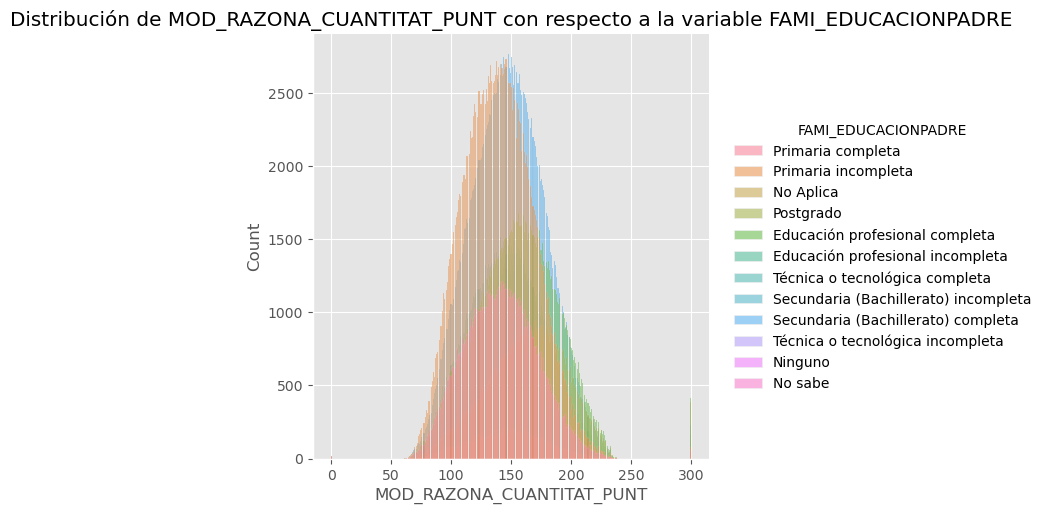

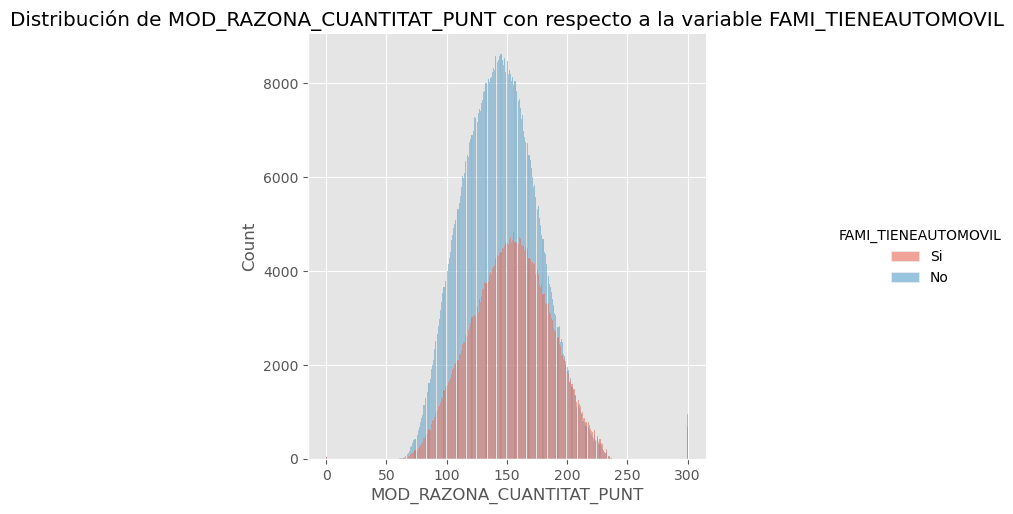

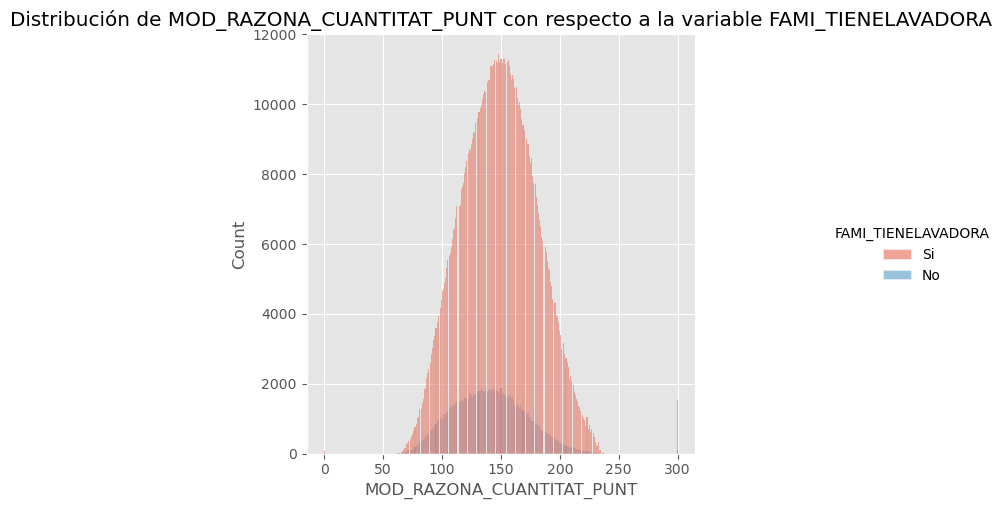

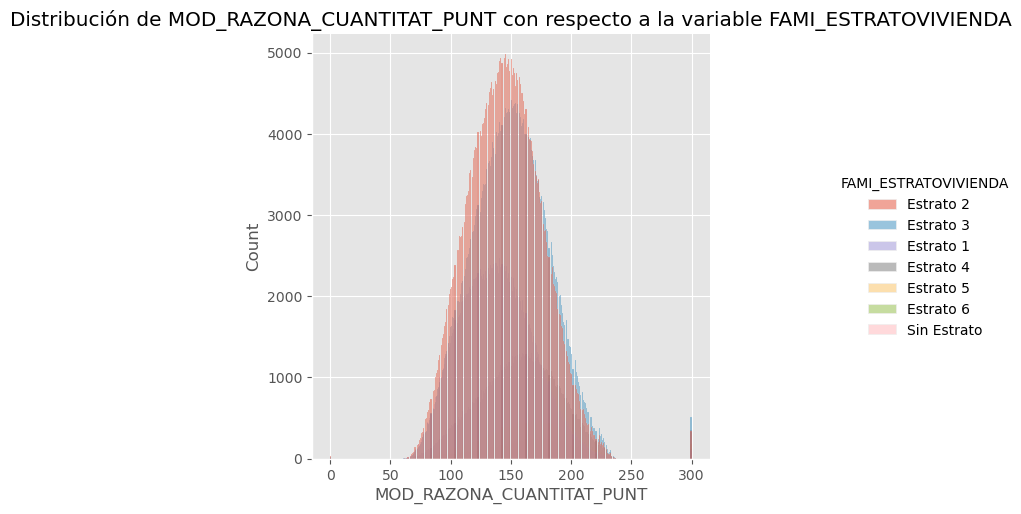

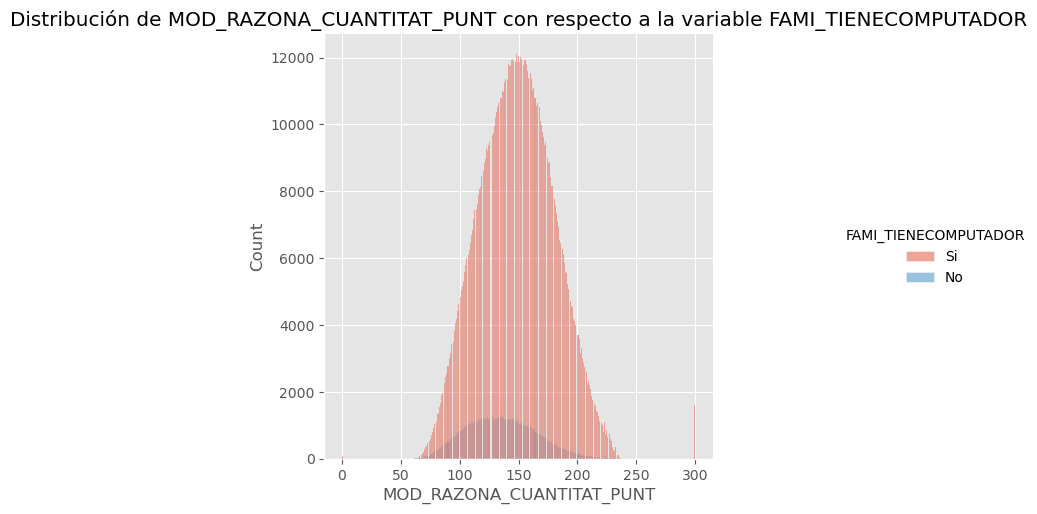

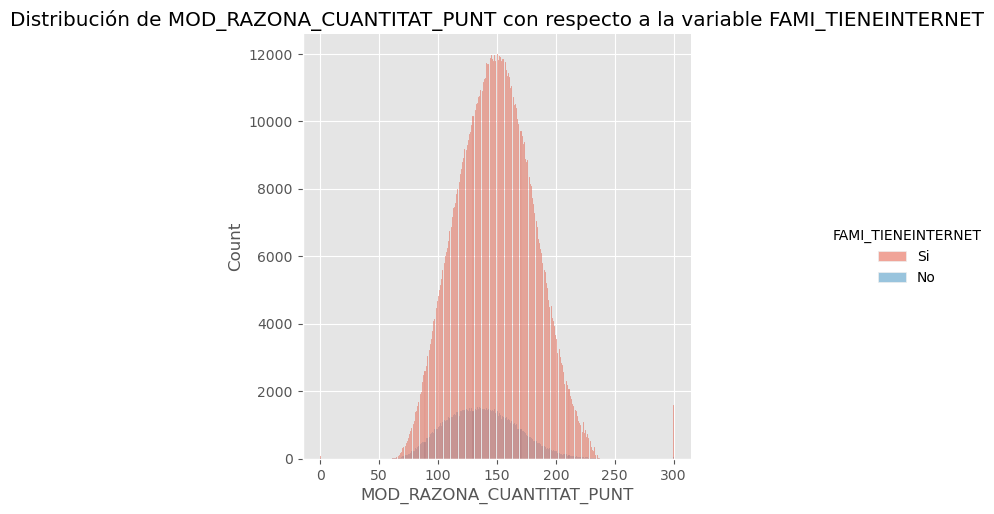

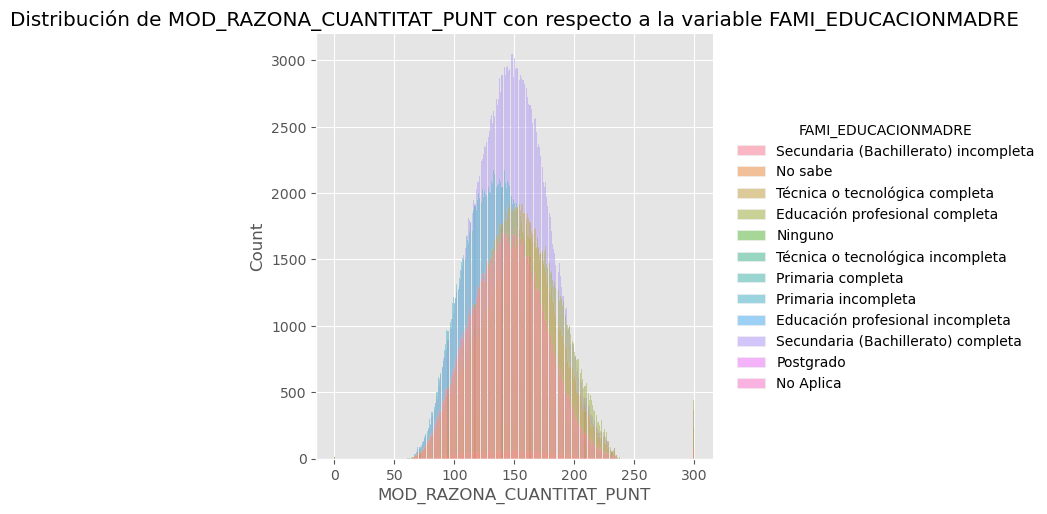

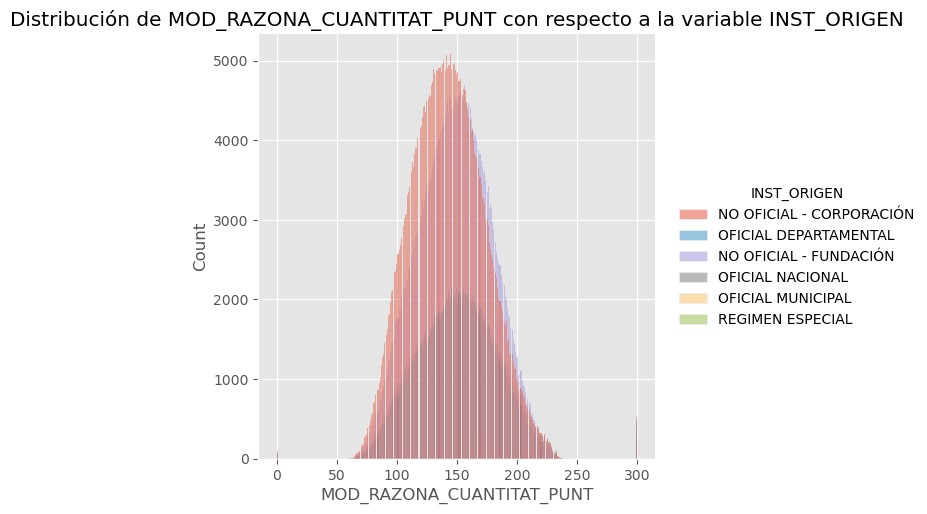

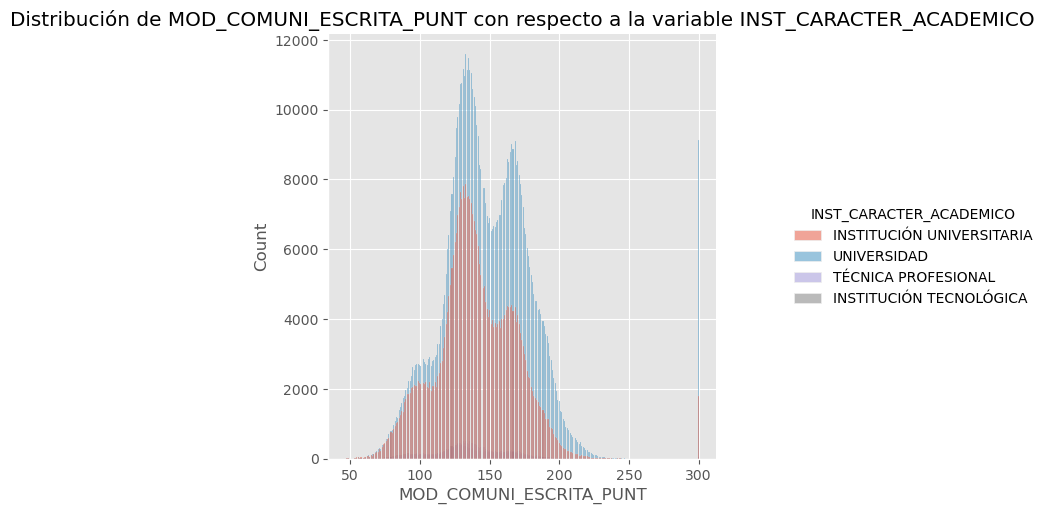

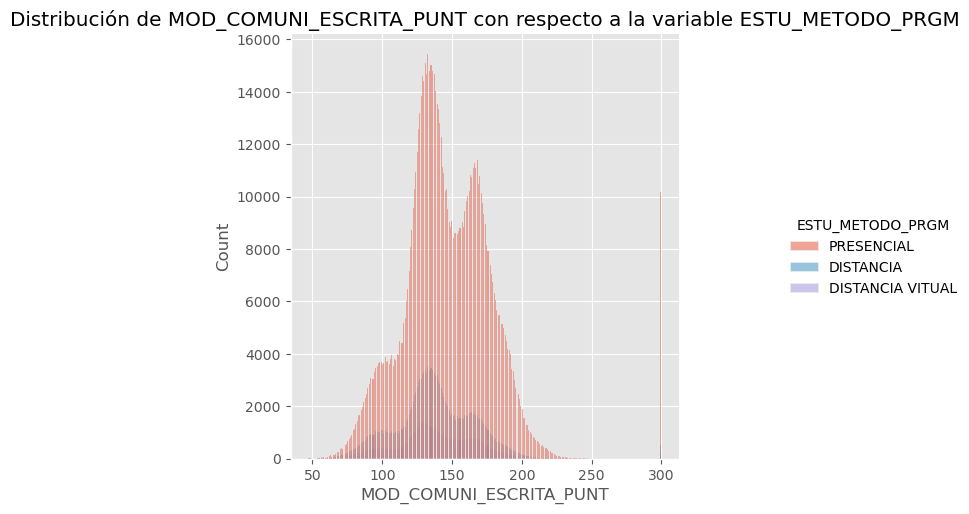

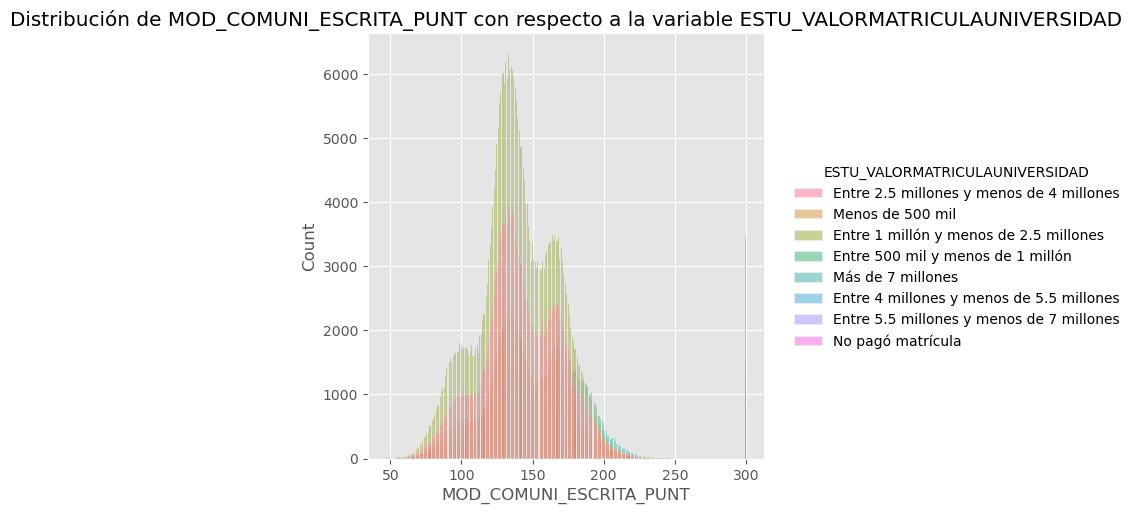

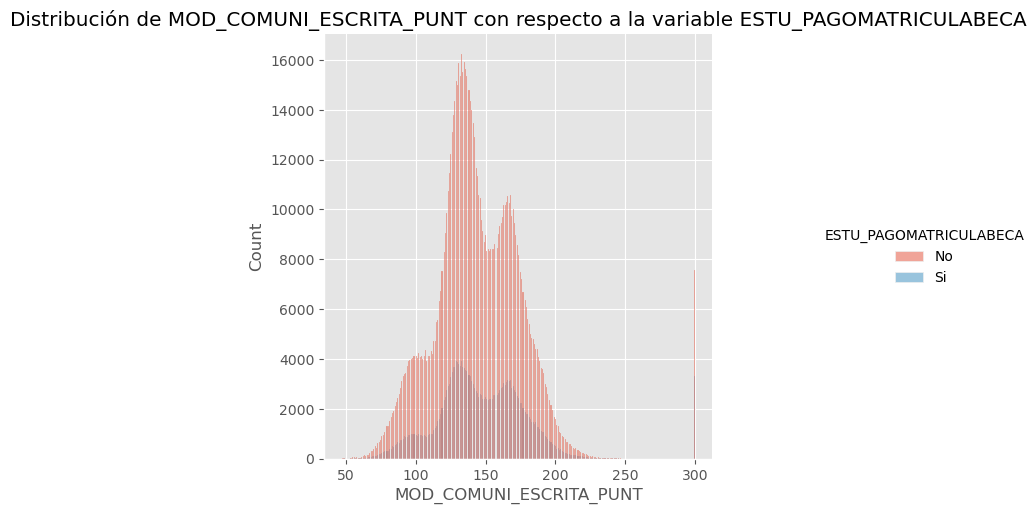

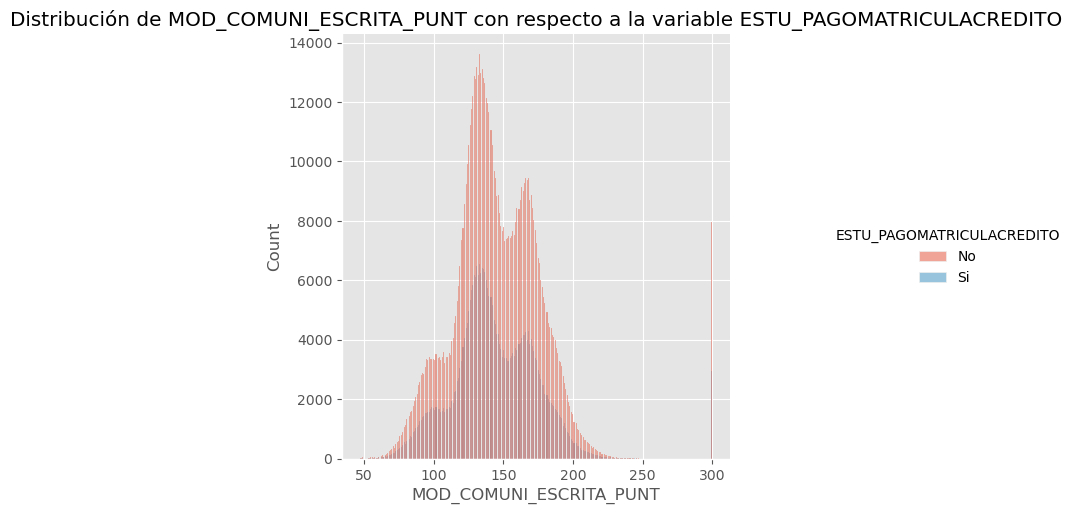

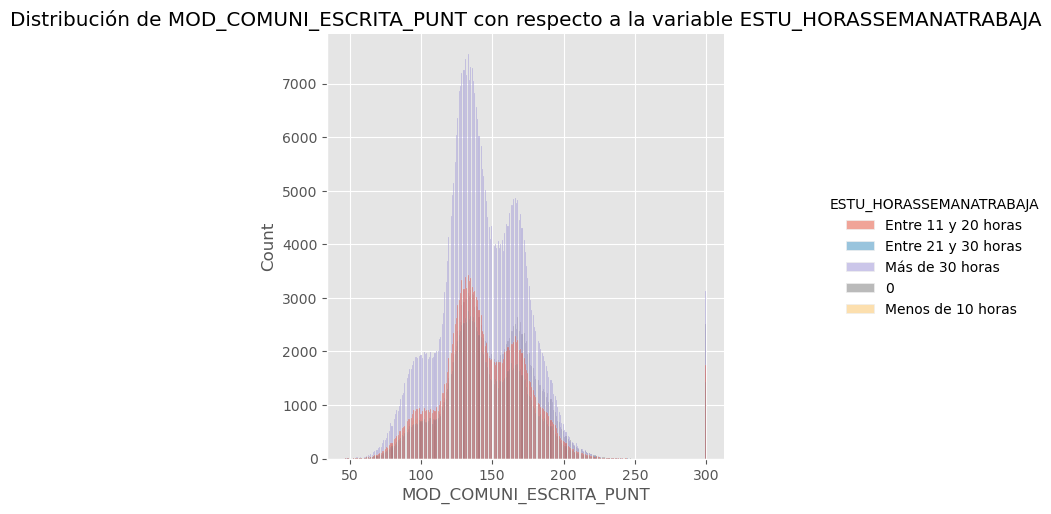

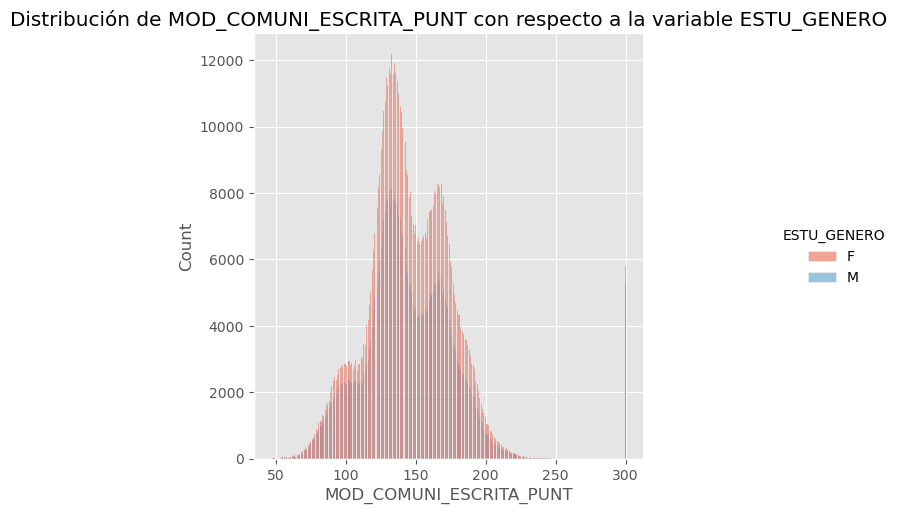

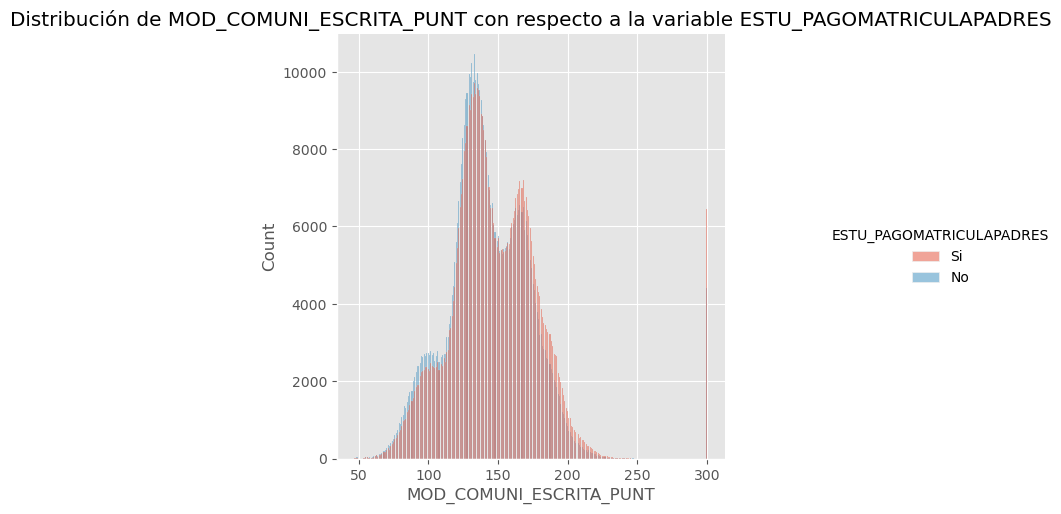

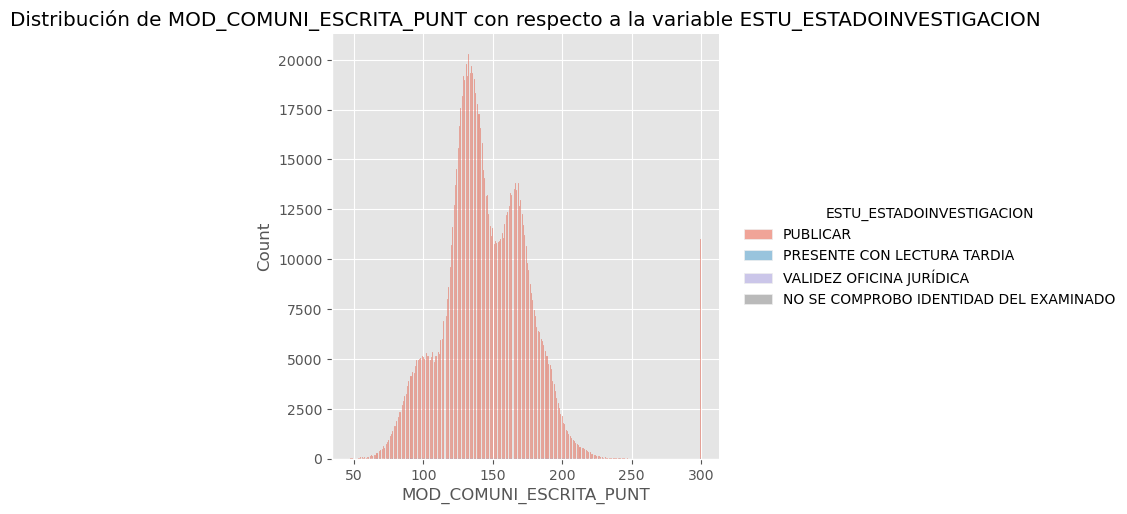

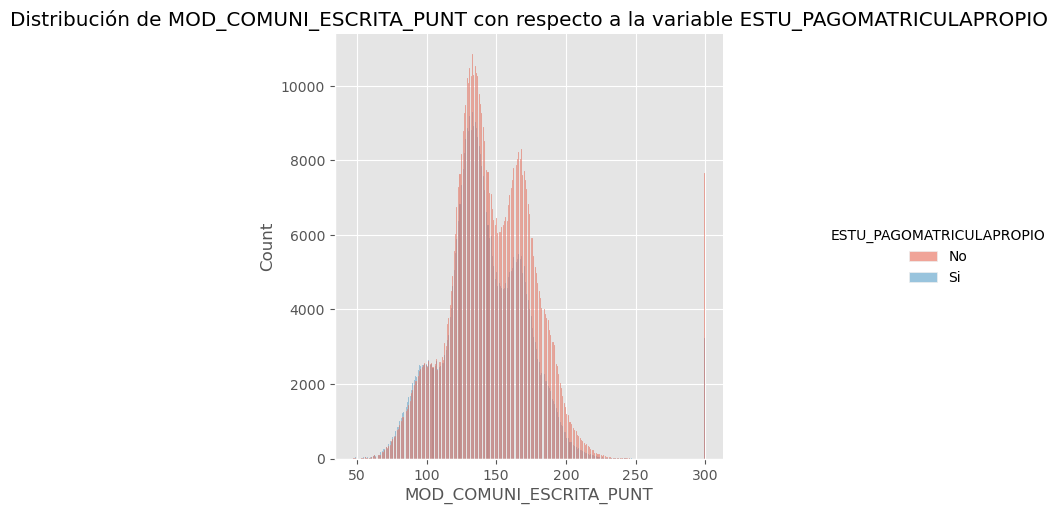

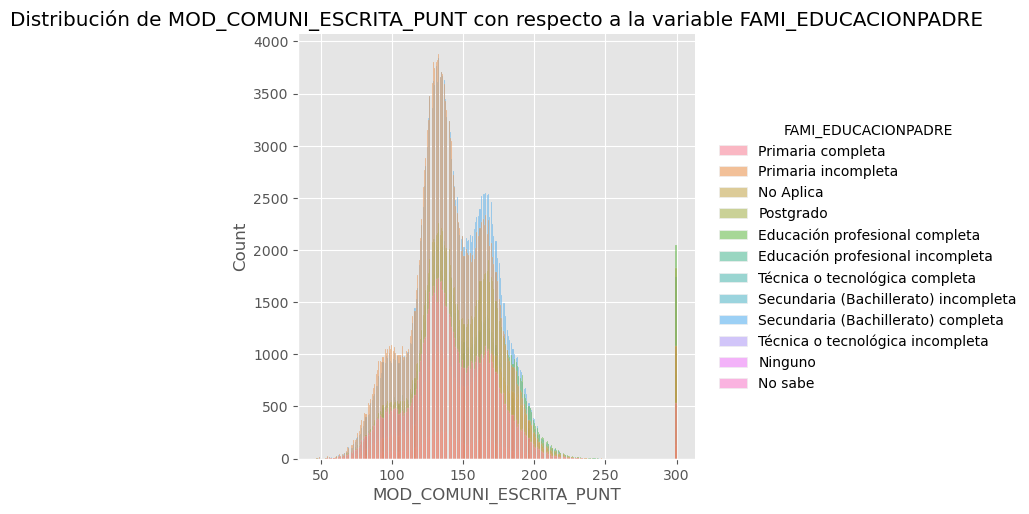

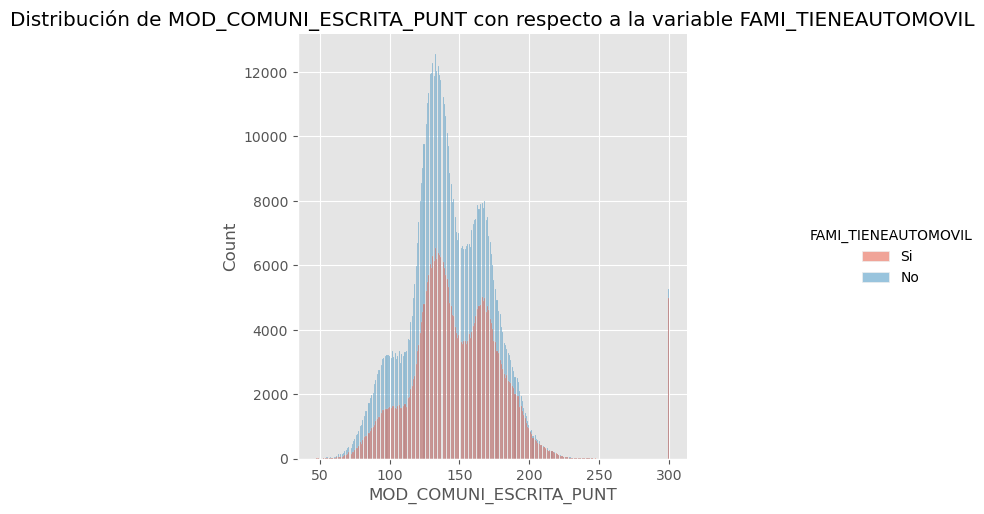

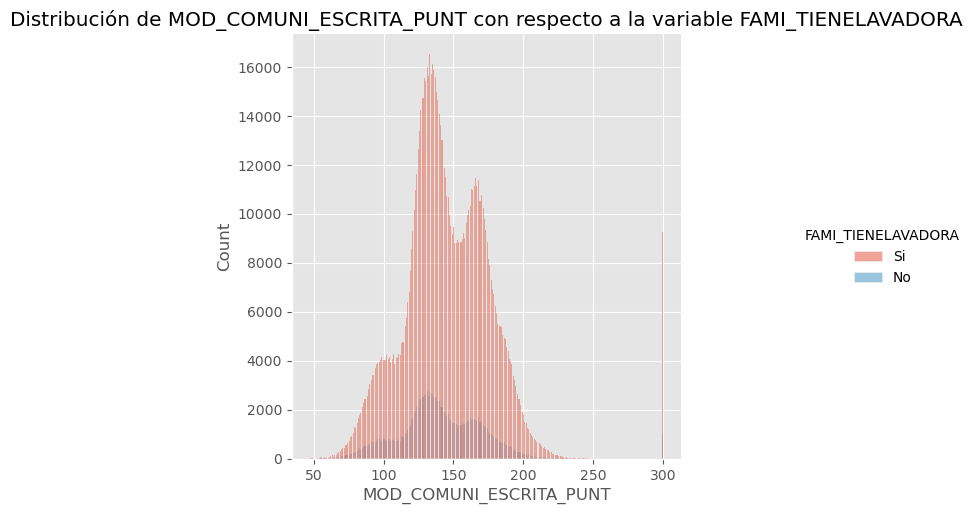

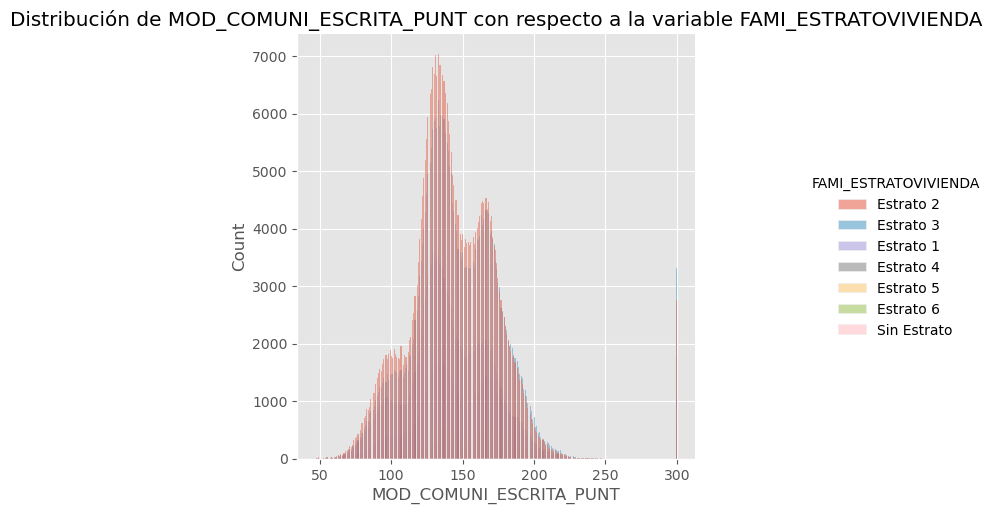

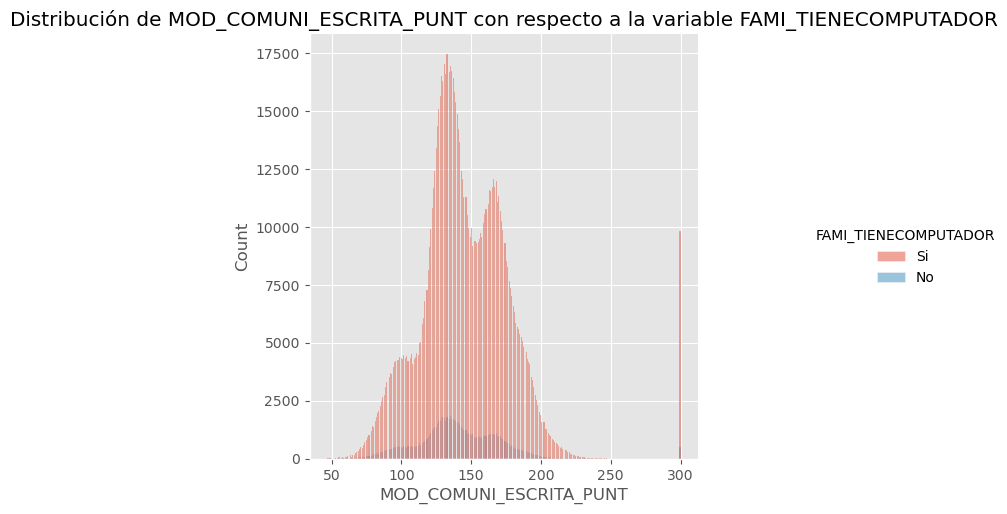

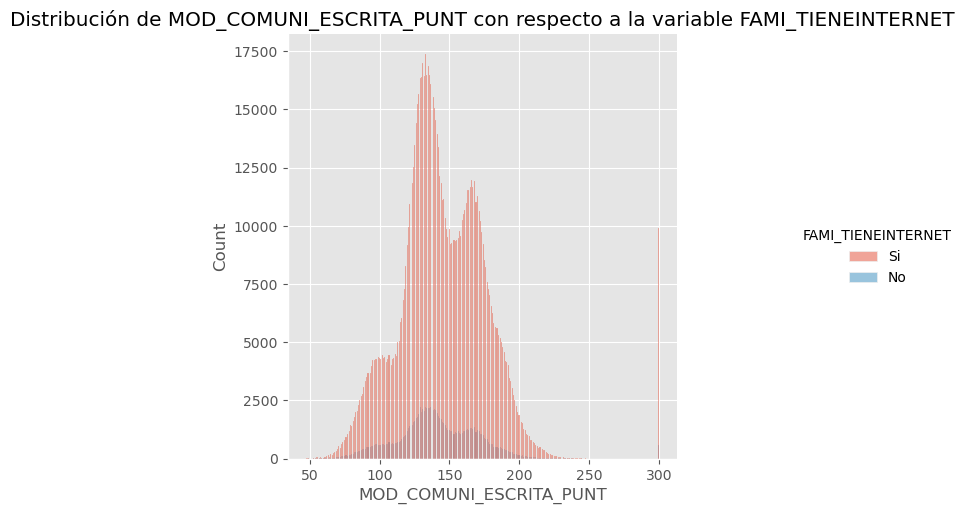

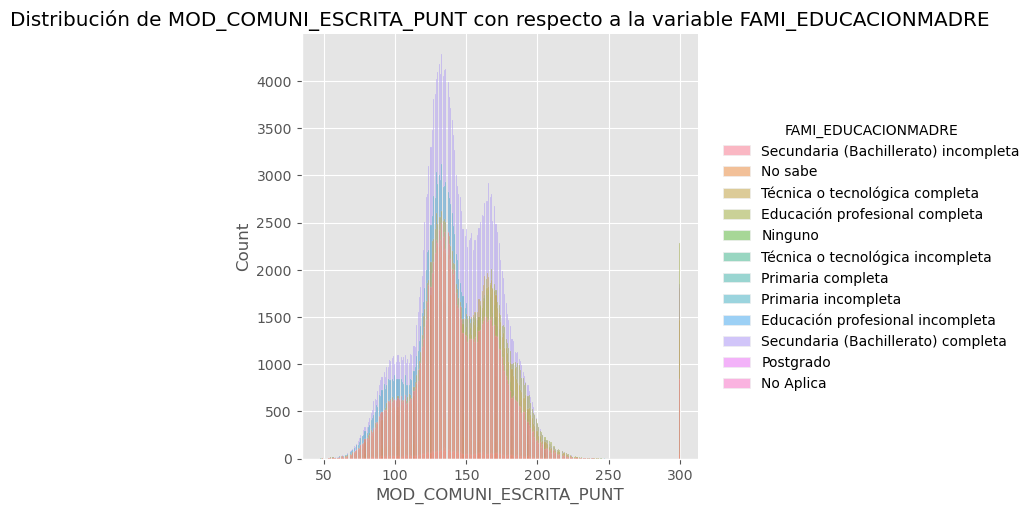

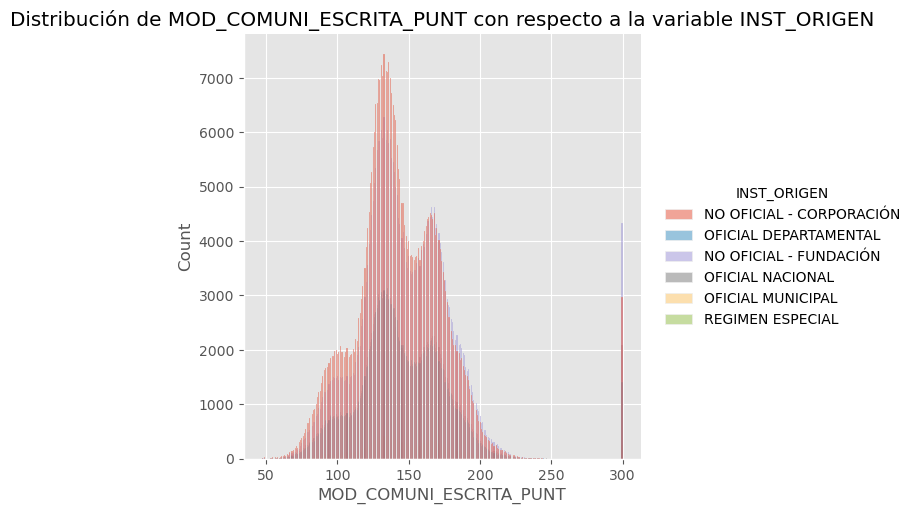

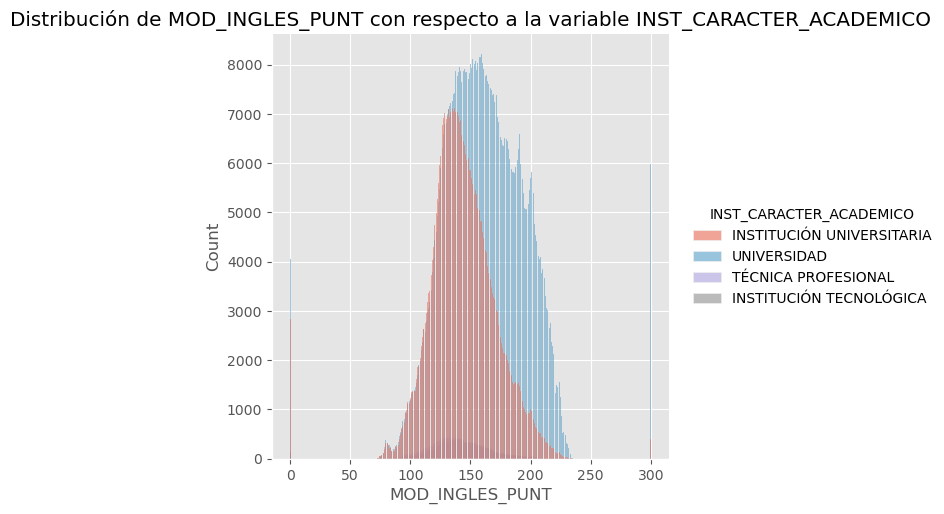

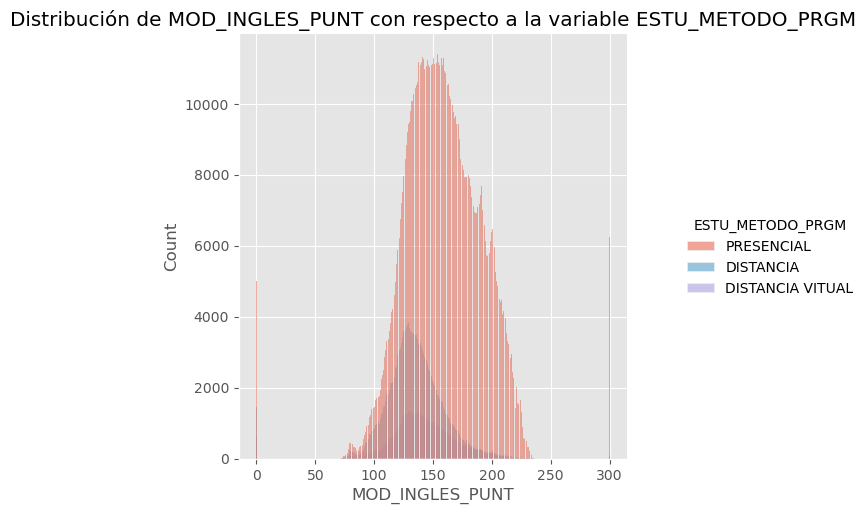

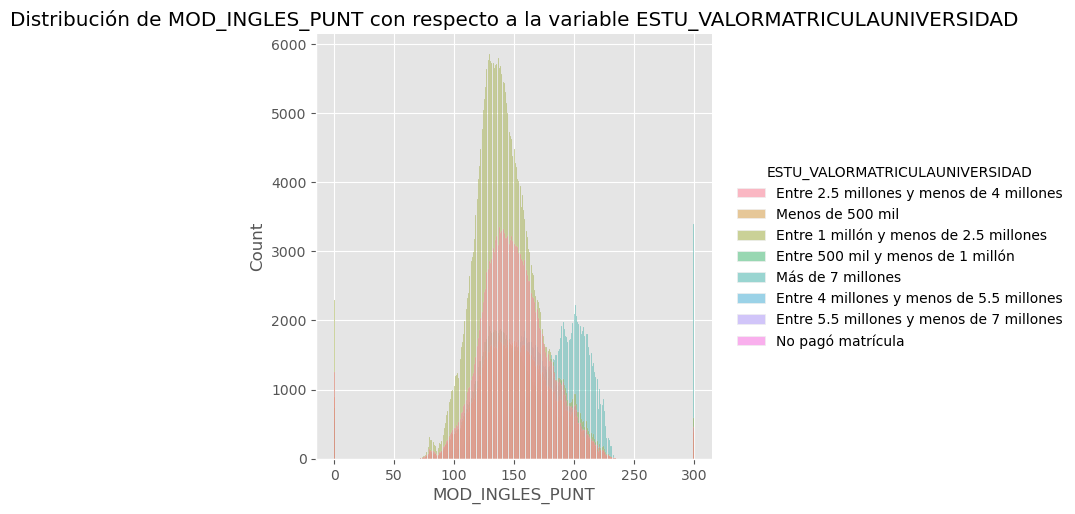

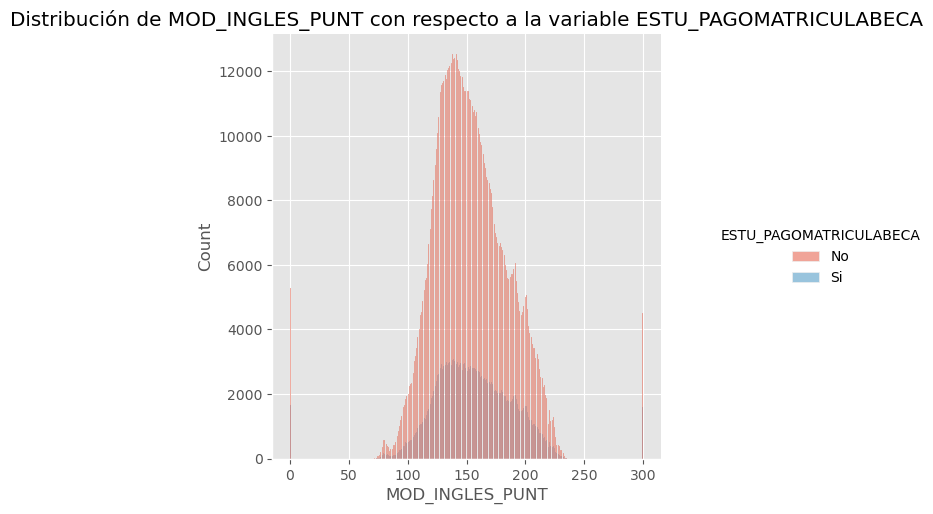

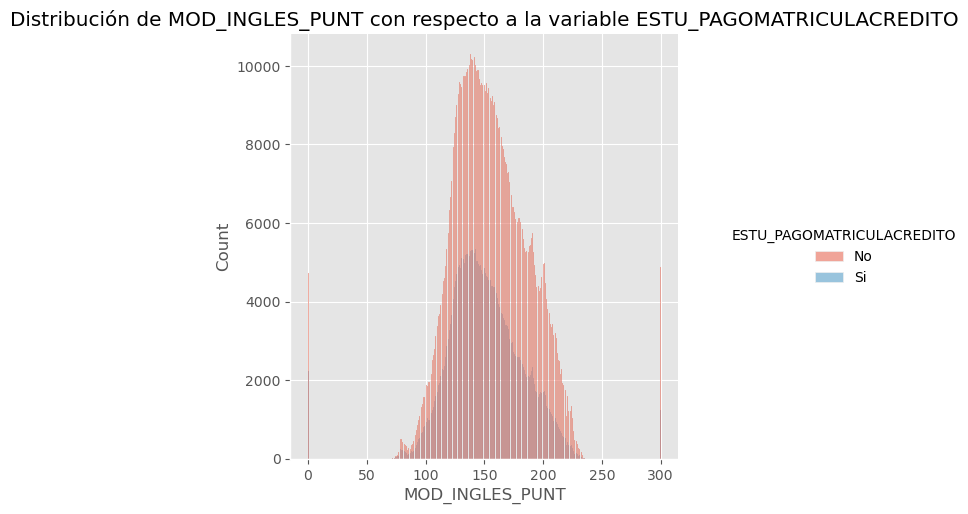

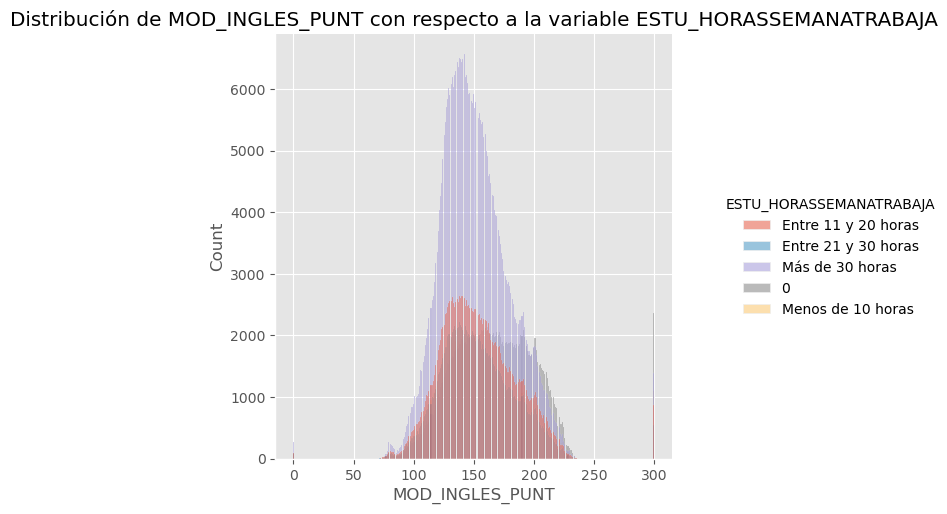

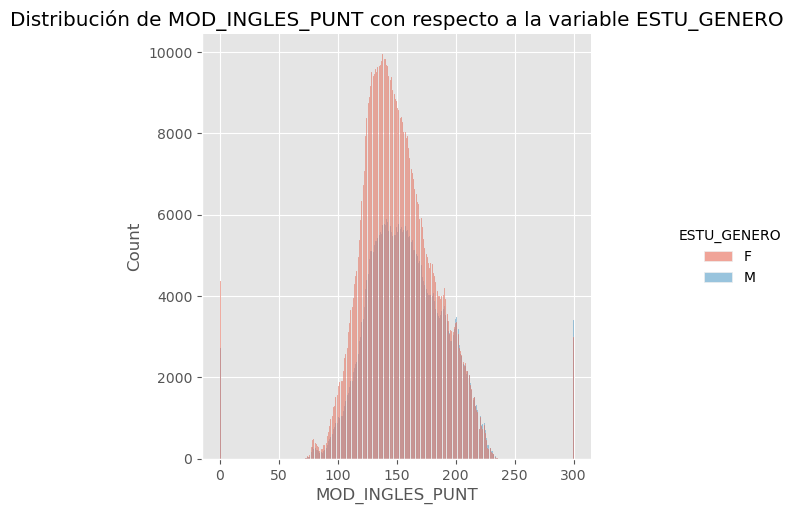

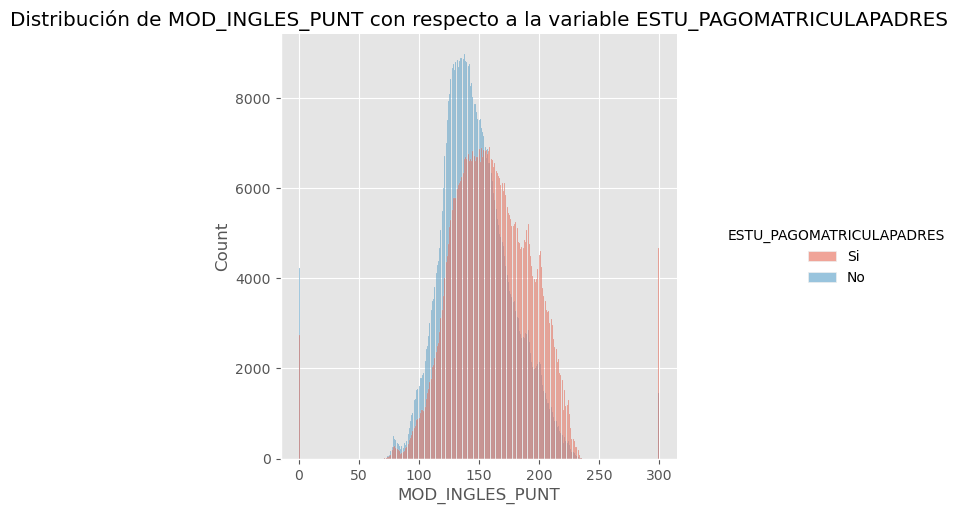

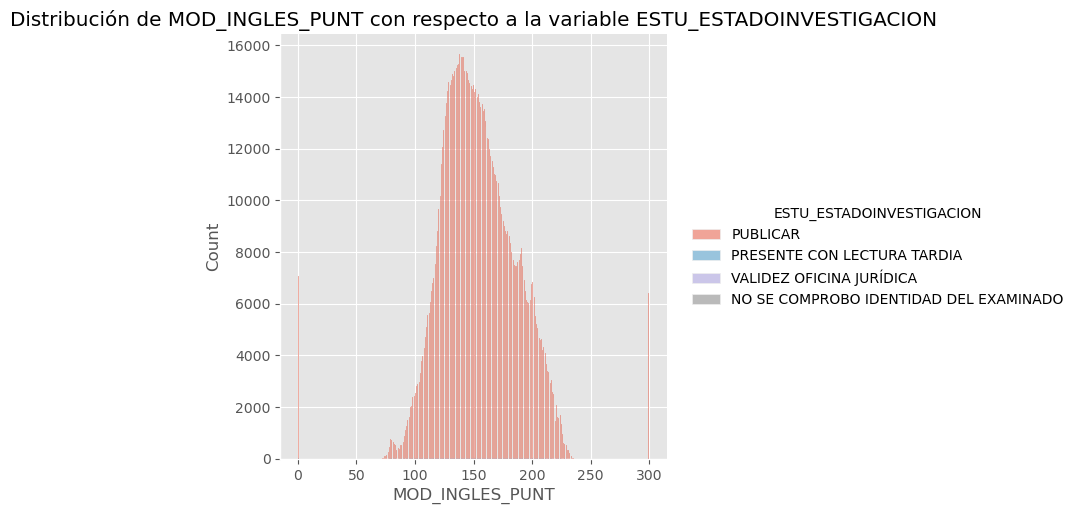

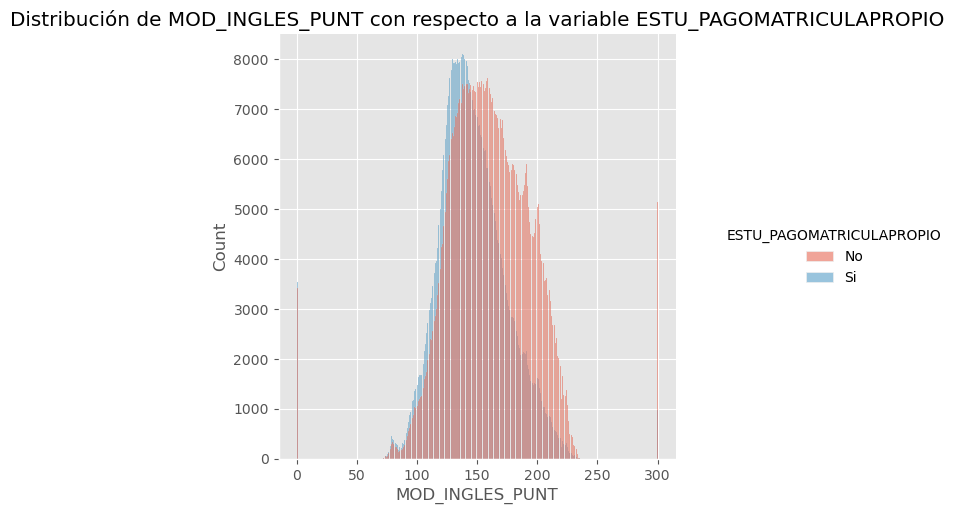

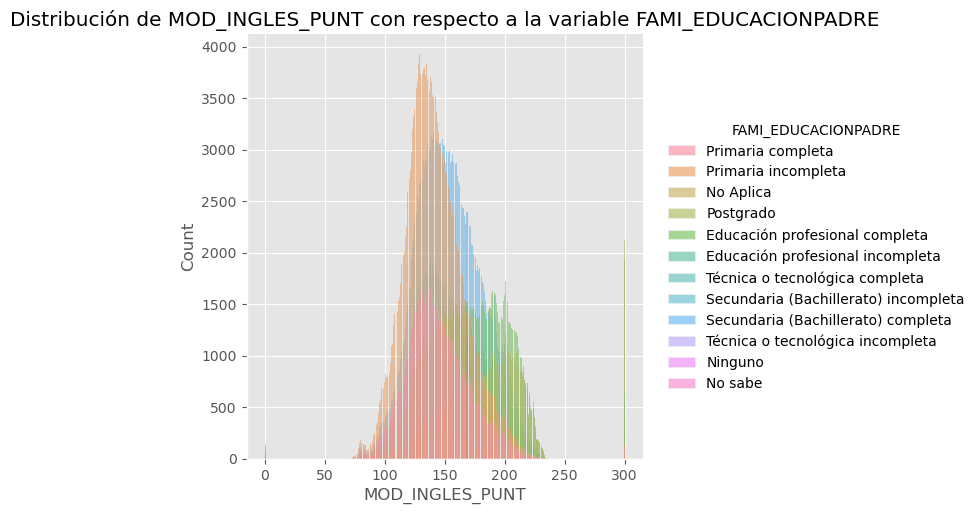

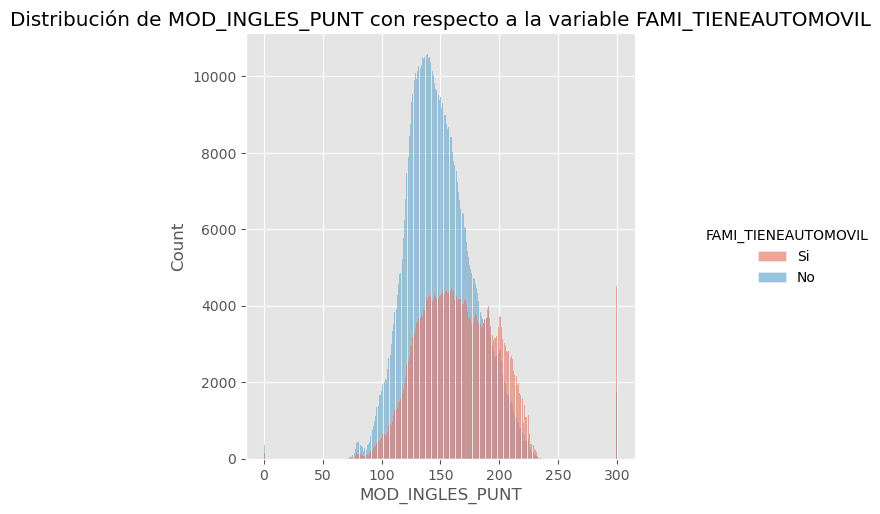

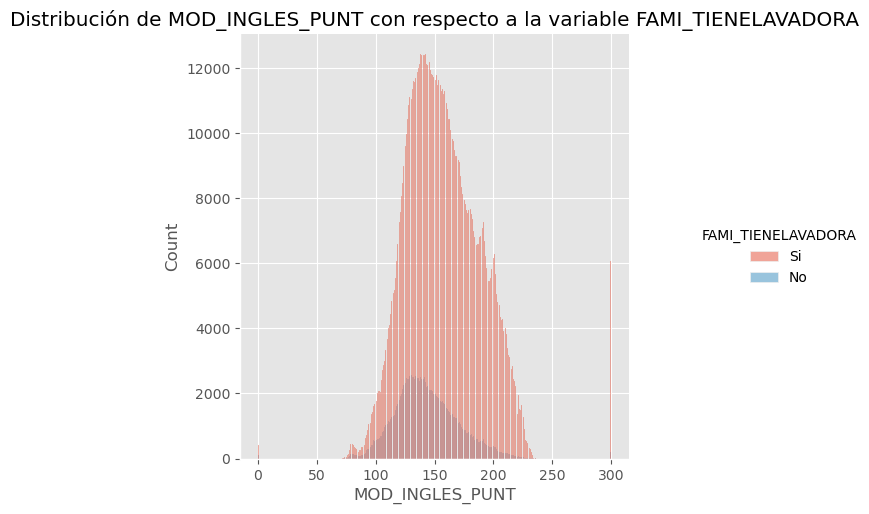

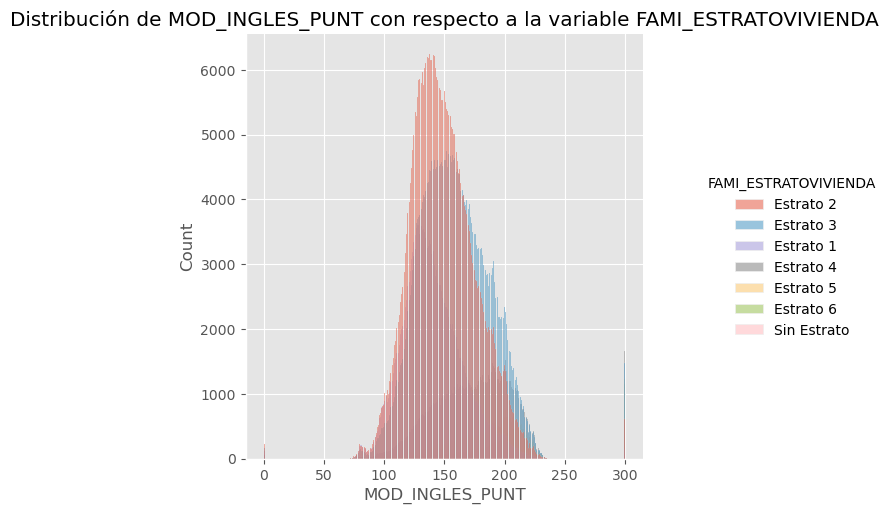

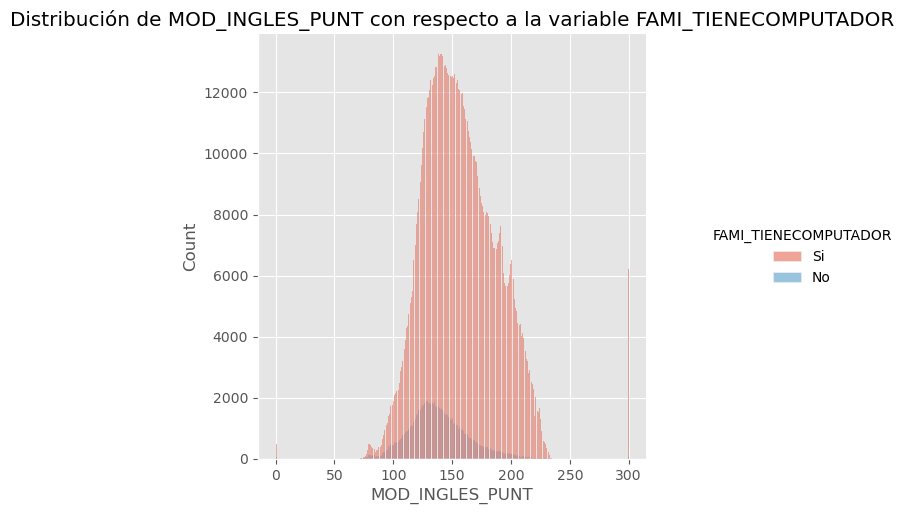

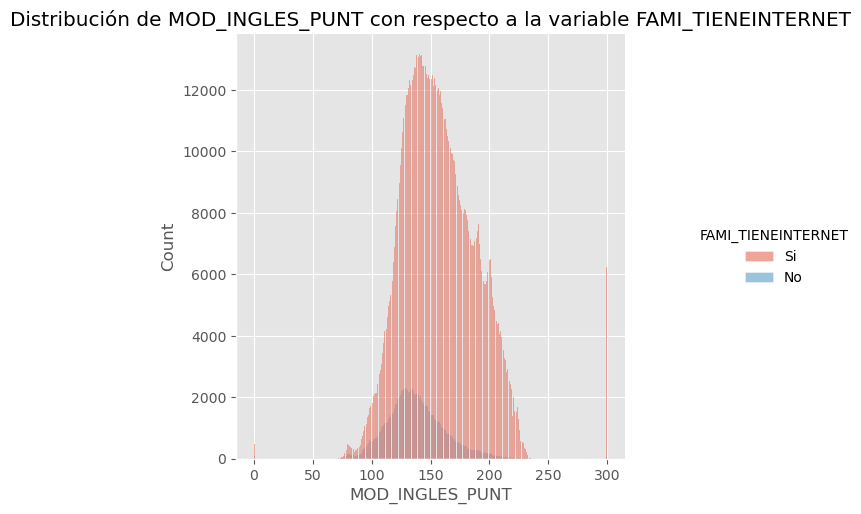

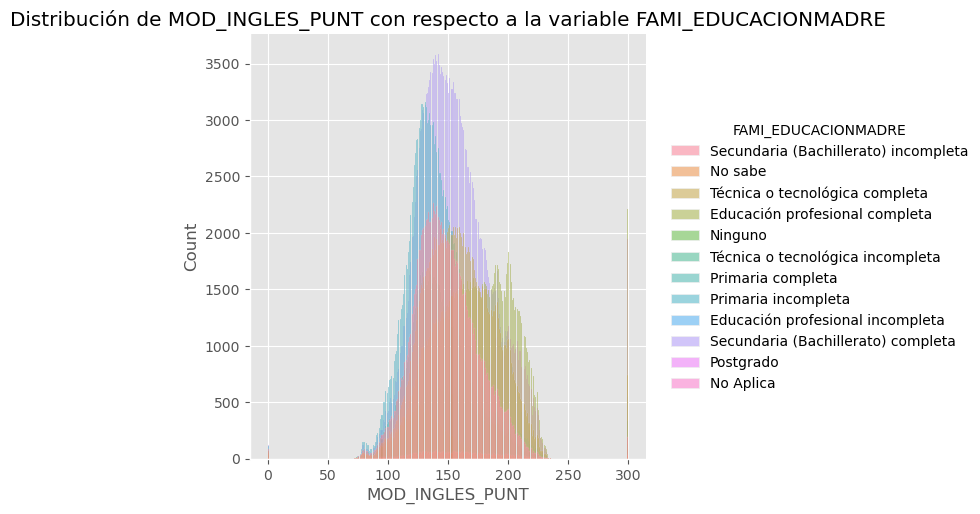

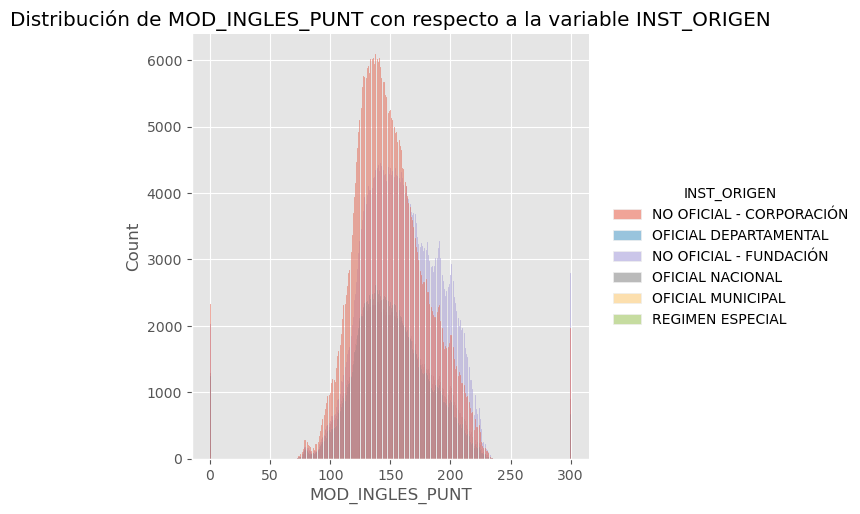

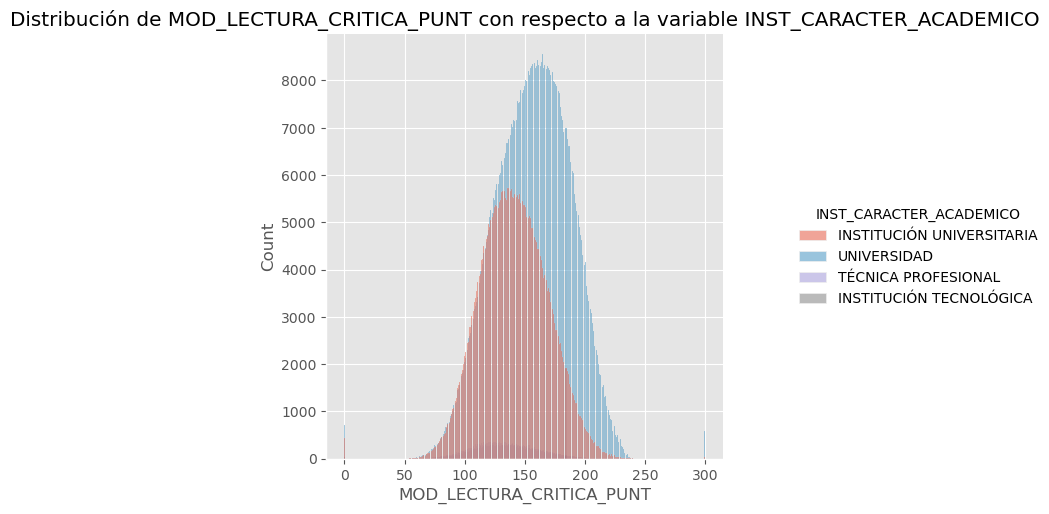

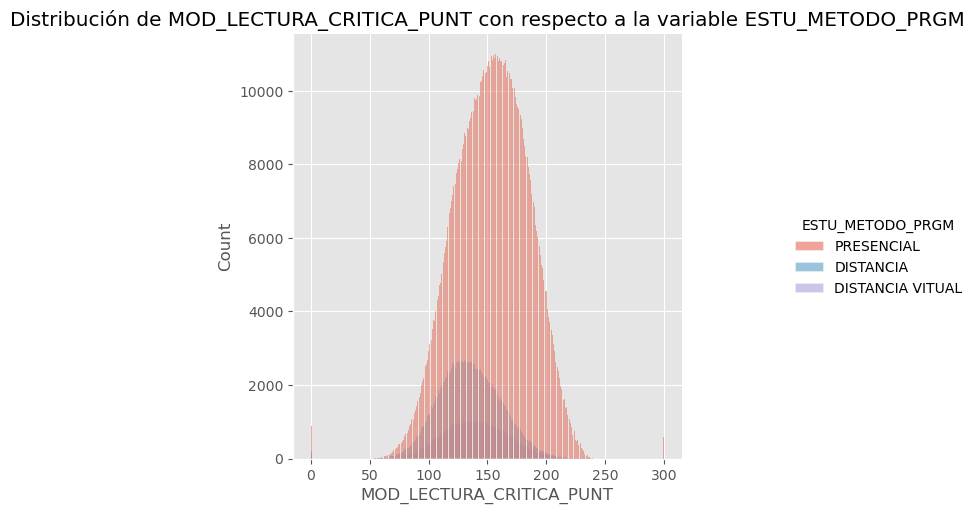

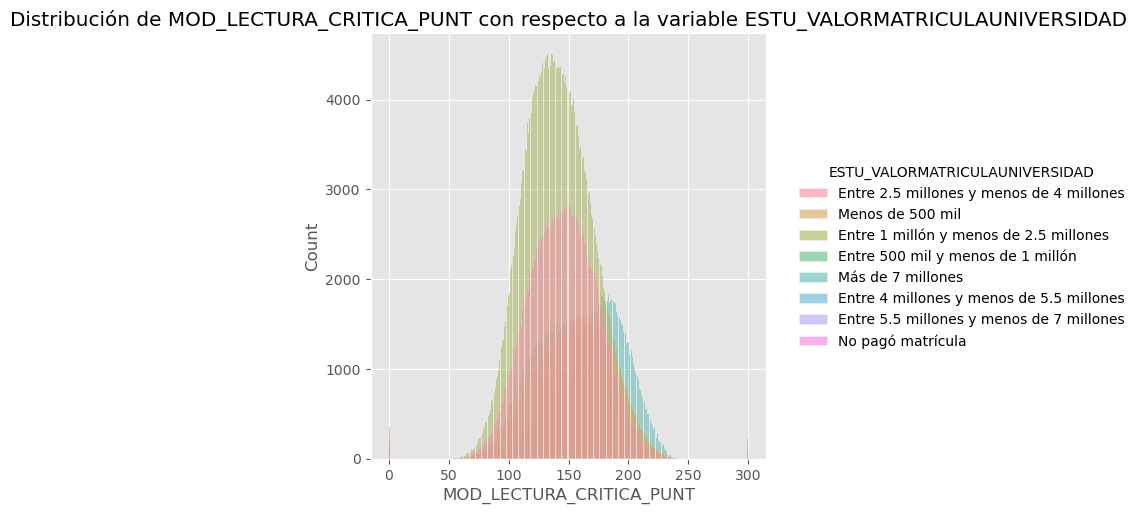

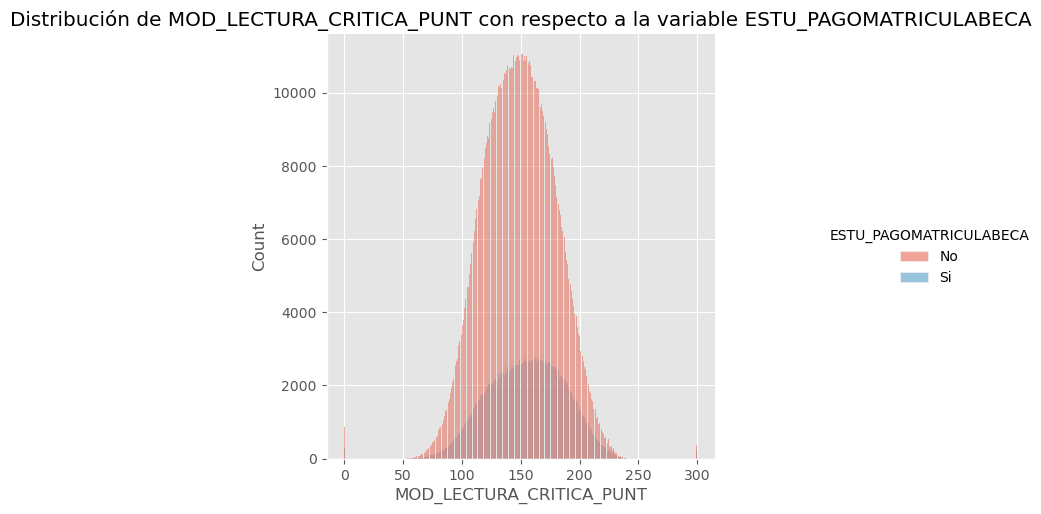

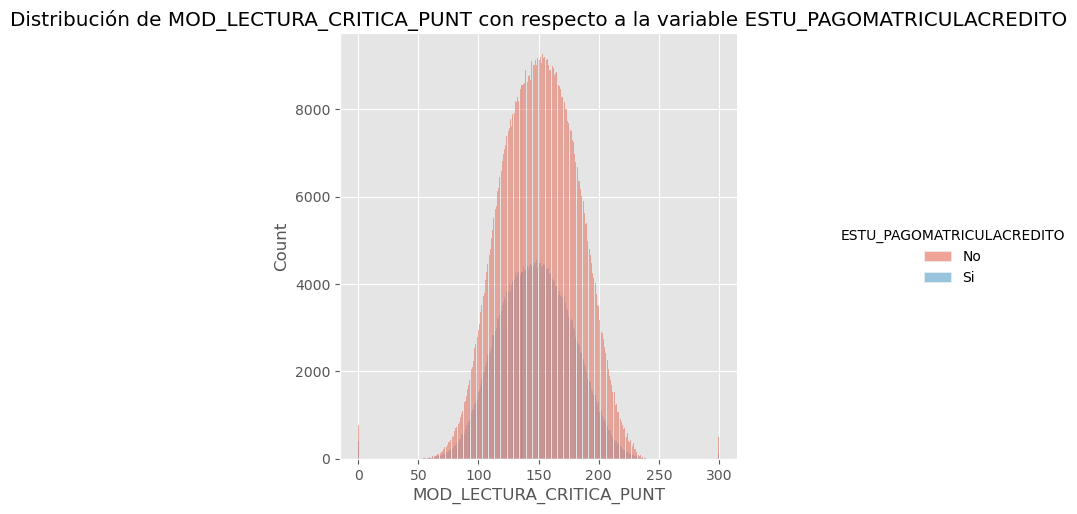

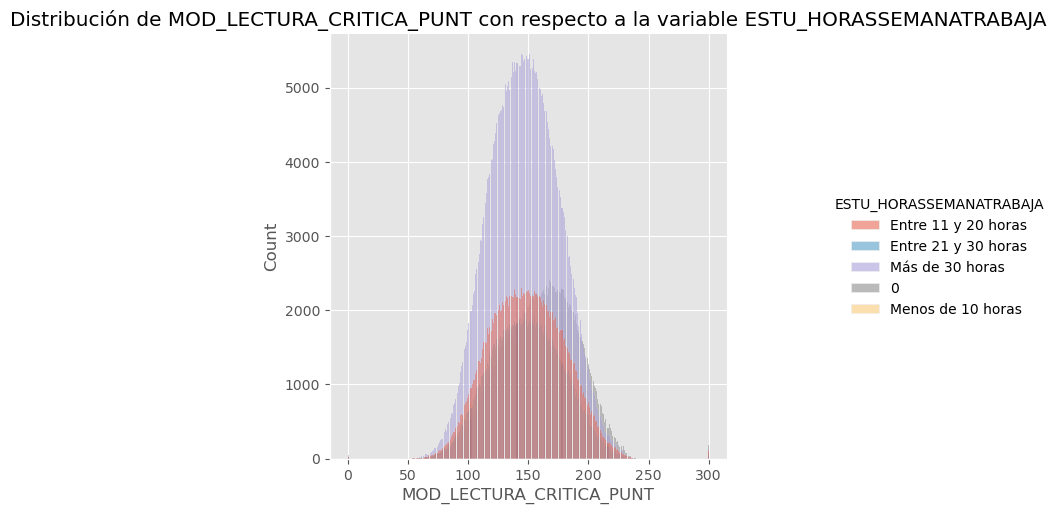

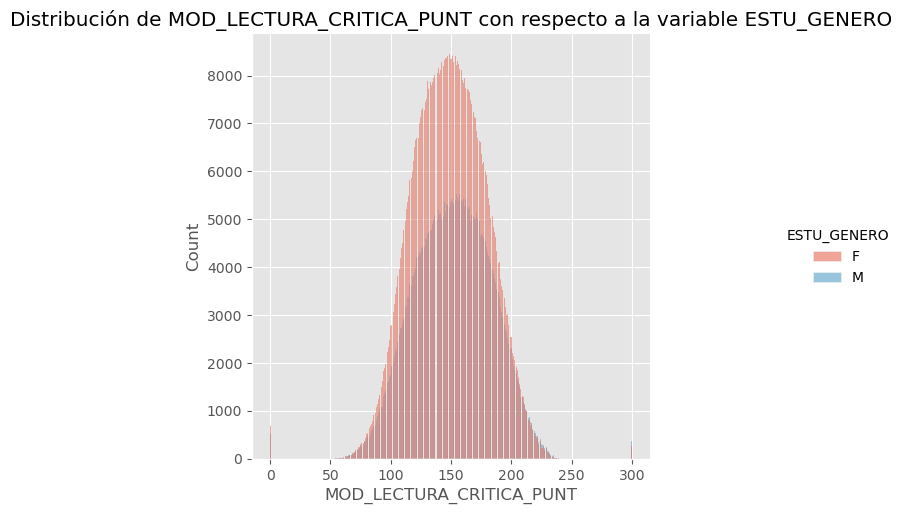

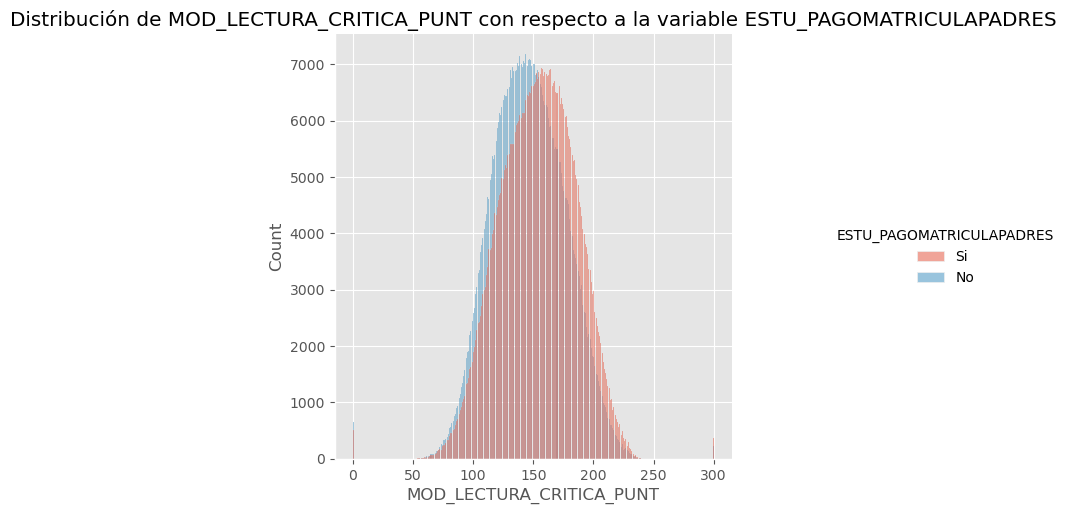

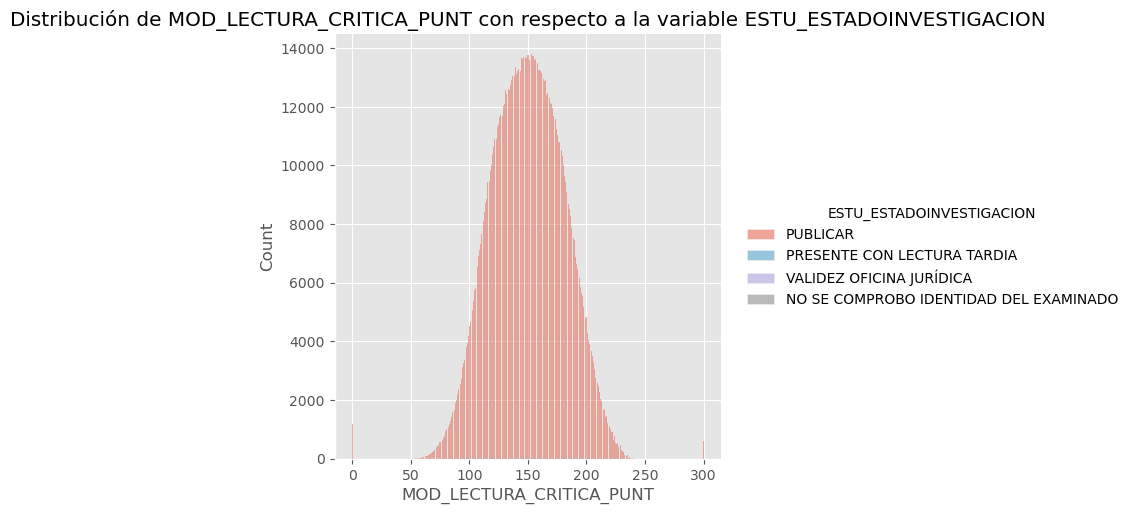

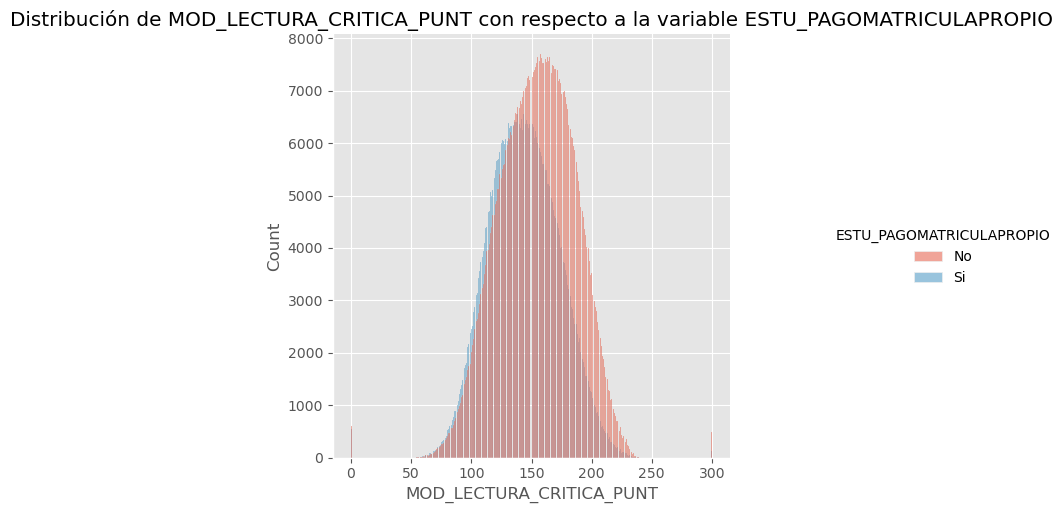

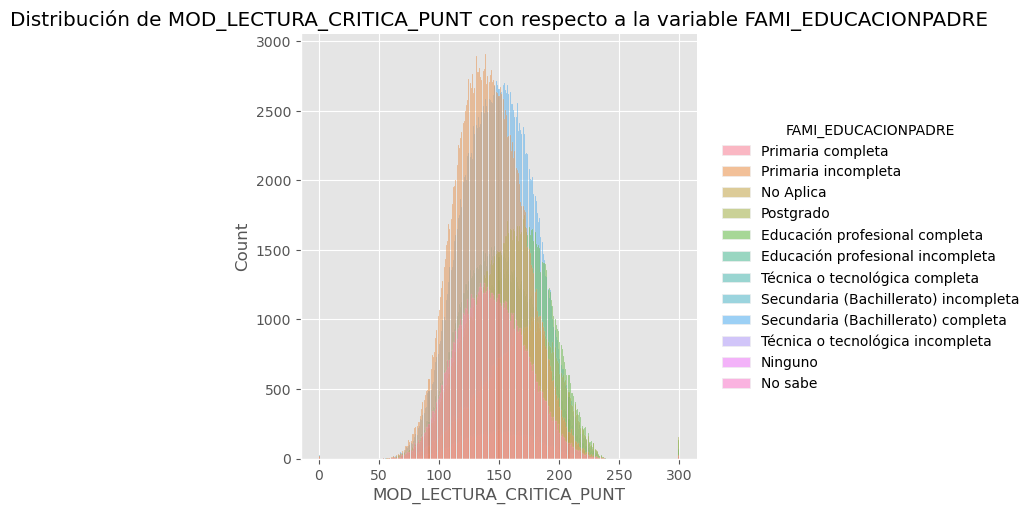

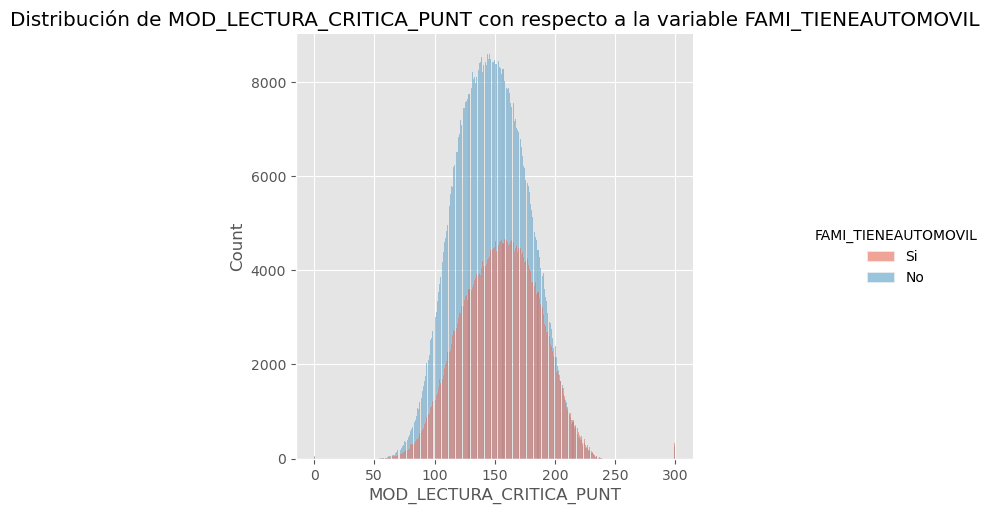

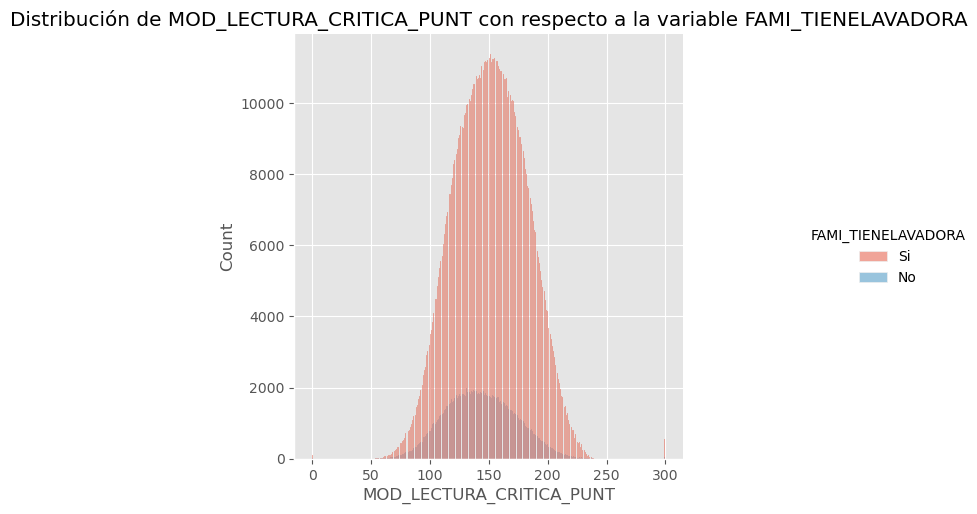

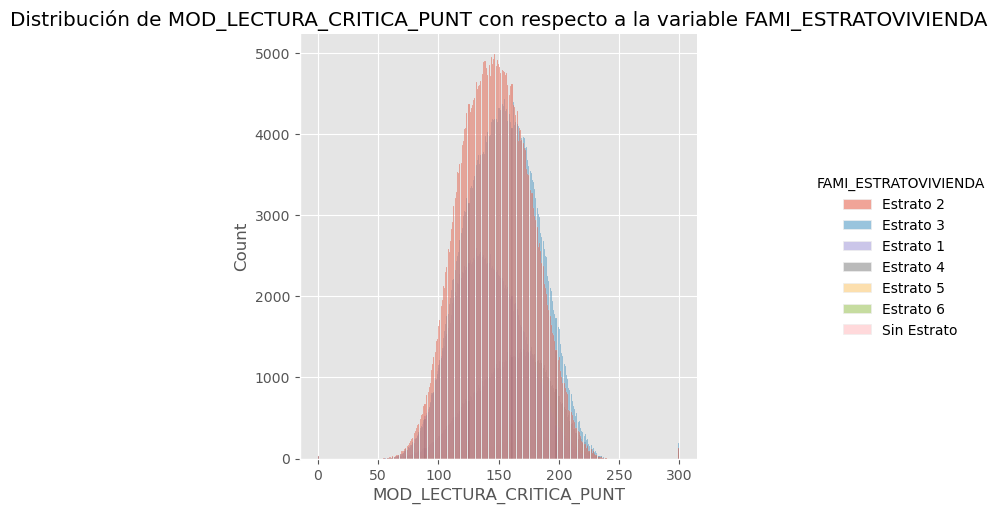

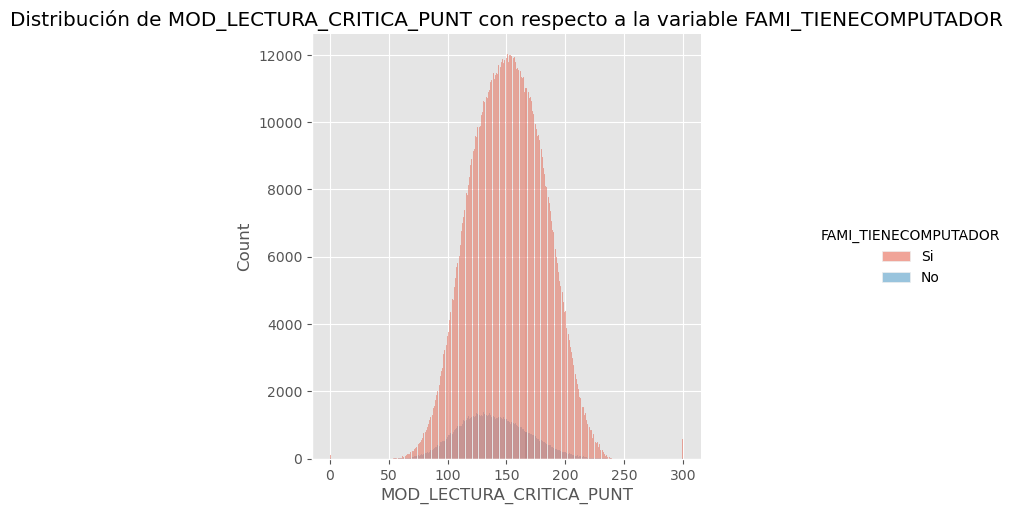

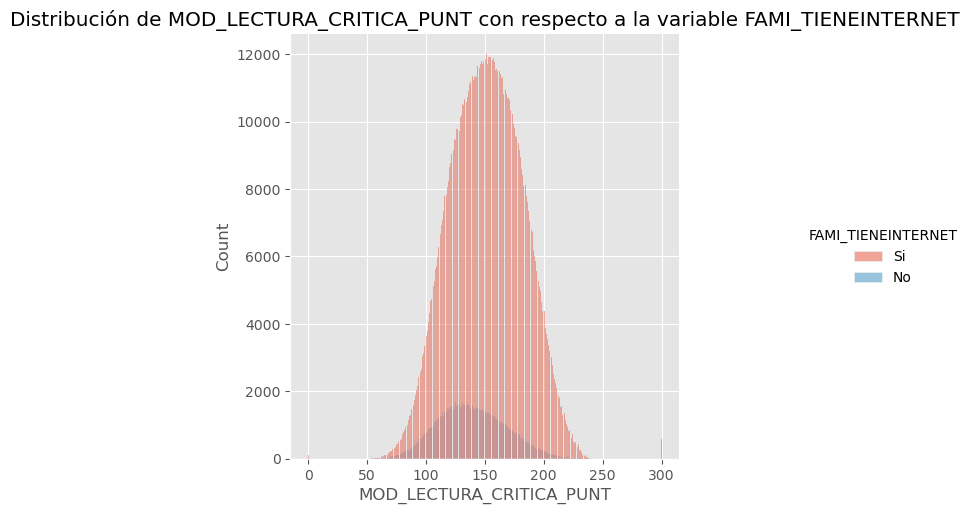

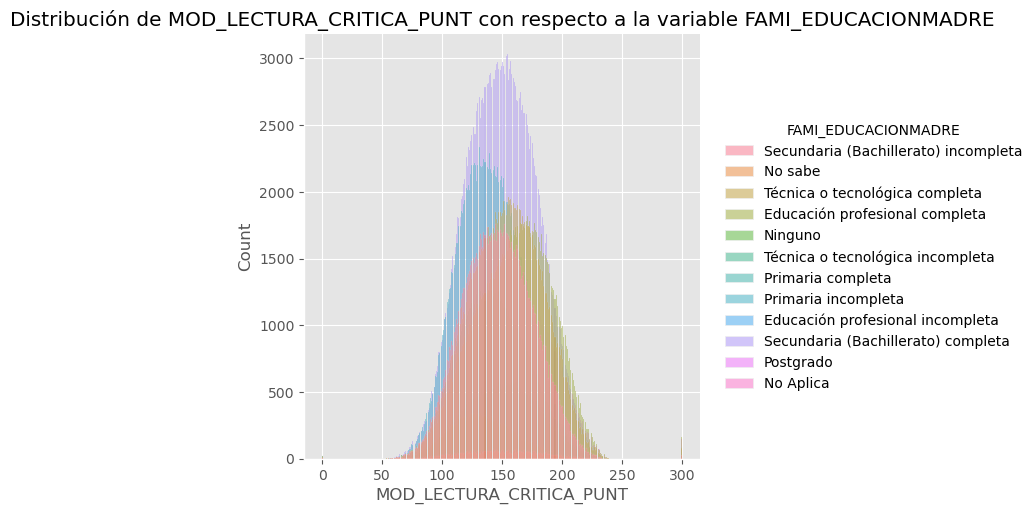

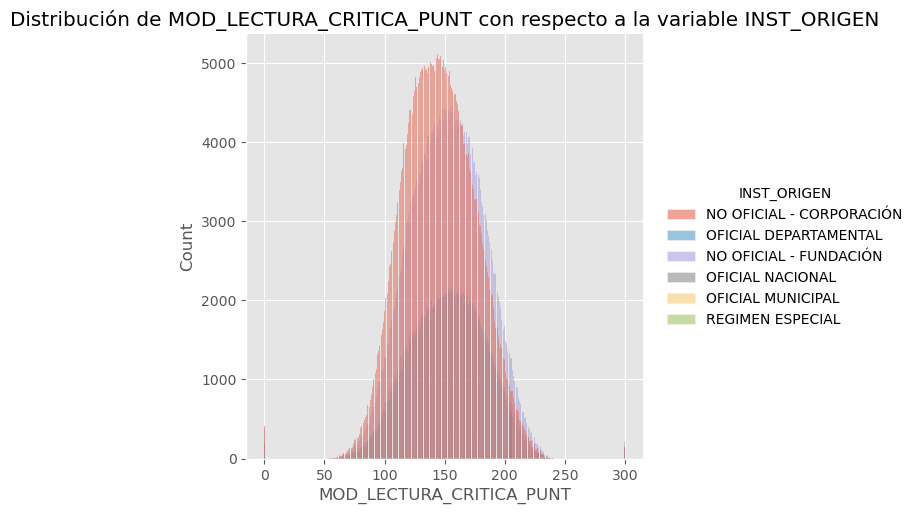

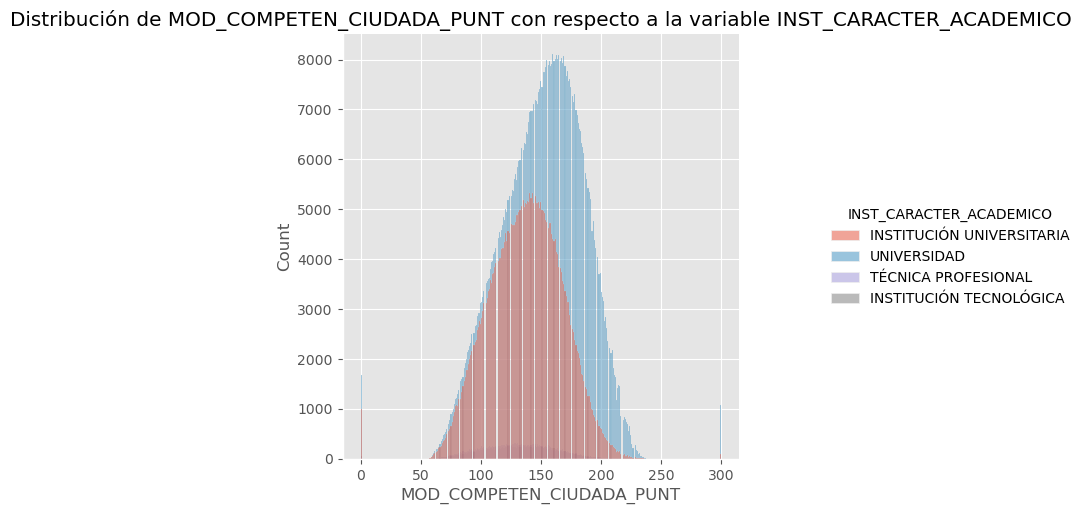

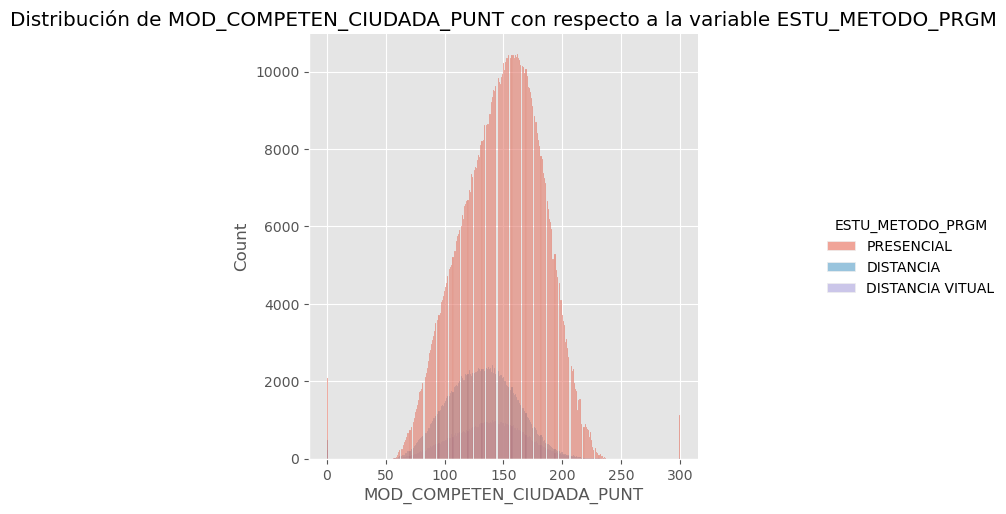

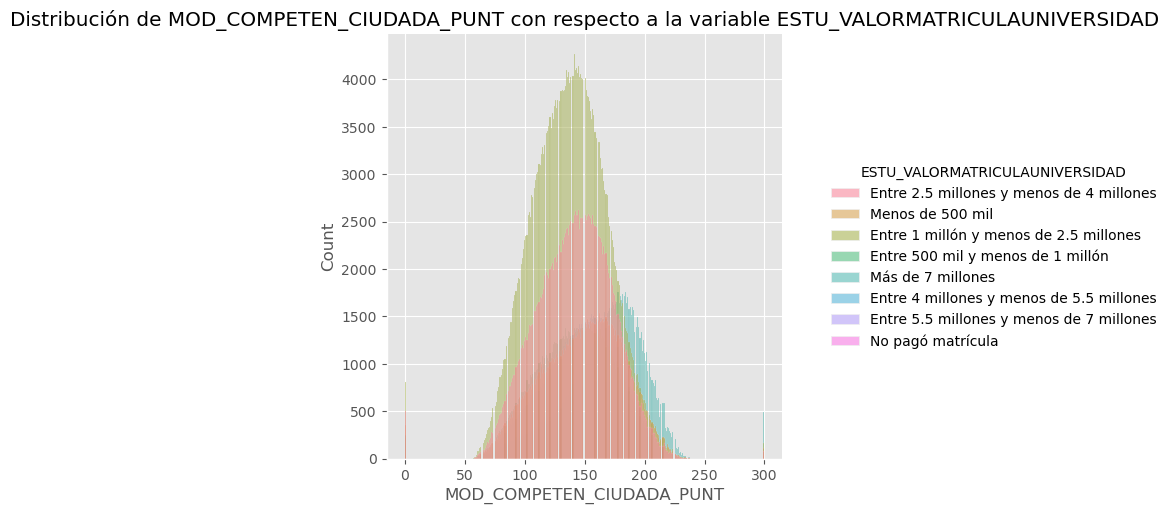

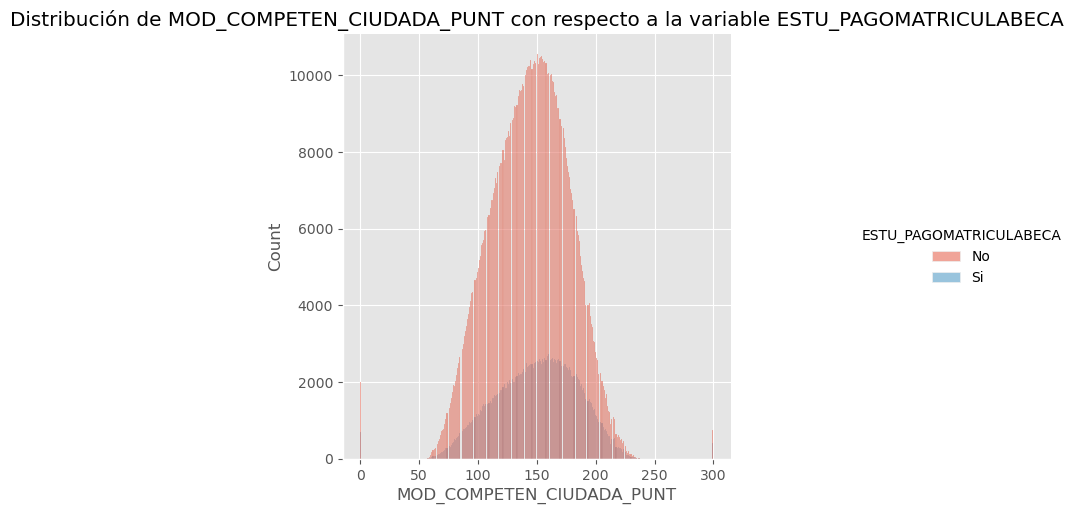

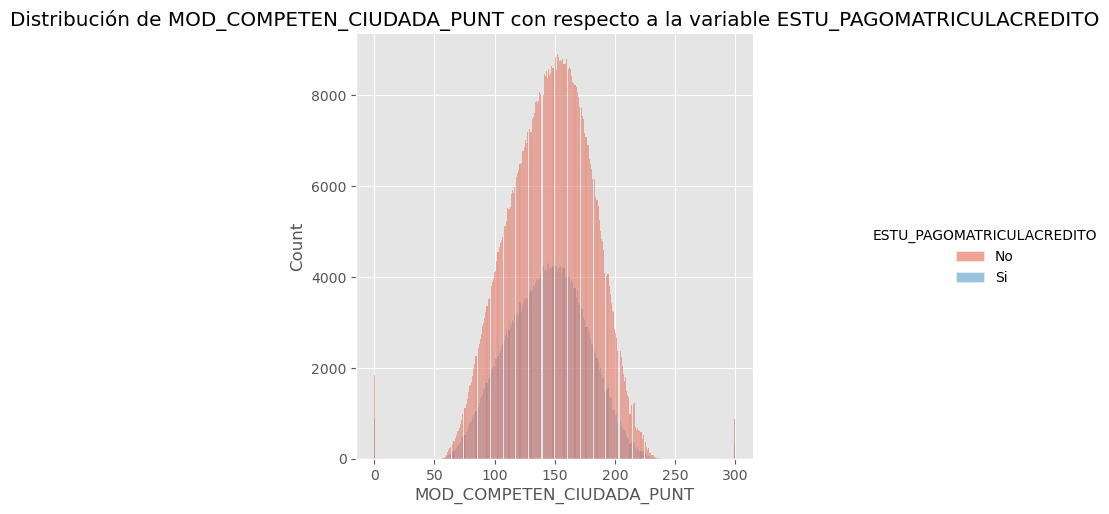

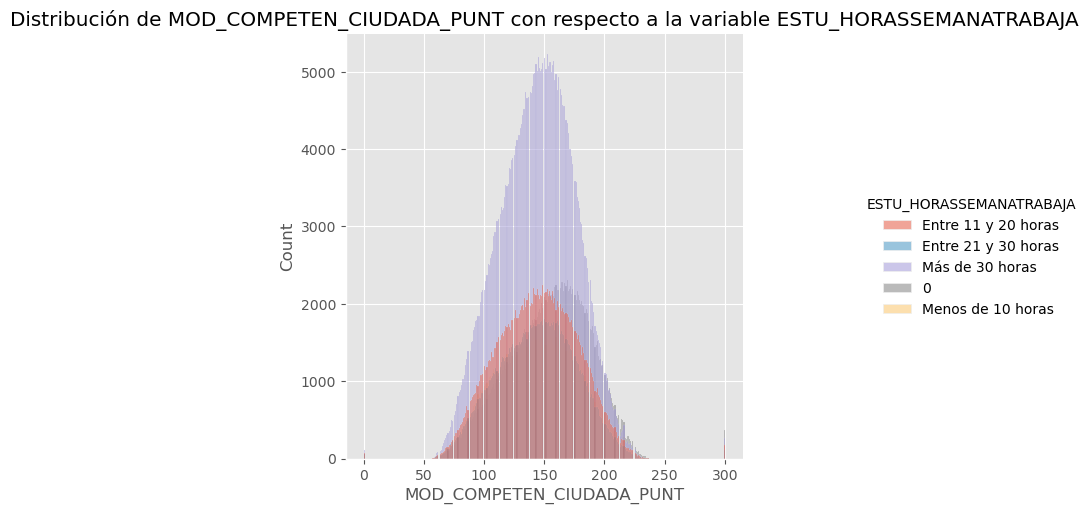

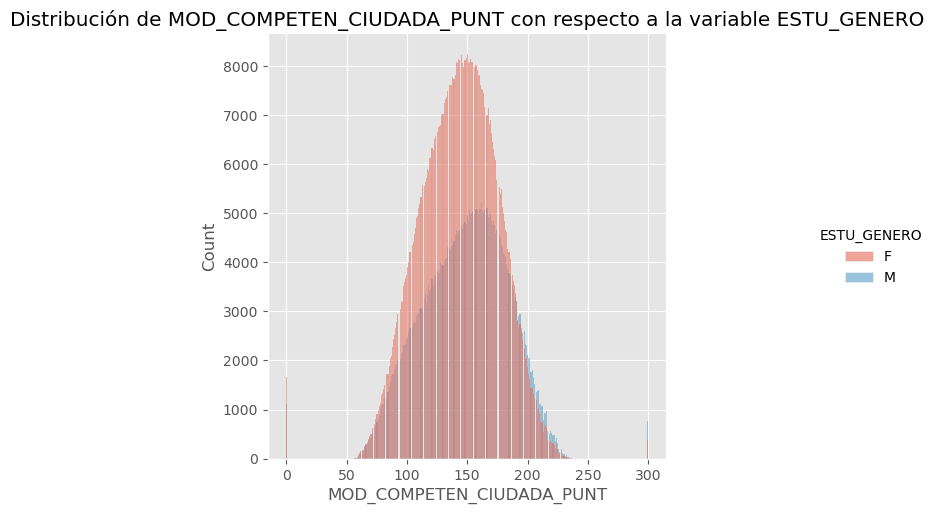

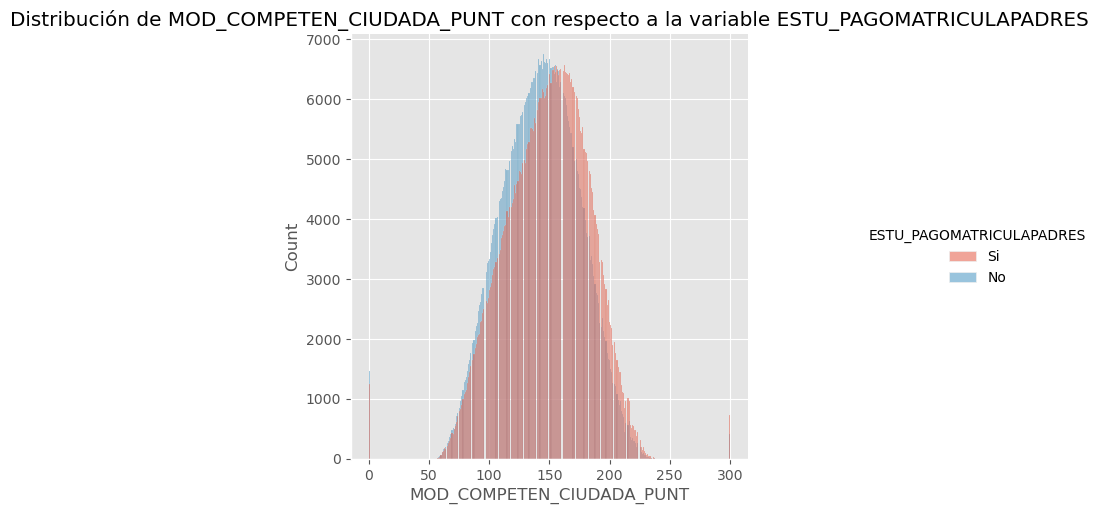

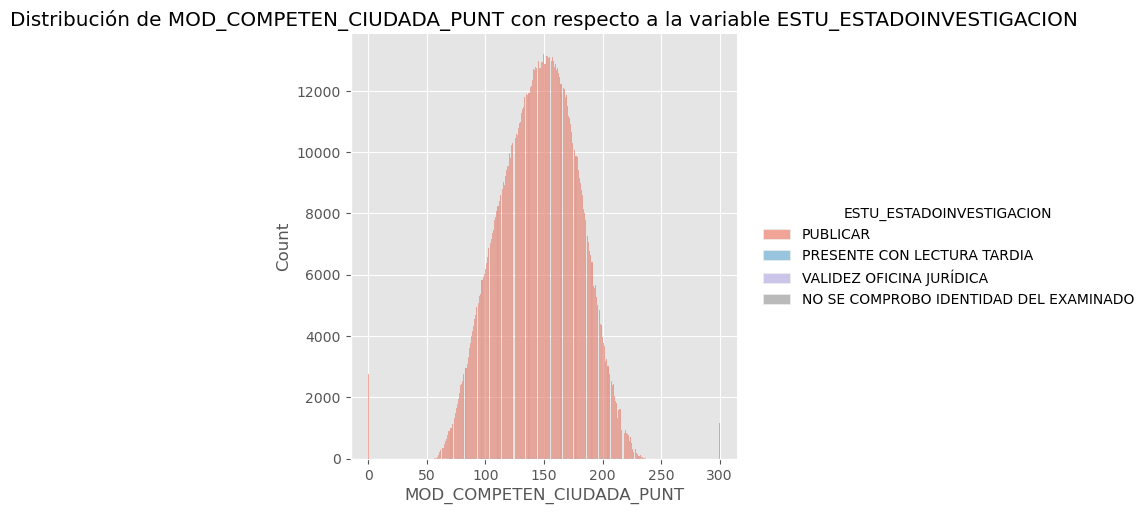

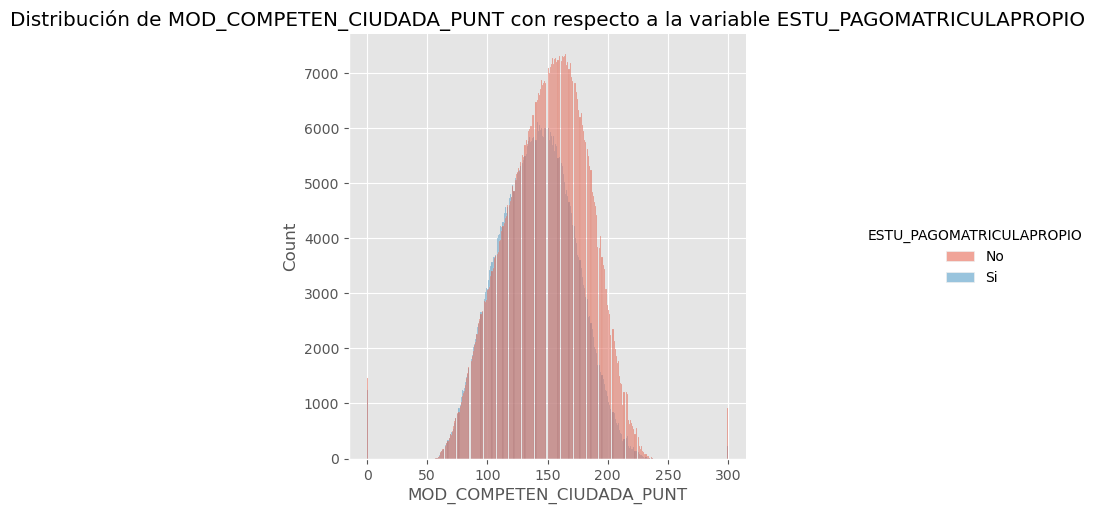

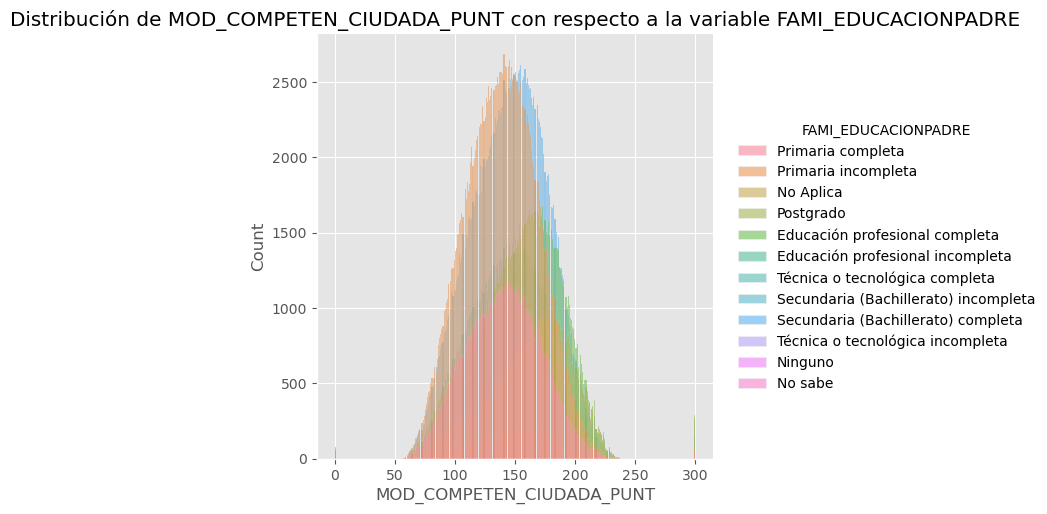

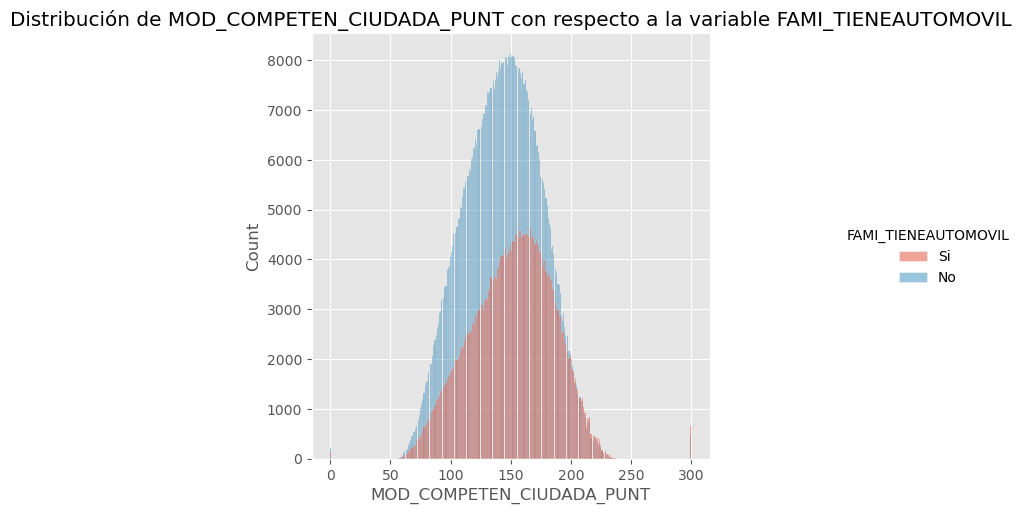

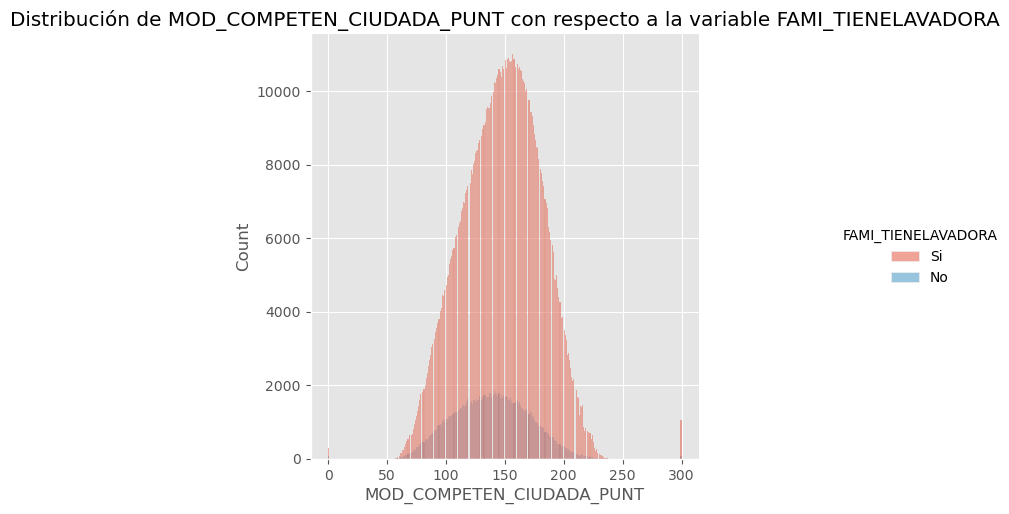

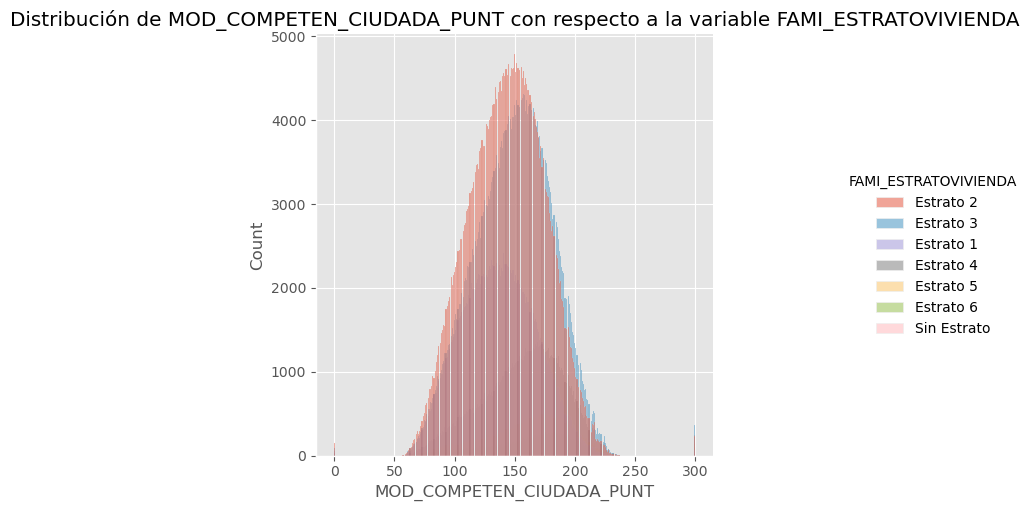

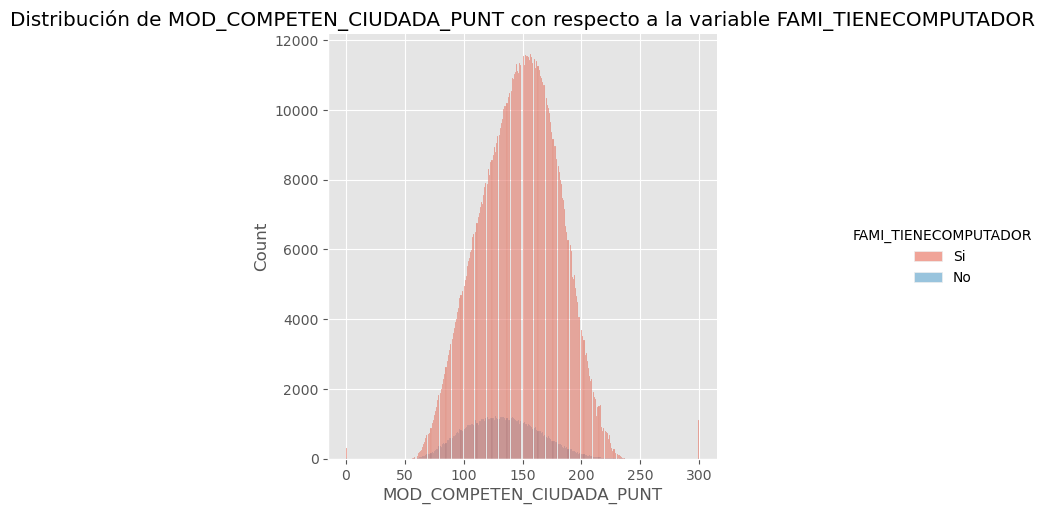

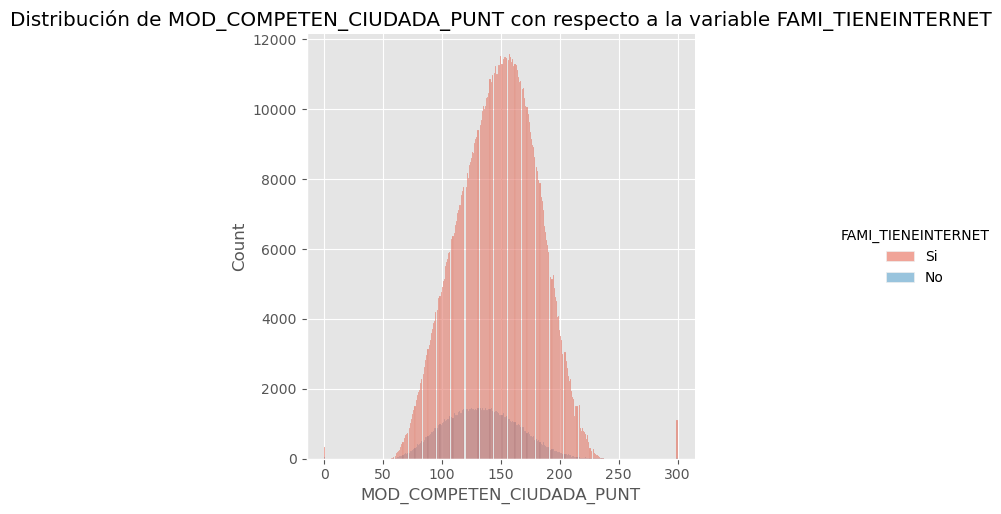

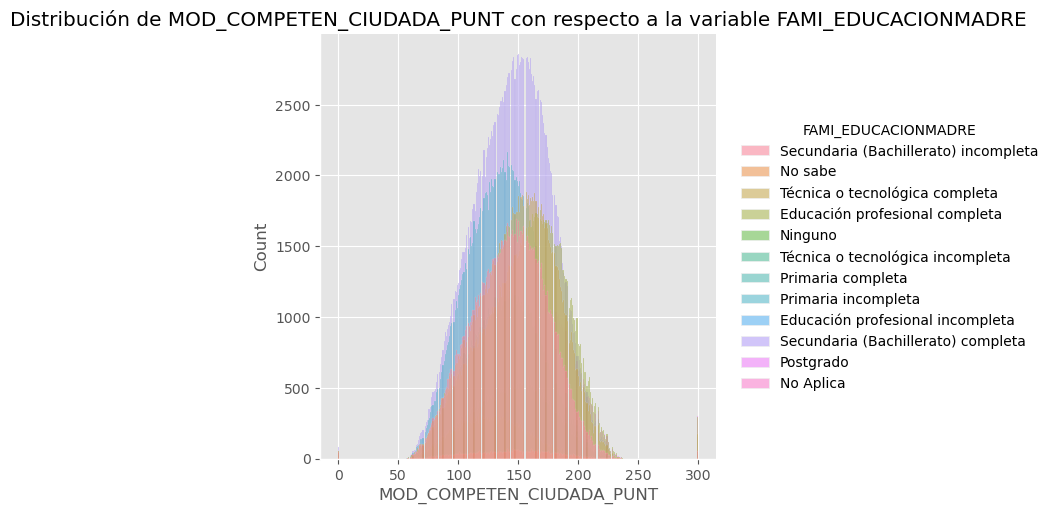

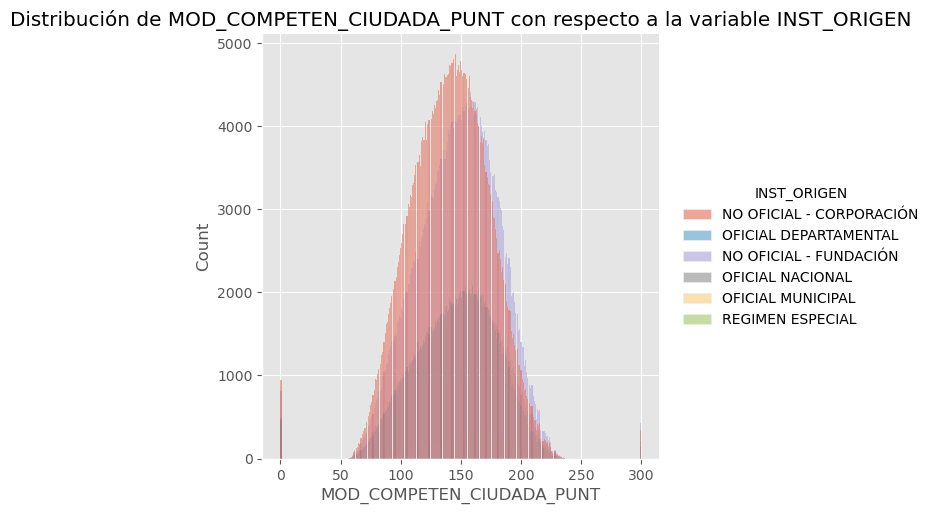

In [50]:
# Realizar gráfico de distribución del target por cada una de las variables categóricas y ordinales
excluir_grafico = ['ESTU_COD_RESIDE_DEPTO' , 'ESTU_COD_RESIDE_MCPIO' , 'ESTU_COD_DEPTO_PRESENTACION' , 'INST_COD_INSTITUCION' , 'ESTU_SNIES_PRGMACADEMICO',
                  'ESTU_PRGM_ACADEMICO']
for i in target:
    for j in data.columns.tolist():
        if j not in numeric_features and j not in target and j not in excluir_grafico:
            sns.displot(data, x = i, hue = j)
            plt.title(f'Distribución de {i} con respecto a la variable {j}')
            plt.show()

In [13]:
# Codificar las variables oridnales
codificador_ordinales = pd.read_excel('..\data\Parametros.xlsx' ,
                                      sheet_name = 'Codificacion_Ordinales',
                                      dtype = {'COLUMNA' : str , 
                                                                          'VALOR_ACTUAL' : str})
for i in ordinal_features:
    print('Categorizando variable -->' , i)
    aux = codificador_ordinales[codificador_ordinales['COLUMNA'] == i]
    data[i + '_ENCODED'] = data[i].map(dict(aux[['VALOR_ACTUAL' , 'VALOR_CODIFICADO']].values))
# Actualizar las variables ordinales
ordinal_features = [i for i in data.columns.tolist() if '_ENCODED' in i]
print('Nuevas variables oridnales:' , ordinal_features)
data

Categorizando variable --> ESTU_VALORMATRICULAUNIVERSIDAD
Categorizando variable --> ESTU_HORASSEMANATRABAJA
Categorizando variable --> FAMI_ESTRATOVIVIENDA
Categorizando variable --> FAMI_EDUCACIONPADRE
Categorizando variable --> FAMI_EDUCACIONMADRE
Nuevas variables oridnales: ['ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED', 'ESTU_HORASSEMANATRABAJA_ENCODED', 'FAMI_ESTRATOVIVIENDA_ENCODED', 'FAMI_EDUCACIONPADRE_ENCODED', 'FAMI_EDUCACIONMADRE_ENCODED']


ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
0                         11.0                11001.0   
1                         76.0                76736.0   
2                         73.0                73001.0   
3                         68.0                68081.0   
4                         11.0                11001.0   
...                        ...                    ...   
1217477                   41.0                41396.0   
1217478                   54.0                54810.0   
1217479                   11.0                11001.0   
1217480                    5.0                 5001.0   
1217481                   76.0                76001.0   

         ESTU_COD_DEPTO_PRESENTACION  INST_COD_INSTITUCION  \
0                               11.0                  2834   
1                               76.0                  1203   
2                               73.0                  2829   
3                               68.0                  2207   
4                               11.0                  1208   
...                              ...                   ...   
1217477                         11.0                  1110   
1217478                         54.0                  2728   
1217479                         11.0                  1709   
1217480                         11.0                  2110   
1217481                         11.0                  1807   

           INST_CARACTER_ACADEMICO  \
0        INSTITUCIÓN UNIVERSITARIA   
1                      UNIVERSIDAD   
2        INSTITUCIÓN UNIVERSITARIA   
3        INSTITUCIÓN UNIVERSITARIA   
4                      UNIVERSIDAD   
...                            ...   
1217477                UNIVERSIDAD   
1217478  INSTITUCIÓN UNIVERSITARIA   
1217479                UNIVERSIDAD   
1217480  INSTITUCIÓN UNIVERSITARIA   
1217481                UNIVERSIDAD   

                                   ESTU_PRGM_ACADEMICO  ESTU_METODO_PRGM  \
0                                  HOTELERIA Y TURISMO        PRESENCIAL   
1                                   CONTADURIA PUBLICA        PRESENCIAL   
2                                   CONTADURÍA PÚBLICA         DISTANCIA   
3                INGENIERIA AMBIENTAL Y DE SANEAMIENTO        PRESENCIAL   
4        CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION  DISTANCIA VITUAL   
...                                                ...               ...   
1217477                                        DERECHO        PRESENCIAL   
1217478             LICENCIATURA EN PEDAGOGÍA INFANTIL  DISTANCIA VITUAL   
1217479                                     PUBLICIDAD        PRESENCIAL   
1217480                           INGENIERIA AMBIENTAL        PRESENCIAL   
1217481                                       MERCADEO        PRESENCIAL   

                   ESTU_VALORMATRICULAUNIVERSIDAD ESTU_PAGOMATRICULABECA  \
0        Entre 2.5 millones y menos de 4 millones                     No   
1                                Menos de 500 mil                     No   
2          Entre 1 millón y menos de 2.5 millones                     No   
3               Entre 500 mil y menos de 1 millón                     No   
4               Entre 500 mil y menos de 1 millón                     No   
...                                           ...                    ...   
1217477                         No pagó matrícula                     No   
1217478    Entre 1 millón y menos de 2.5 millones                     No   
1217479  Entre 4 millones y menos de 5.5 millones                     No   
1217480    Entre 1 millón y menos de 2.5 millones                     Si   
1217481  Entre 2.5 millones y menos de 4 millones                     No   

        ESTU_PAGOMATRICULACREDITO  ... MOD_COMUNI_ESCRITA_PUNT  \
0                              No  ...                   174.0   
1                              No  ...                   170.0   
2                              No  ...                    77.0   
3                              N

In [14]:
# Imputar información
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

In [15]:
# Graficar variables numéricas
for col in numeric_features:
    try:
      plt.figure()
      sns.distplot(data[col])
    except:
      print(f'Column {col} is not numeric')

In [16]:
# Verificar nuevamente que no existan nulos
(data.isnull().sum() / data.shape[0]).sort_values()

ESTU_COD_RESIDE_DEPTO                     0.000000
FAMI_ESTRATOVIVIENDA_ENCODED              0.000000
ESTU_HORASSEMANATRABAJA_ENCODED           0.000000
ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED    0.000000
PUNTAJE_GLOBAL                            0.000000
MOD_COMPETEN_CIUDADA_PUNT                 0.000000
MOD_INGLES_PUNT                           0.000000
MOD_LECTURA_CRITICA_PUNT                  0.000000
MOD_COMUNI_ESCRITA_PUNT                   0.000000
MOD_RAZONA_CUANTITAT_PUNT                 0.000000
INST_ORIGEN                               0.000000
FAMI_TIENEINTERNET                        0.000000
FAMI_TIENECOMPUTADOR                      0.000000
FAMI_TIENELAVADORA                        0.000000
FAMI_EDUCACIONPADRE_ENCODED               0.000000
FAMI_TIENEAUTOMOVIL                       0.000000
ESTU_PAGOMATRICULABECA                    0.000000
ESTU_COD_RESIDE_MCPIO                     0.000000
ESTU_COD_DEPTO_PRESENTACION               0.000000
INST_COD_INSTITUCION           

In [17]:
# Qualitative variable analysis
for i in list(data.columns):
    if i not in numeric_features and i not in target:
        print('-' * 50)
        print(f'{i :-<20} : {data[i].unique()} : Total valores unicos : {len(data[i].unique().tolist())}')

--------------------------------------------------
ESTU_COD_RESIDE_DEPTO : [11.0 76.0 73.0 68.0 70.0 5.0 15.0 19.0 41.0 25.0 23.0 8.0 13.0 81.0 54.0
 17.0 66.0 20.0 63.0 47.0 27.0 44.0 50.0 18.0 52.0 86.0 91.0 85.0 88.0
 95.0 99999.0 94.0 97.0 99.0 0.0]
--------------------------------------------------
ESTU_COD_RESIDE_MCPIO : [11001.0 76736.0 73001.0 ... 23.0 9.0 6.0]
--------------------------------------------------
ESTU_COD_DEPTO_PRESENTACION : [11.0 76.0 73.0 68.0 70.0 5.0 15.0 19.0 41.0 25.0 23.0 8.0 13.0 81.0 54.0
 17.0 66.0 20.0 63.0 47.0 27.0 50.0 18.0 52.0 44.0 86.0 91.0 85.0 95.0
 88.0 0.0 94.0 97.0 99.0]
--------------------------------------------------
INST_COD_INSTITUCION : [2834 1203 2829 2207 1208 2823 1701 2102 2725 2745 2732 1725 1106 1719
 1818 1110 2849 1114 1723 1219 1717 1204 1813 1815 1711 1707 1113 9119
 1825 1724 1101 1105 1835 1833 1210 2302 1805 2825 1722 1122 1729 2805
 1718 1726 1201 1826 2832 1714 2711 2850 2715 1709 2728 1817 1214 1111
 5802 2813 2833 18


------------------------------------



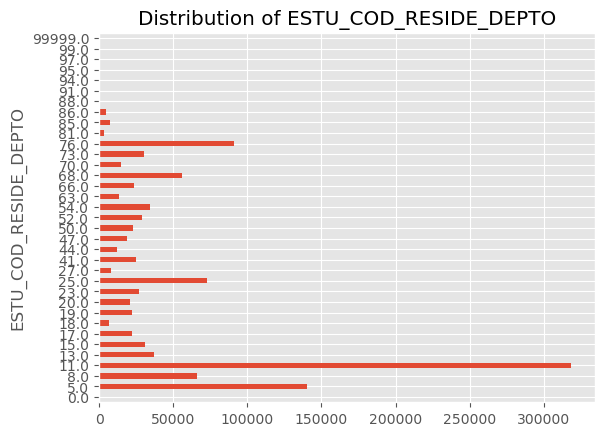


------------------------------------



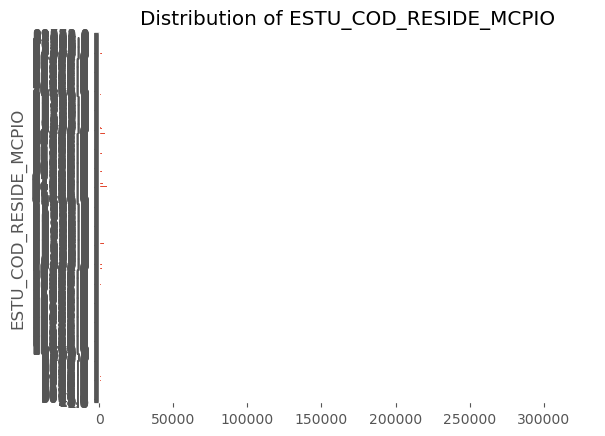


------------------------------------



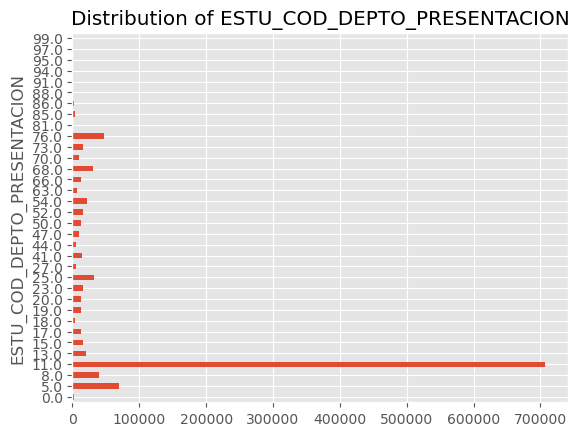


------------------------------------



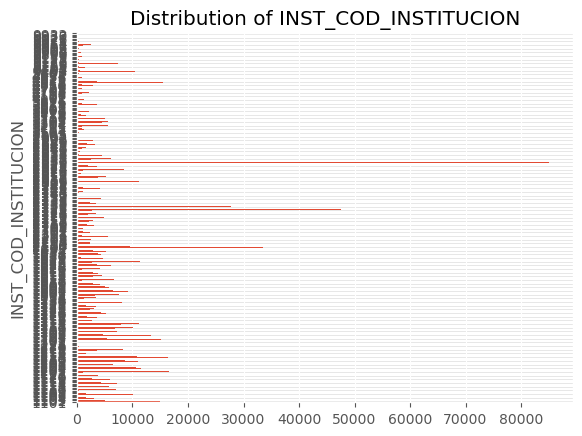


------------------------------------



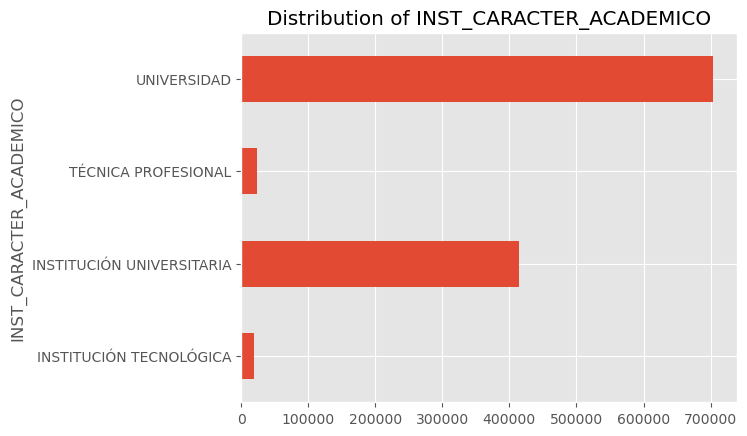


------------------------------------



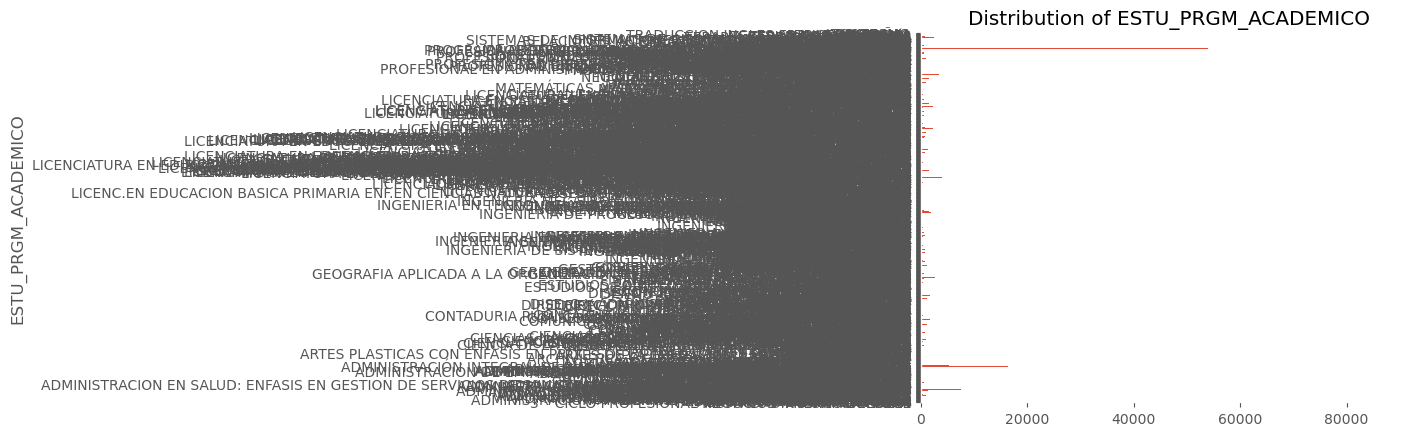


------------------------------------



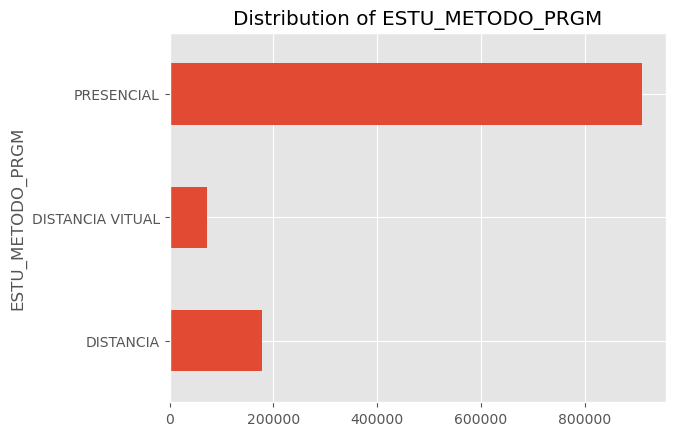


------------------------------------



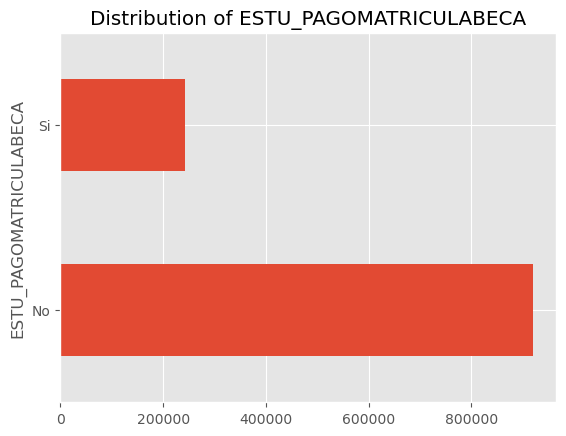


------------------------------------



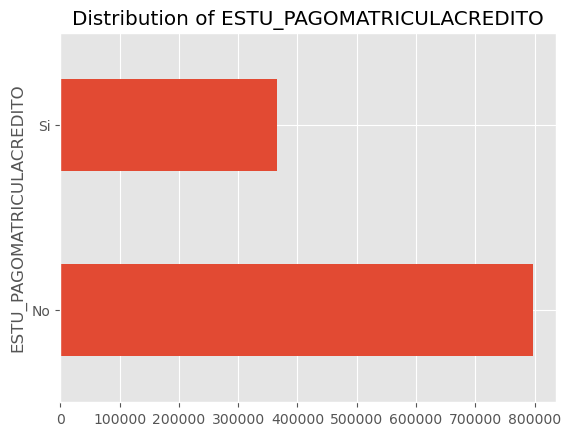


------------------------------------



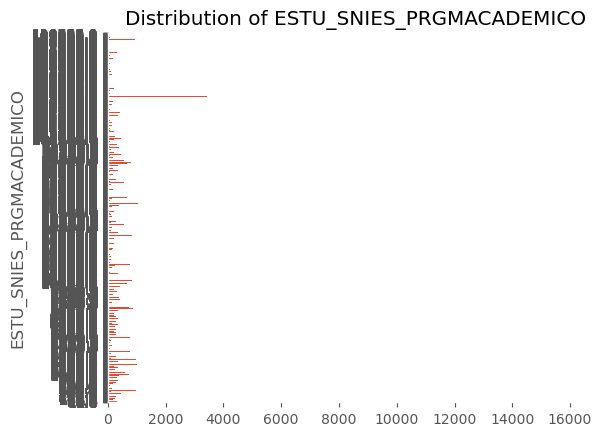


------------------------------------



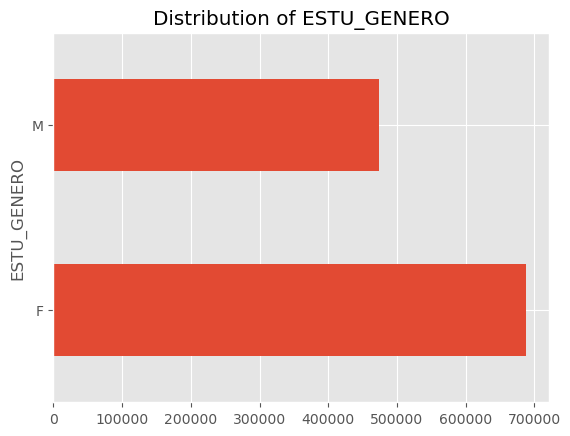


------------------------------------



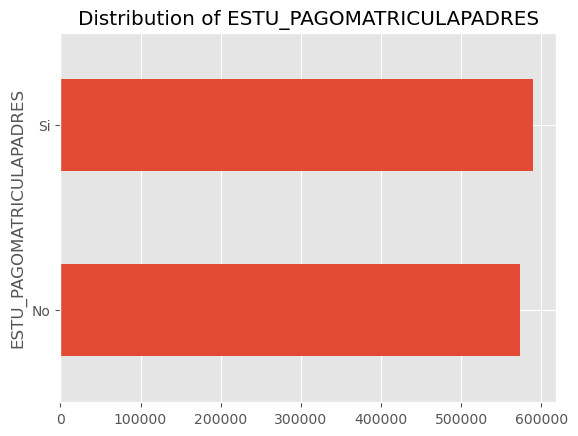


------------------------------------



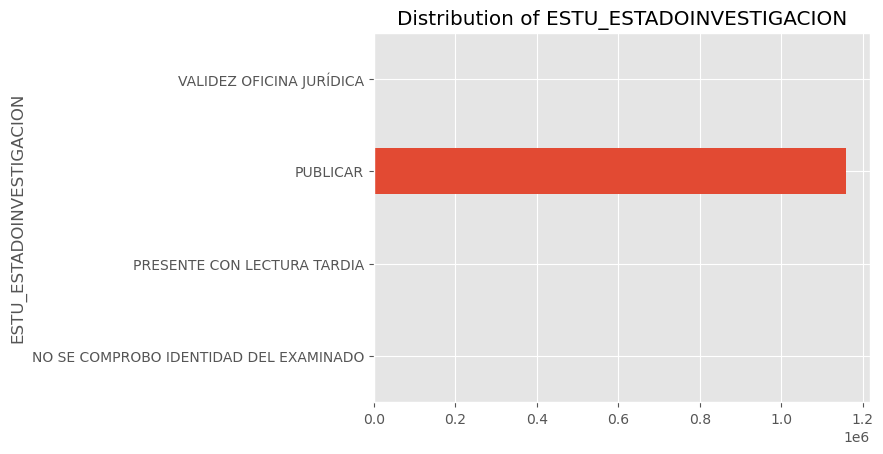


------------------------------------



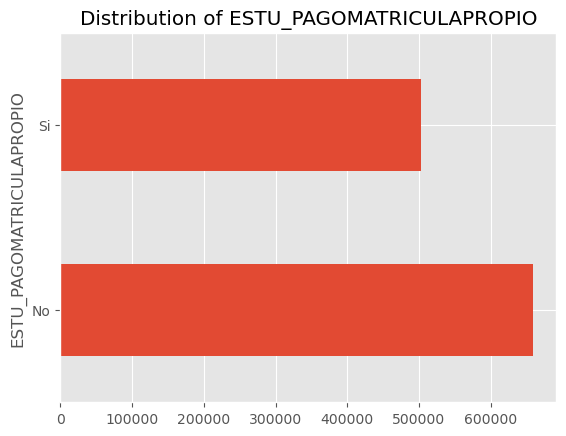


------------------------------------



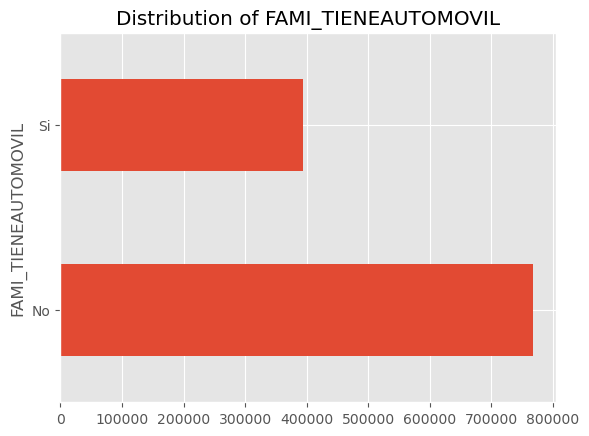


------------------------------------



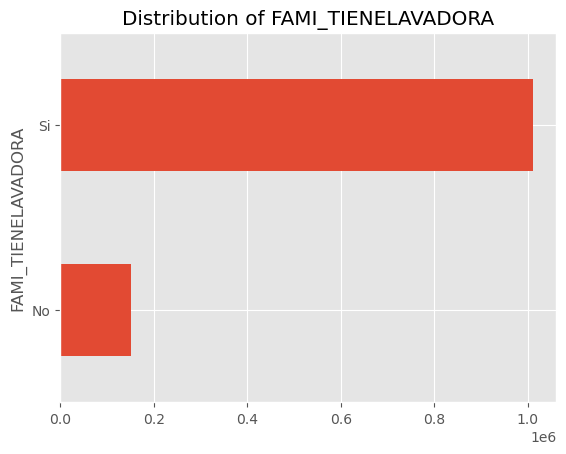


------------------------------------



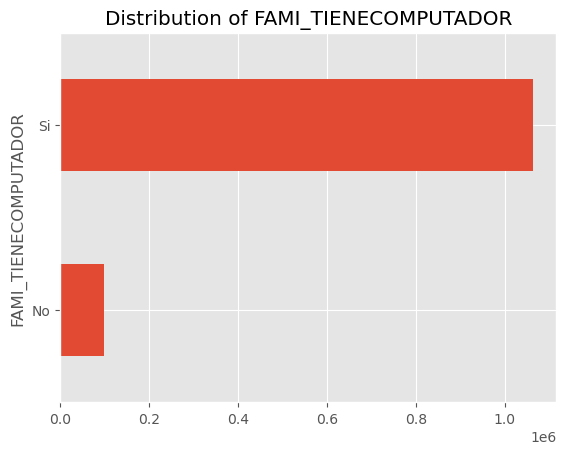


------------------------------------



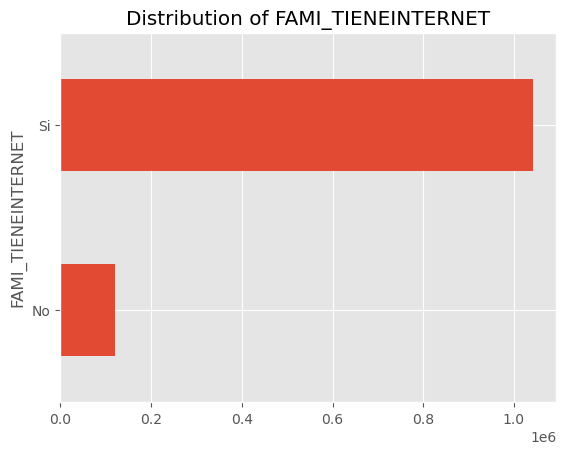


------------------------------------



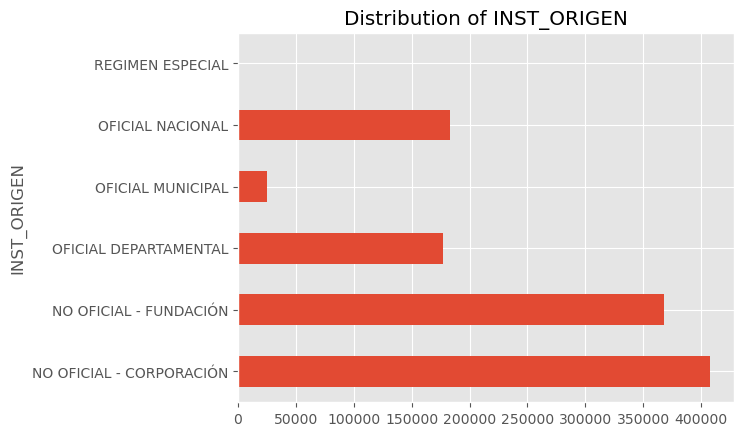


------------------------------------



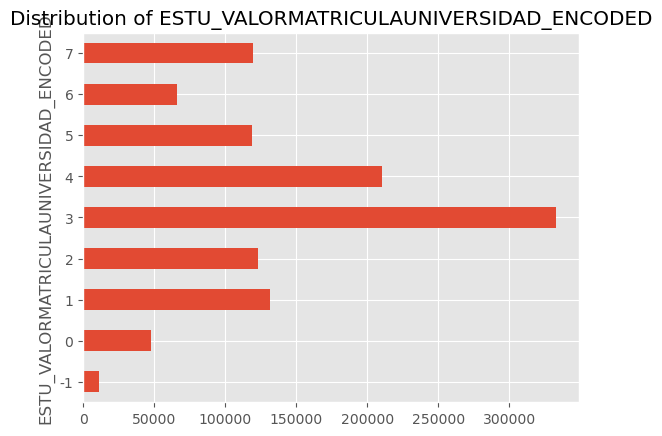


------------------------------------



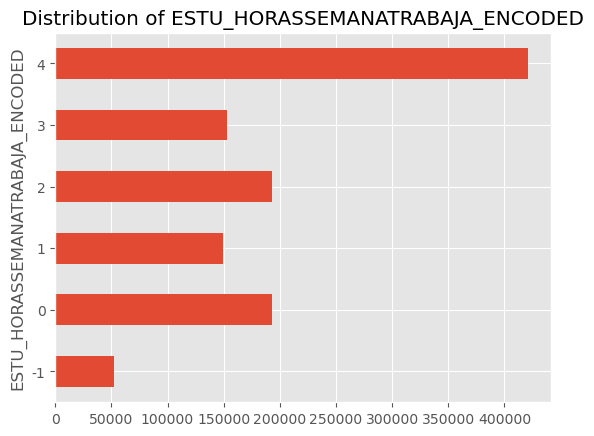


------------------------------------



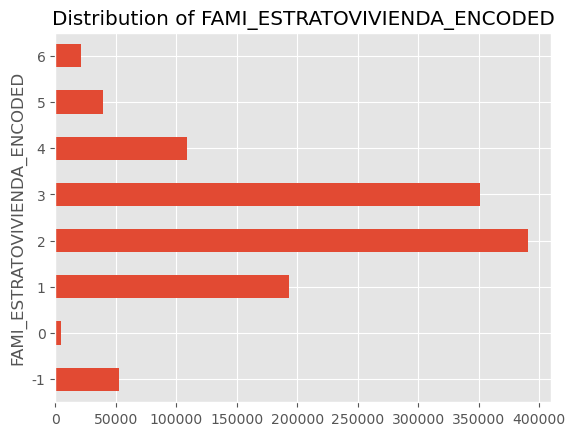


------------------------------------



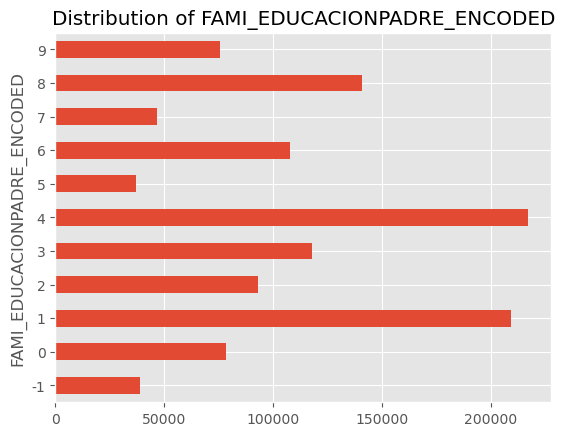


------------------------------------



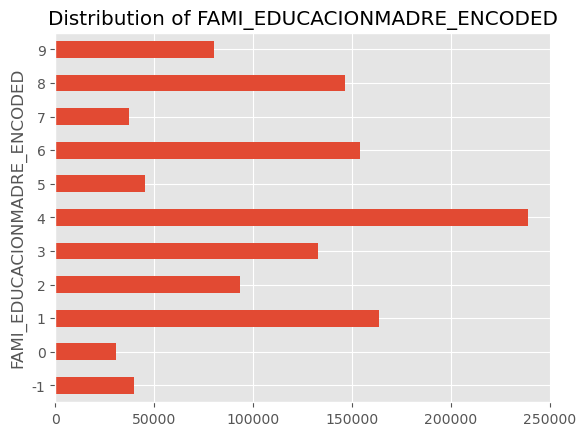

In [18]:
# Horizontal bar plot for cateogorical features
for i in list(data.columns):
    if i in categorical_features or i in ordinal_features:
        print('\n------------------------------------\n')
        data.groupby(i)[target[0]].count().plot(kind = 'barh' , title = 'Distribution of ' + i)
        plt.show()

# **3. Ingeniería de características**
En esta sección se aplican las transformaciones a las variables, así como la aplicación de diferentes técnicas para el mejoramiento del desempeño de los modelos

In [20]:
# Aplicar one hot encoding a las variables categóricas
numeric_scaler = MinMaxScaler()
cat_encoder = OrdinalEncoder()
target_scaler = StandardScaler()
# Definir una base con las variables que son categoricas pero no se necesitan hacer one hot encoding
categorical_no_encoding = ['ESTU_COD_RESIDE_DEPTO',
                             'ESTU_COD_RESIDE_MCPIO',
                             'ESTU_COD_DEPTO_PRESENTACION',
                             'INST_COD_INSTITUCION']
categorical_yes_encoding = [i for i in categorical_features if i not in categorical_no_encoding]
# Fit objects
#numeric_scaler.fit(data_1[numeric_features])
cat_encoder.fit(data[categorical_yes_encoding])
target_scaler.fit(data[target])
# Transformar la información
#aux_numeric = pd.DataFrame(numeric_scaler.transform(data_1[numeric_features]) , columns = data_1[numeric_features].columns.tolist())
#aux_categorical = pd.DataFrame.sparse.from_spmatrix(cat_encoder.transform(data[categorical_features]) , columns = cat_encoder.get_feature_names_out().tolist())
aux_categorical = pd.DataFrame(cat_encoder.transform(data[categorical_yes_encoding]) , columns = categorical_yes_encoding)
aux_target = pd.DataFrame(target_scaler.transform(data[target]) , columns = target)
# Concatenar la información
data_2 = pd.concat([aux_categorical.reset_index(drop = True),
                    data[ordinal_features].reset_index(drop = True),
                    data[categorical_no_encoding].reset_index(drop = True),
                    aux_target.reset_index(drop = True)] , axis = 1)
# Definir los tipos de datos para las variables
for i in data_2.columns.tolist():
    print('-' * 25)
    print(i)
    if i in numeric_features or i in target:
        data_2[i] = data_2[i].astype(float)
        print('Variable' , i , 'converdita a float')
    if i in ordinal_features or i in categorical_features:
        data_2[i] = data_2[i].astype(int)
        print('Variable' , i , 'convertida a int')
data_2

-------------------------
INST_CARACTER_ACADEMICO
Variable INST_CARACTER_ACADEMICO convertida a int
-------------------------
ESTU_PRGM_ACADEMICO
Variable ESTU_PRGM_ACADEMICO convertida a int
-------------------------
ESTU_METODO_PRGM
Variable ESTU_METODO_PRGM convertida a int
-------------------------
ESTU_PAGOMATRICULABECA
Variable ESTU_PAGOMATRICULABECA convertida a int
-------------------------
ESTU_PAGOMATRICULACREDITO
Variable ESTU_PAGOMATRICULACREDITO convertida a int
-------------------------
ESTU_SNIES_PRGMACADEMICO
Variable ESTU_SNIES_PRGMACADEMICO convertida a int
-------------------------
ESTU_GENERO
Variable ESTU_GENERO convertida a int
-------------------------
ESTU_PAGOMATRICULAPADRES
Variable ESTU_PAGOMATRICULAPADRES convertida a int
-------------------------
ESTU_ESTADOINVESTIGACION
Variable ESTU_ESTADOINVESTIGACION convertida a int
-------------------------
ESTU_PAGOMATRICULAPROPIO
Variable ESTU_PAGOMATRICULAPROPIO convertida a int
-------------------------
FAMI_TIENE

INST_CARACTER_ACADEMICO  ESTU_PRGM_ACADEMICO  ESTU_METODO_PRGM  \
0                              1                  381                 2   
1                              3                  241                 2   
2                              1                  248                 0   
3                              1                  397                 2   
4                              3                  173                 1   
...                          ...                  ...               ...   
1161909                        3                  262                 2   
1161910                        1                  833                 1   
1161911                        3                  980                 2   
1161912                        1                  396                 2   
1161913                        3                  875                 2   

         ESTU_PAGOMATRICULABECA  ESTU_PAGOMATRICULACREDITO  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
1161909                       0                          0   
1161910                       0                          0   
1161911                       0                          0   
1161912                       1                          0   
1161913                       0                          0   

         ESTU_SNIES_PRGMACADEMICO  ESTU_GENERO  ESTU_PAGOMATRICULAPADRES  \
0                            2897            0                         1   
1                            2477            1                         1   
2                            3207            1                         0   
3                             830            1                         1   
4                             284            0                         0   
...                           ...          ...                       ...   
1161909                        97            1                         0   
1161910                      3538            0                         0   
1161911                       397            0                         1   
1161912                      2857            0                         0   
1161913                      2454            0                         0   

         ESTU_ESTADOINVESTIGACION  ESTU_PAGOMATRICULAPROPIO  ...  \
0                               2                         0  ...   
1                               2                         0  ...   
2                               2                         1  ...   
3                               2                         0  ...   
4                               2                         1  ...   
...                           ...                       ...  ...   
1161909                         2                         0  ...   
1161910                         2                         1  ...   
1161911                         2                         1  ...   
1161912                         2                         0  ...   
1161913                         2                         1  ...   

         ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
0                           11                  11001   
1                           76                  76736   
2                           73                  73001   
3                           68                  68081   
4                           11                  11001   
...                        ...                    ...   
1161909                     41                  41396   
1161910                     54                  54810   
1161911                     11                  11001   
1161912                      5                   5001   
116191

In [21]:
# Extraer la data de prueba
# Definir X Y
X = data_2.drop(columns = target).copy()
Y = data_2[target].copy()
# Definir semilla para el train_test split
SEED = 1234

# Separar información
X_train , X_test , Y_train , Y_test = train_test_split(X,
                                                       Y,
                                                       test_size = 0.1,
                                                       random_state = SEED,
                                                      stratify = X['ESTU_COD_RESIDE_DEPTO'])

# Crear objeto de validación cruzada
skf = KFold(n_splits = 5)

## **3.1 Análisis de Importancia de variables**
En esta sección se realizará un análisis de importancia y selección de varibles para los experimentos de entrenamiento de modelos

In [22]:
# Crear y entrenar un modelo de Random Forest que prediga la variable de puntaje global
seleccion_variables = XGBRegressor()
seleccion_variables.fit(X , Y[['PUNTAJE_GLOBAL']])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
importancia_variables = pd.DataFrame({'Puntaje' : seleccion_variables.feature_importances_.tolist(),
                                      'Variable' : seleccion_variables.feature_names_in_.tolist()})
importancia_variables = importancia_variables.sort_values(by = 'Puntaje' , ascending = False)
importancia_variables['Puntaje_acumulado'] = importancia_variables['Puntaje'].cumsum()
variables_seleccionadas = importancia_variables[importancia_variables['Puntaje_acumulado'] < 0.8]['Variable'].values.tolist()
print('Variables seleccionadas:' , variables_seleccionadas)
importancia_variables

Variables seleccionadas: ['ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED', 'ESTU_METODO_PRGM', 'INST_COD_INSTITUCION', 'FAMI_EDUCACIONMADRE_ENCODED', 'FAMI_TIENECOMPUTADOR', 'FAMI_ESTRATOVIVIENDA_ENCODED', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_PAGOMATRICULABECA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE_ENCODED']


Puntaje                                Variable  Puntaje_acumulado
15  0.191688  ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED           0.191688
2   0.114686                        ESTU_METODO_PRGM           0.306374
23  0.093215                    INST_COD_INSTITUCION           0.399589
19  0.064830             FAMI_EDUCACIONMADRE_ENCODED           0.464419
12  0.061514                    FAMI_TIENECOMPUTADOR           0.525932
17  0.060727            FAMI_ESTRATOVIVIENDA_ENCODED           0.586659
20  0.048436                   ESTU_COD_RESIDE_DEPTO           0.635095
3   0.046337                  ESTU_PAGOMATRICULABECA           0.681432
13  0.044507                      FAMI_TIENEINTERNET           0.725940
18  0.040205             FAMI_EDUCACIONPADRE_ENCODED           0.766145
9   0.036609                ESTU_PAGOMATRICULAPROPIO           0.802754
6   0.030907                             ESTU_GENERO           0.833661
16  0.025662         ESTU_HORASSEMANATRABAJA_ENCODED           0.859323
1   0.022273                     ESTU_PRGM_ACADEMICO           0.881596
14  0.020711                             INST_ORIGEN           0.902308
5   0.018255                ESTU_SNIES_PRGMACADEMICO           0.920562
11  0.013272                      FAMI_TIENELAVADORA           0.933834
4   0.013111               ESTU_PAGOMATRICULACREDITO           0.946945
0   0.011673                 INST_CARACTER_ACADEMICO           0.958618
21  0.011244                   ESTU_COD_RESIDE_MCPIO           0.969862
7   0.010364                ESTU_PAGOMATRICULAPADRES           0.980226
22  0.008232             ESTU_COD_DEPTO_PRESENTACION           0.988458
8   0.006796                ESTU_ESTADOINVESTIGACION           0.995254
10  0.004746                     FAMI_TIENEAUTOMOVIL           1.000000

# **4. Entrenamiento de modelos**
En esta sección se entrenaran los siguientes modelos:

1. Extreme Gradient Boosting (XGBoost).
2. Hist Gradient Boosting,
3. Bagging
4. Fully Conected Neural Network de la librería Pytorch con capas de normalización y de dropout.
5. Arboles de decision
6. AdaBoost,

Los modelos se entrenarán usando el split de entrenamiento generado anteriormente, haciendo uso de validación cruzada con 5-folds y se evaluarán sobre el subset de validación del fold, y el split de prueba para obtener una distribución de métricas al final del proceso.

Se tendran dos grupos de entrenamiento, el primero con todas las variables, y el segundo sólo con las variables seleccionadas. Esto, con la finalidad de encontrar la relación desempeño / tiempo entrenamiento.

Por último, sobre el mejor modelo de cada sección anterior, se realizará optimización de hiperparámetros.

In [24]:
# Definir arquitectura del modelo de Pytorch
class FullyConnectedModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_prob=0.5):
        super(FullyConnectedModel, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.dropout_prob = dropout_prob

        layers = []
        # Crear capas ocultas
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.Dropout(p=self.dropout_prob))
            layers.append(nn.ReLU())
            prev_size = hidden_size

        # Capa de salida con activación linear
        layers.append(nn.Linear(prev_size, output_size))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

# Define function to save pytorch model for early stopping
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

# Define function to load best early stopping pytorch model to continue with the evaluation
def resume(model, filename):
    model.load_state_dict(torch.load(filename))

## **4.1 Entrenamiento de modelos con todas las variables**

### **4.1.1 XGBoost**

In [25]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'XGBoost'
tipo_modelo = XGBRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 25.405992497175927
MAE: 19.30897023240006
MAPE: 834095839571619.0
Metricas de data de validacion:
RMSE: 25.576561623043627
MAE: 19.446473185343205
MAPE: 799302166843178.0
Metricas de data de validacion:
RMSE: 25.594133598066097
MAE: 19.45209590146378
MAPE: 809096200340134.4
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 25.368128110699068
MAE: 19.28348940348373
MAPE: 827106825544345.9
Metricas de data de validacion:
RMSE: 25.688575000011507
MAE: 19.510349048481242
MAPE: 813879993414856.4
Metricas de data de validacion:
RMSE: 25.588788662466765
MAE: 19.4424487193296
MAPE: 808879631897678.1
--------------------------------------------------
Entrenando con fold 3 / 5
------------------------------------

In [26]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost.sav


Fold       RMSE        MAE          MAPE   Modelo  \
0     1  25.405992  19.308970  8.340958e+14  XGBoost   
0     2  25.368128  19.283489  8.271068e+14  XGBoost   
0     3  25.392274  19.299806  8.160205e+14  XGBoost   
0     4  25.381931  19.296152  8.236922e+14  XGBoost   
0     5  25.372131  19.290439  8.093027e+14  XGBoost   
0     1  25.576562  19.446473  7.993022e+14  XGBoost   
0     2  25.688575  19.510349  8.138800e+14  XGBoost   
0     3  25.612619  19.459865  8.668580e+14  XGBoost   
0     4  25.669585  19.492575  8.349472e+14  XGBoost   
0     5  25.671935  19.477469  9.049550e+14  XGBoost   
0     1  25.594134  19.452096  8.090962e+14  XGBoost   
0     2  25.588789  19.442449  8.088796e+14  XGBoost   
0     3  25.590437  19.443564  8.087241e+14  XGBoost   
0     4  25.593824  19.447402  8.088032e+14  XGBoost   
0     5  25.583553  19.437768  8.088978e+14  XGBoost   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        2.333871       Entrenamiento  
0                        2.333871       Entrenamiento  
0                        2.333871       Entrenamiento  
0                        2.333871       Entrenamiento  
0                        2.333871       Entrenamiento  
0                        2.333871  Validacion_Cruzada  
0                        2.333871  Validacion_Cruzada  
0                        2.333871  Validacion_Cruzada  
0                        2.333871  Validacion_Cruzada  
0                        2.333871  Validacion_Cruzada  
0                        2.333871              Prueba  
0                        2.333871              Prueba  
0                        2.333871              Prueba  
0                        2.333871              Prueba  
0                        2.333871              Prueba

### **4.1.2 HistGradientBoosting**

In [27]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'HistGradientBoosting'
tipo_modelo = HistGradientBoostingRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 25.87264273605281
MAE: 19.696916360329883
MAPE: 866993375648076.0
Metricas de data de validacion:
RMSE: 25.827017796456705
MAE: 19.683901959289997
MAPE: 814487365155551.6
Metricas de data de validacion:
RMSE: 25.858891714493495
MAE: 19.698272987808863
MAPE: 823826927366367.4
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 25.84392567750121
MAE: 19.678486840478072
MAPE: 863387782328805.9
Metricas de data de validacion:
RMSE: 25.945163525908068
MAE: 19.75307923985633
MAPE: 829600083137504.6
Metricas de data de validacion:
RMSE: 25.86212893431463
MAE: 19.701131309549577
MAPE: 823230586550905.6
--------------------------------------------------
Entrenando con fold 3 / 5
-----------------------------------

In [28]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\HistGradientBoosting.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\HistGradientBoosting.sav


Fold       RMSE        MAE          MAPE                Modelo  \
0     1  25.872643  19.696916  8.669934e+14  HistGradientBoosting   
0     2  25.843926  19.678487  8.633878e+14  HistGradientBoosting   
0     3  25.862974  19.692390  8.498593e+14  HistGradientBoosting   
0     4  25.848022  19.684309  8.583334e+14  HistGradientBoosting   
0     5  25.846854  19.684977  8.399427e+14  HistGradientBoosting   
0     1  25.827018  19.683902  8.144874e+14  HistGradientBoosting   
0     2  25.945164  19.753079  8.296001e+14  HistGradientBoosting   
0     3  25.879039  19.705117  8.865529e+14  HistGradientBoosting   
0     4  25.925523  19.735306  8.503800e+14  HistGradientBoosting   
0     5  25.934923  19.724807  9.173667e+14  HistGradientBoosting   
0     1  25.858892  19.698273  8.238269e+14  HistGradientBoosting   
0     2  25.862129  19.701131  8.232306e+14  HistGradientBoosting   
0     3  25.862874  19.701559  8.241429e+14  HistGradientBoosting   
0     4  25.857788  19.699820  8.230509e+14  HistGradientBoosting   
0     5  25.859865  19.699367  8.232395e+14  HistGradientBoosting   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        4.592222       Entrenamiento  
0                        4.592222       Entrenamiento  
0                        4.592222       Entrenamiento  
0                        4.592222       Entrenamiento  
0                        4.592222       Entrenamiento  
0                        4.592222  Validacion_Cruzada  
0                        4.592222  Validacion_Cruzada  
0                        4.592222  Validacion_Cruzada  
0                        4.592222  Validacion_Cruzada  
0                        4.592222  Validacion_Cruzada  
0                        4.592222              Prueba  
0                        4.592222              Prueba  
0                        4.592222              Prueba  
0                        4.592222              Prueba  
0                        4.592222              Prueba

### **4.1.3 Adaboost**

In [29]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'AdaBoost'
tipo_modelo = AdaBoostRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 28.58176813342553
MAE: 22.215371421914863
MAPE: 811899426806355.0
Metricas de data de validacion:
RMSE: 28.505419189784654
MAE: 22.152980780411678
MAPE: 764713906800904.9
Metricas de data de validacion:
RMSE: 28.541620899959767
MAE: 22.184609260370546
MAPE: 776305410331962.1
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 28.53295813091298
MAE: 22.18277773263824
MAPE: 814870611567411.9
Metricas de data de validacion:
RMSE: 28.587014618257218
MAE: 22.221513150370328
MAPE: 778613434604033.4
Metricas de data de validacion:
RMSE: 28.521094803698972
MAE: 22.1734180782481
MAPE: 780329594909470.0
--------------------------------------------------
Entrenando con fold 3 / 5
------------------------------------

In [30]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\AdaBoost.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\AdaBoost.sav


Fold       RMSE        MAE          MAPE    Modelo  \
0     1  28.581768  22.215371  8.118994e+14  AdaBoost   
0     2  28.532958  22.182778  8.148706e+14  AdaBoost   
0     3  28.186805  21.858196  7.971503e+14  AdaBoost   
0     4  28.473978  22.122417  8.188378e+14  AdaBoost   
0     5  28.426918  22.085308  8.213116e+14  AdaBoost   
0     1  28.505419  22.152981  7.647139e+14  AdaBoost   
0     2  28.587015  22.221513  7.786134e+14  AdaBoost   
0     3  28.162694  21.855466  8.253778e+14  AdaBoost   
0     4  28.525616  22.156729  8.137924e+14  AdaBoost   
0     5  28.457894  22.092149  8.884142e+14  AdaBoost   
0     1  28.541621  22.184609  7.763054e+14  AdaBoost   
0     2  28.521095  22.173418  7.803296e+14  AdaBoost   
0     3  28.162031  21.844255  7.755832e+14  AdaBoost   
0     4  28.464742  22.117911  7.890963e+14  AdaBoost   
0     5  28.402612  22.064095  8.048145e+14  AdaBoost   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                       22.887786       Entrenamiento  
0                       22.887786       Entrenamiento  
0                       22.887786       Entrenamiento  
0                       22.887786       Entrenamiento  
0                       22.887786       Entrenamiento  
0                       22.887786  Validacion_Cruzada  
0                       22.887786  Validacion_Cruzada  
0                       22.887786  Validacion_Cruzada  
0                       22.887786  Validacion_Cruzada  
0                       22.887786  Validacion_Cruzada  
0                       22.887786              Prueba  
0                       22.887786              Prueba  
0                       22.887786              Prueba  
0                       22.887786              Prueba  
0                       22.887786              Prueba

### **4.1.4 Bagging**

In [31]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Bagging'
tipo_modelo = BaggingRegressor(verbose = 1)

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


RMSE: 12.340064593554615
MAE: 8.683858929844726
MAPE: 345824754865138.44
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.78225411023941
MAE: 21.135770696050002
MAPE: 778217136769481.9
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


RMSE: 27.848337034611834
MAE: 21.161278089409453
MAPE: 798334372067418.9
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


RMSE: 12.31623609753591
MAE: 8.669345630939723
MAPE: 341672280106464.06
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.901807633349883
MAE: 21.203855225446137
MAPE: 796676917352069.6
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


RMSE: 27.823858638228188
MAE: 21.144480971037975
MAPE: 790998772553038.4
--------------------------------------------------
Entrenando con fold 3 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


RMSE: 12.321185030715018
MAE: 8.674232763386724
MAPE: 339645973152520.8
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.83364703444217
MAE: 21.160337603319736
MAPE: 845810247109310.4
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


RMSE: 27.862679756124646
MAE: 21.173002000959194
MAPE: 797748519038692.1
--------------------------------------------------
Entrenando con fold 4 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


RMSE: 12.32595366073032
MAE: 8.676375373567039
MAPE: 343024123153358.8
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.904986302120488
MAE: 21.20505146061129
MAPE: 810425206494505.1
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


RMSE: 27.856440916902983
MAE: 21.167866784195056
MAPE: 802274682190765.4
--------------------------------------------------
Entrenando con fold 5 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


RMSE: 12.316816179650568
MAE: 8.673025788491092
MAPE: 336496863509747.25
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.893974370480205
MAE: 21.19150163009172
MAPE: 883028206194947.1
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 27.83092955760393
MAE: 21.150594470075067
MAPE: 793484087955829.9
0:39:14.388956


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


In [32]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Bagging.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Bagging.sav


Fold       RMSE        MAE          MAPE   Modelo  \
0     1  12.340065   8.683859  3.458248e+14  Bagging   
0     2  12.316236   8.669346  3.416723e+14  Bagging   
0     3  12.321185   8.674233  3.396460e+14  Bagging   
0     4  12.325954   8.676375  3.430241e+14  Bagging   
0     5  12.316816   8.673026  3.364969e+14  Bagging   
0     1  27.782254  21.135771  7.782171e+14  Bagging   
0     2  27.901808  21.203855  7.966769e+14  Bagging   
0     3  27.833647  21.160338  8.458102e+14  Bagging   
0     4  27.904986  21.205051  8.104252e+14  Bagging   
0     5  27.893974  21.191502  8.830282e+14  Bagging   
0     1  27.848337  21.161278  7.983344e+14  Bagging   
0     2  27.823859  21.144481  7.909988e+14  Bagging   
0     3  27.862680  21.173002  7.977485e+14  Bagging   
0     4  27.856441  21.167867  8.022747e+14  Bagging   
0     5  27.830930  21.150594  7.934841e+14  Bagging   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                       39.239816       Entrenamiento  
0                       39.239816       Entrenamiento  
0                       39.239816       Entrenamiento  
0                       39.239816       Entrenamiento  
0                       39.239816       Entrenamiento  
0                       39.239816  Validacion_Cruzada  
0                       39.239816  Validacion_Cruzada  
0                       39.239816  Validacion_Cruzada  
0                       39.239816  Validacion_Cruzada  
0                       39.239816  Validacion_Cruzada  
0                       39.239816              Prueba  
0                       39.239816              Prueba  
0                       39.239816              Prueba  
0                       39.239816              Prueba  
0                       39.239816              Prueba

### **4.1.5 Arbol de Decisión**

In [33]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Arbol_Decision'
tipo_modelo = DecisionTreeRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 4.517927084331882
MAE: 0.7032911720553372
MAPE: 78487763390813.89
Metricas de data de validacion:
RMSE: 37.21757564913111
MAE: 28.1852694810776
MAPE: 773810870510870.4
Metricas de data de validacion:
RMSE: 37.27516256319429
MAE: 28.20985063316914
MAPE: 779112202687817.1
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 4.507084978513234
MAE: 0.7037522512465207
MAPE: 77953758148921.83
Metricas de data de validacion:
RMSE: 37.331613823931136
MAE: 28.257363650414877
MAPE: 799949985130043.4
Metricas de data de validacion:
RMSE: 37.23824805581714
MAE: 28.183349166518394
MAPE: 779783451873002.1
--------------------------------------------------
Entrenando con fold 3 / 5
---------------------------------------

In [34]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Arbol_Decision.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Arbol_Decision.sav


Fold       RMSE        MAE          MAPE          Modelo  \
0     1   4.517927   0.703291  7.848776e+13  Arbol_Decision   
0     2   4.507085   0.703752  7.795376e+13  Arbol_Decision   
0     3   4.480834   0.697134  7.481080e+13  Arbol_Decision   
0     4   4.510029   0.704239  7.899804e+13  Arbol_Decision   
0     5   4.490195   0.699018  7.808252e+13  Arbol_Decision   
0     1  37.217576  28.185269  7.738109e+14  Arbol_Decision   
0     2  37.331614  28.257364  7.999500e+14  Arbol_Decision   
0     3  37.239514  28.206876  8.276951e+14  Arbol_Decision   
0     4  37.224439  28.190754  8.024871e+14  Arbol_Decision   
0     5  37.251731  28.200289  8.761362e+14  Arbol_Decision   
0     1  37.275163  28.209851  7.791122e+14  Arbol_Decision   
0     2  37.238248  28.183349  7.797835e+14  Arbol_Decision   
0     3  37.308217  28.230959  7.875474e+14  Arbol_Decision   
0     4  37.172549  28.149970  7.883692e+14  Arbol_Decision   
0     5  37.268018  28.215220  7.755914e+14  Arbol_Decision   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        5.110963       Entrenamiento  
0                        5.110963       Entrenamiento  
0                        5.110963       Entrenamiento  
0                        5.110963       Entrenamiento  
0                        5.110963       Entrenamiento  
0                        5.110963  Validacion_Cruzada  
0                        5.110963  Validacion_Cruzada  
0                        5.110963  Validacion_Cruzada  
0                        5.110963  Validacion_Cruzada  
0                        5.110963  Validacion_Cruzada  
0                        5.110963              Prueba  
0                        5.110963              Prueba  
0                        5.110963              Prueba  
0                        5.110963              Prueba  
0                        5.110963              Prueba

### **4.1.6 Red Neuronal**

In [35]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Red_Neuronal'
tipo_modelo = DecisionTreeRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()

# Definir parámetros de la red
BATCH_SIZE = 1024

for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]

    # Convert data to Pytorch tensors
    x_train_tensor = torch.FloatTensor(x_train.values)
    x_test_tensor = torch.FloatTensor(X_test.values)
    x_val_tensor = torch.FloatTensor(x_val.values)

    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(Y_test.values)
    y_val_tensor = torch.FloatTensor(y_val.values)

    dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = BATCH_SIZE, shuffle=True)
    dataset_size = len(dataloader.dataset)
    
    # Definir la arquitectura d ela red
    input_size = x_train.shape[1]
    hidden_sizes = [128 , 256, 512 , 256  , 32]
    output_size = Y.shape[1]
    dropout_prob = 0.5
    model = FullyConnectedModel(input_size, hidden_sizes, output_size, dropout_prob)
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Define the early stopping criteria
    early_stop_thresh = 50
    best_val_loss = 1e10
    best_epoch = -1

    # Define Scheduler for Learning Rate
    scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=30)
    
    # Training loop
    num_epochs = 500
    aux_val_loss = []
    train_loss_history = []
    val_loss_history = []
    test_loss_history = []
    for epoch in range(num_epochs):
        for id_batch, (x_batch, y_batch) in enumerate(dataloader):
            if x_batch.shape[0] > 1:
                optimizer.zero_grad()
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
        # Scheduler learning rate
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        # Evaluar el modelo para el Early Stopping
        model.eval()
        test_outputs = model(x_test_tensor)
        val_loss = criterion(test_outputs , y_test_tensor)
        val_outputs = model(x_val_tensor)
        test_loss = criterion(val_outputs , y_val_tensor)
        aux_val_loss.append(val_loss.item())
        test_loss_history.append(val_loss.item())
        train_loss_history.append(loss.item())
        val_loss_history.append(test_loss.item())
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            checkpoint(model, nombre_modelo + ".pth")
        elif epoch - best_epoch > early_stop_thresh:
            print("Early stopped training at epoch %d" % epoch)
            break  # Terminar entrenamiento
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f} , Val Loss: {val_loss.item():.4f}')
    
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_train_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()     
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_val_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()  
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()  
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Epoch [1/500], Train Loss: 0.9123 , Val Loss: 0.8829
Epoch [2/500], Train Loss: 0.8416 , Val Loss: 0.8098
Epoch [3/500], Train Loss: 0.7781 , Val Loss: 0.7932
Epoch [4/500], Train Loss: 0.7356 , Val Loss: 0.7765
Epoch [5/500], Train Loss: 0.7962 , Val Loss: 0.7644
Epoch [6/500], Train Loss: 0.7502 , Val Loss: 0.7629
Epoch [7/500], Train Loss: 0.7727 , Val Loss: 0.7549
Epoch [8/500], Train Loss: 0.7543 , Val Loss: 0.7536
Epoch [9/500], Train Loss: 0.8233 , Val Loss: 0.7477
Epoch [10/500], Train Loss: 0.7553 , Val Loss: 0.7470
Epoch [11/500], Train Loss: 0.7428 , Val Loss: 0.7434
Epoch [12/500], Train Loss: 0.7899 , Val Loss: 0.7365
Epoch [13/500], Train Loss: 0.7455 , Val Loss: 0.7361
Epoch [14/500], Train Loss: 0.7589 , Val Loss: 0.7342
Epoch [15/500], Train Loss: 0.7159 , Val Loss: 0.7347
Epoch [16/500], Train Loss: 0.7590 , Val Loss: 0.7338
Epoch [17/500], T

In [37]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Red_Neuronal.xlsx


Fold       RMSE        MAE          MAPE        Modelo  \
0     1  25.387091  19.305984  7.865649e+14  Red_Neuronal   
0     2  25.570509  19.459951  8.199013e+14  Red_Neuronal   
0     3  25.500365  19.387304  8.027744e+14  Red_Neuronal   
0     4  25.509243  19.413074  8.001959e+14  Red_Neuronal   
0     5  25.414061  19.354502  7.596130e+14  Red_Neuronal   
0     1  25.982150  19.745143  8.263078e+14  Red_Neuronal   
0     2  26.102098  19.829235  8.534947e+14  Red_Neuronal   
0     3  26.045579  19.775625  9.108859e+14  Red_Neuronal   
0     4  26.086747  19.812795  8.652219e+14  Red_Neuronal   
0     5  26.105704  19.816404  9.222457e+14  Red_Neuronal   
0     1  26.014060  19.763877  8.365922e+14  Red_Neuronal   
0     2  26.028697  19.783538  8.439718e+14  Red_Neuronal   
0     3  26.033451  19.764938  8.516633e+14  Red_Neuronal   
0     4  26.022157  19.776897  8.357048e+14  Red_Neuronal   
0     5  26.044892  19.800387  8.301181e+14  Red_Neuronal   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                      383.835834       Entrenamiento  
0                      383.835834       Entrenamiento  
0                      383.835834       Entrenamiento  
0                      383.835834       Entrenamiento  
0                      383.835834       Entrenamiento  
0                      383.835834  Validacion_Cruzada  
0                      383.835834  Validacion_Cruzada  
0                      383.835834  Validacion_Cruzada  
0                      383.835834  Validacion_Cruzada  
0                      383.835834  Validacion_Cruzada  
0                      383.835834              Prueba  
0                      383.835834              Prueba  
0                      383.835834              Prueba  
0                      383.835834              Prueba  
0                      383.835834              Prueba

## **4.2 Entrenamiento de modelos con seleccion de variables**

### **4.2.1 XGBoost**

In [38]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'XGBoost_Seleccion'
tipo_modelo = XGBRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 26.442004777838793
MAE: 20.160691164871775
MAPE: 896589292048902.9
Metricas de data de validacion:
RMSE: 26.52744431679277
MAE: 20.236269621749365
MAPE: 853446646619724.6
Metricas de data de validacion:
RMSE: 26.56309000689501
MAE: 20.257480099027088
MAPE: 862204999309804.1
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 26.40511759132271
MAE: 20.134873929613736
MAPE: 894837673223042.5
Metricas de data de validacion:
RMSE: 26.645912977559867
MAE: 20.3123093204662
MAPE: 867807892858952.6
Metricas de data de validacion:
RMSE: 26.556593489457715
MAE: 20.25046817451253
MAPE: 863123174667206.0
--------------------------------------------------
Entrenando con fold 3 / 5
-------------------------------------

In [39]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Seleccion.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Seleccion.sav


Fold       RMSE        MAE          MAPE             Modelo  \
0     1  26.442005  20.160691  8.965893e+14  XGBoost_Seleccion   
0     2  26.405118  20.134874  8.948377e+14  XGBoost_Seleccion   
0     3  26.422610  20.149175  8.786317e+14  XGBoost_Seleccion   
0     4  26.414590  20.144475  8.859003e+14  XGBoost_Seleccion   
0     5  26.411522  20.145505  8.711731e+14  XGBoost_Seleccion   
0     1  26.527444  20.236270  8.534466e+14  XGBoost_Seleccion   
0     2  26.645913  20.312309  8.678079e+14  XGBoost_Seleccion   
0     3  26.581594  20.263875  9.265272e+14  XGBoost_Seleccion   
0     4  26.622233  20.292542  8.912610e+14  XGBoost_Seleccion   
0     5  26.643857  20.288868  9.618546e+14  XGBoost_Seleccion   
0     1  26.563090  20.257480  8.622050e+14  XGBoost_Seleccion   
0     2  26.556593  20.250468  8.631232e+14  XGBoost_Seleccion   
0     3  26.563549  20.258903  8.623534e+14  XGBoost_Seleccion   
0     4  26.562147  20.256872  8.618801e+14  XGBoost_Seleccion   
0     5  26.560835  20.254498  8.642264e+14  XGBoost_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        1.751635       Entrenamiento  
0                        1.751635       Entrenamiento  
0                        1.751635       Entrenamiento  
0                        1.751635       Entrenamiento  
0                        1.751635       Entrenamiento  
0                        1.751635  Validacion_Cruzada  
0                        1.751635  Validacion_Cruzada  
0                        1.751635  Validacion_Cruzada  
0                        1.751635  Validacion_Cruzada  
0                        1.751635  Validacion_Cruzada  
0                        1.751635              Prueba  
0                        1.751635              Prueba  
0                        1.751635              Prueba  
0                        1.751635              Prueba  
0                        1.751635              Prueba

### **4.2.2 HistGradientBoosting**

In [40]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'HistGradientBoosting_Seleccion'
tipo_modelo = HistGradientBoostingRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 26.712562421787304
MAE: 20.386439331629287
MAPE: 918720700332217.0
Metricas de data de validacion:
RMSE: 26.64959155349546
MAE: 20.35759646005995
MAPE: 861166193028262.4
Metricas de data de validacion:
RMSE: 26.692192258140995
MAE: 20.382888327906763
MAPE: 869167835859531.4
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 26.68068559286407
MAE: 20.364141344259323
MAPE: 916794057740265.4
Metricas de data de validacion:
RMSE: 26.767027241102745
MAE: 20.430734253846442
MAPE: 878735052356024.6
Metricas de data de validacion:
RMSE: 26.687328815614997
MAE: 20.377790606241344
MAPE: 871238749118565.0
--------------------------------------------------
Entrenando con fold 3 / 5
----------------------------------

In [41]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\HistGradientBoosting_Seleccion.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\HistGradientBoosting_Seleccion.sav


Fold       RMSE        MAE          MAPE                          Modelo  \
0     1  26.712562  20.386439  9.187207e+14  HistGradientBoosting_Seleccion   
0     2  26.680686  20.364141  9.167941e+14  HistGradientBoosting_Seleccion   
0     3  26.696602  20.377593  9.016812e+14  HistGradientBoosting_Seleccion   
0     4  26.688436  20.372149  9.078882e+14  HistGradientBoosting_Seleccion   
0     5  26.683585  20.373421  8.908377e+14  HistGradientBoosting_Seleccion   
0     1  26.649592  20.357596  8.611662e+14  HistGradientBoosting_Seleccion   
0     2  26.767027  20.430734  8.787351e+14  HistGradientBoosting_Seleccion   
0     3  26.706630  20.383274  9.384327e+14  HistGradientBoosting_Seleccion   
0     4  26.746006  20.412872  9.034568e+14  HistGradientBoosting_Seleccion   
0     5  26.772217  20.414595  9.693587e+14  HistGradientBoosting_Seleccion   
0     1  26.692192  20.382888  8.691678e+14  HistGradientBoosting_Seleccion   
0     2  26.687329  20.377791  8.712387e+14  HistGradientBoosting_Seleccion   
0     3  26.689896  20.383411  8.708654e+14  HistGradientBoosting_Seleccion   
0     4  26.689274  20.382917  8.685019e+14  HistGradientBoosting_Seleccion   
0     5  26.690223  20.383393  8.683882e+14  HistGradientBoosting_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        3.516733       Entrenamiento  
0                        3.516733       Entrenamiento  
0                        3.516733       Entrenamiento  
0                        3.516733       Entrenamiento  
0                        3.516733       Entrenamiento  
0                        3.516733  Validacion_Cruzada  
0                        3.516733  Validacion_Cruzada  
0                        3.516733  Validacion_Cruzada  
0                        3.516733  Validacion_Cruzada  
0                        3.516733  Validacion_Cruzada  
0                        3.516733              Prueba  
0                        3.516733              Prueba  
0                        3.516733              Prueba  
0                        3.516733              Prueba  
0                        3.516733              Prueba

### **4.2.3 Adaboost**

In [42]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'AdaBoost_Seleccion'
tipo_modelo = AdaBoostRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 28.845735816854305
MAE: 22.414233222915954
MAPE: 825180200263270.9
Metricas de data de validacion:
RMSE: 28.75900201312609
MAE: 22.34744734772663
MAPE: 775565612306964.9
Metricas de data de validacion:
RMSE: 28.805254508418148
MAE: 22.37921243857089
MAPE: 785413096418988.0
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 28.871661524959556
MAE: 22.43575852266945
MAPE: 825408239081083.4
Metricas de data de validacion:
RMSE: 28.91267608967682
MAE: 22.46659523455236
MAPE: 789480550731440.5
Metricas de data de validacion:
RMSE: 28.857180596678987
MAE: 22.418195417143068
MAPE: 790513615198615.6
--------------------------------------------------
Entrenando con fold 3 / 5
-------------------------------------

In [43]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\AdaBoost_Seleccion.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\AdaBoost_Seleccion.sav


Fold       RMSE        MAE          MAPE              Modelo  \
0     1  28.845736  22.414233  8.251802e+14  AdaBoost_Seleccion   
0     2  28.871662  22.435759  8.254082e+14  AdaBoost_Seleccion   
0     3  28.832743  22.408218  8.243330e+14  AdaBoost_Seleccion   
0     4  28.499365  22.100255  8.192626e+14  AdaBoost_Seleccion   
0     5  28.783141  22.368923  8.217243e+14  AdaBoost_Seleccion   
0     1  28.759002  22.347447  7.755656e+14  AdaBoost_Seleccion   
0     2  28.912676  22.466595  7.894806e+14  AdaBoost_Seleccion   
0     3  28.804700  22.397340  8.526552e+14  AdaBoost_Seleccion   
0     4  28.545063  22.128966  8.163282e+14  AdaBoost_Seleccion   
0     5  28.826313  22.385788  8.884631e+14  AdaBoost_Seleccion   
0     1  28.805255  22.379212  7.854131e+14  AdaBoost_Seleccion   
0     2  28.857181  22.418195  7.905136e+14  AdaBoost_Seleccion   
0     3  28.806285  22.386197  7.980101e+14  AdaBoost_Seleccion   
0     4  28.490224  22.088594  7.899062e+14  AdaBoost_Seleccion   
0     5  28.772317  22.353072  8.051821e+14  AdaBoost_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        9.923715       Entrenamiento  
0                        9.923715       Entrenamiento  
0                        9.923715       Entrenamiento  
0                        9.923715       Entrenamiento  
0                        9.923715       Entrenamiento  
0                        9.923715  Validacion_Cruzada  
0                        9.923715  Validacion_Cruzada  
0                        9.923715  Validacion_Cruzada  
0                        9.923715  Validacion_Cruzada  
0                        9.923715  Validacion_Cruzada  
0                        9.923715              Prueba  
0                        9.923715              Prueba  
0                        9.923715              Prueba  
0                        9.923715              Prueba  
0                        9.923715              Prueba

### **4.2.4 Bagging**

In [44]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Bagging_Seleccion'
tipo_modelo = BaggingRegressor(verbose = 1)

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


RMSE: 21.141001310697575
MAE: 15.166380340781473
MAPE: 721154407208282.9
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.130739943075554
MAE: 22.203035857078273
MAPE: 843457381307234.4
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


RMSE: 29.14743289282514
MAE: 22.20852467458349
MAPE: 856418508119163.4
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


RMSE: 21.109570337873084
MAE: 15.151184561926021
MAPE: 718415589303535.4
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.25458666281615
MAE: 22.27719757687565
MAPE: 847188314241101.1
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


RMSE: 29.15400228820459
MAE: 22.213101660062964
MAPE: 856364063311949.4
--------------------------------------------------
Entrenando con fold 3 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


RMSE: 21.11298731132588
MAE: 15.154849221032194
MAPE: 704701120829273.9
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.207122200157514
MAE: 22.242986573839598
MAPE: 911912724971292.4
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


RMSE: 29.166205685581552
MAE: 22.209038185547854
MAPE: 857117136610760.0
--------------------------------------------------
Entrenando con fold 4 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


RMSE: 21.11444662392119
MAE: 15.155308721965318
MAPE: 713559161614085.8
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.239574695854337
MAE: 22.26607057878145
MAPE: 872514925824459.6
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


RMSE: 29.13840978359596
MAE: 22.199324205048356
MAPE: 851825917174736.0
--------------------------------------------------
Entrenando con fold 5 / 5
--------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Metricas de data de entrenamiento:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


RMSE: 21.113398317021318
MAE: 15.157871368814606
MAPE: 702574168983571.1
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.231259019626084
MAE: 22.245138957258575
MAPE: 945549341553744.0
Metricas de data de validacion:


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 29.140575200503704
MAE: 22.201073606555397
MAPE: 853799787471506.9
0:15:12.855588


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [45]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Bagging_Seleccion.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Bagging_Seleccion.sav


Fold       RMSE        MAE          MAPE             Modelo  \
0     1  21.141001  15.166380  7.211544e+14  Bagging_Seleccion   
0     2  21.109570  15.151185  7.184156e+14  Bagging_Seleccion   
0     3  21.112987  15.154849  7.047011e+14  Bagging_Seleccion   
0     4  21.114447  15.155309  7.135592e+14  Bagging_Seleccion   
0     5  21.113398  15.157871  7.025742e+14  Bagging_Seleccion   
0     1  29.130740  22.203036  8.434574e+14  Bagging_Seleccion   
0     2  29.254587  22.277198  8.471883e+14  Bagging_Seleccion   
0     3  29.207122  22.242987  9.119127e+14  Bagging_Seleccion   
0     4  29.239575  22.266071  8.725149e+14  Bagging_Seleccion   
0     5  29.231259  22.245139  9.455493e+14  Bagging_Seleccion   
0     1  29.147433  22.208525  8.564185e+14  Bagging_Seleccion   
0     2  29.154002  22.213102  8.563641e+14  Bagging_Seleccion   
0     3  29.166206  22.209038  8.571171e+14  Bagging_Seleccion   
0     4  29.138410  22.199324  8.518259e+14  Bagging_Seleccion   
0     5  29.140575  22.201074  8.537998e+14  Bagging_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        15.21426       Entrenamiento  
0                        15.21426       Entrenamiento  
0                        15.21426       Entrenamiento  
0                        15.21426       Entrenamiento  
0                        15.21426       Entrenamiento  
0                        15.21426  Validacion_Cruzada  
0                        15.21426  Validacion_Cruzada  
0                        15.21426  Validacion_Cruzada  
0                        15.21426  Validacion_Cruzada  
0                        15.21426  Validacion_Cruzada  
0                        15.21426              Prueba  
0                        15.21426              Prueba  
0                        15.21426              Prueba  
0                        15.21426              Prueba  
0                        15.21426              Prueba

### **4.2.5 Arbol de Decisión**

In [46]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Arbol_Decision_Seleccion'
tipo_modelo = DecisionTreeRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 19.757494974356586
MAE: 12.292834798942046
MAPE: 663460317665542.8
Metricas de data de validacion:
RMSE: 32.5396603154731
MAE: 24.55900596451906
MAPE: 842854392552737.0
Metricas de data de validacion:
RMSE: 32.56235955726219
MAE: 24.56817101066647
MAPE: 854041176447087.4
--------------------------------------------------
Entrenando con fold 2 / 5
--------------------------------------------------
Metricas de data de entrenamiento:
RMSE: 19.730443454169297
MAE: 12.280033369026073
MAPE: 662842571961232.9
Metricas de data de validacion:
RMSE: 32.652454051174914
MAE: 24.634332615538465
MAPE: 843281195233352.6
Metricas de data de validacion:
RMSE: 32.52375595460916
MAE: 24.550263406722234
MAPE: 849720426023663.0
--------------------------------------------------
Entrenando con fold 3 / 5
-------------------------------------

In [47]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Arbol_Decision_Seleccion.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Arbol_Decision_Seleccion.sav


Fold       RMSE        MAE          MAPE                    Modelo  \
0     1  19.757495  12.292835  6.634603e+14  Arbol_Decision_Seleccion   
0     2  19.730443  12.280033  6.628426e+14  Arbol_Decision_Seleccion   
0     3  19.726872  12.278798  6.492548e+14  Arbol_Decision_Seleccion   
0     4  19.729046  12.276768  6.579616e+14  Arbol_Decision_Seleccion   
0     5  19.729987  12.278858  6.465494e+14  Arbol_Decision_Seleccion   
0     1  32.539660  24.559006  8.428544e+14  Arbol_Decision_Seleccion   
0     2  32.652454  24.634333  8.432812e+14  Arbol_Decision_Seleccion   
0     3  32.602864  24.590865  9.066207e+14  Arbol_Decision_Seleccion   
0     4  32.598675  24.583692  8.731075e+14  Arbol_Decision_Seleccion   
0     5  32.625208  24.594535  9.451073e+14  Arbol_Decision_Seleccion   
0     1  32.562360  24.568171  8.540412e+14  Arbol_Decision_Seleccion   
0     2  32.523756  24.550263  8.497204e+14  Arbol_Decision_Seleccion   
0     3  32.606599  24.582542  8.574643e+14  Arbol_Decision_Seleccion   
0     4  32.524012  24.545924  8.477155e+14  Arbol_Decision_Seleccion   
0     5  32.533795  24.546692  8.488707e+14  Arbol_Decision_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                        1.952945       Entrenamiento  
0                        1.952945       Entrenamiento  
0                        1.952945       Entrenamiento  
0                        1.952945       Entrenamiento  
0                        1.952945       Entrenamiento  
0                        1.952945  Validacion_Cruzada  
0                        1.952945  Validacion_Cruzada  
0                        1.952945  Validacion_Cruzada  
0                        1.952945  Validacion_Cruzada  
0                        1.952945  Validacion_Cruzada  
0                        1.952945              Prueba  
0                        1.952945              Prueba  
0                        1.952945              Prueba  
0                        1.952945              Prueba  
0                        1.952945              Prueba

### **4.2.6 Red Neuronal**

In [48]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'Red_Neuronal_Seleccion'
tipo_modelo = DecisionTreeRegressor()

# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()

# Definir parámetros de la red
BATCH_SIZE = 1024

for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]

    # Convert data to Pytorch tensors
    x_train_tensor = torch.FloatTensor(x_train.values)
    x_test_tensor = torch.FloatTensor(X_test[variables_seleccionadas].values)
    x_val_tensor = torch.FloatTensor(x_val.values)

    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(Y_test.values)
    y_val_tensor = torch.FloatTensor(y_val.values)

    dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = BATCH_SIZE, shuffle=True)
    dataset_size = len(dataloader.dataset)
    
    # Definir la arquitectura d ela red
    input_size = x_train.shape[1]
    hidden_sizes = [128 , 256, 512 , 256  , 32]
    output_size = Y.shape[1]
    dropout_prob = 0.5
    model = FullyConnectedModel(input_size, hidden_sizes, output_size, dropout_prob)
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Define the early stopping criteria
    early_stop_thresh = 50
    best_val_loss = 1e10
    best_epoch = -1

    # Define Scheduler for Learning Rate
    scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=30)
    
    # Training loop
    num_epochs = 500
    aux_val_loss = []
    train_loss_history = []
    val_loss_history = []
    test_loss_history = []
    for epoch in range(num_epochs):
        for id_batch, (x_batch, y_batch) in enumerate(dataloader):
            if x_batch.shape[0] > 1:
                optimizer.zero_grad()
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
        # Scheduler learning rate
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        # Evaluar el modelo para el Early Stopping
        model.eval()
        test_outputs = model(x_test_tensor)
        val_loss = criterion(test_outputs , y_test_tensor)
        val_outputs = model(x_val_tensor)
        test_loss = criterion(val_outputs , y_val_tensor)
        aux_val_loss.append(val_loss.item())
        test_loss_history.append(val_loss.item())
        train_loss_history.append(loss.item())
        val_loss_history.append(test_loss.item())
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            checkpoint(model, nombre_modelo + ".pth")
        elif epoch - best_epoch > early_stop_thresh:
            print("Early stopped training at epoch %d" % epoch)
            break  # Terminar entrenamiento
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f} , Val Loss: {val_loss.item():.4f}')
    
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_train_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()     
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_val_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()  
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    resume(model, nombre_modelo + ".pth")
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_outputs = test_outputs.squeeze()
    predicciones = test_outputs.numpy()  
    predicciones = target_scaler.inverse_transform(predicciones)
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Epoch [1/500], Train Loss: 0.8986 , Val Loss: 0.9309
Epoch [2/500], Train Loss: 0.7982 , Val Loss: 0.8112
Epoch [3/500], Train Loss: 0.7989 , Val Loss: 0.7985
Epoch [4/500], Train Loss: 0.7834 , Val Loss: 0.7913
Epoch [5/500], Train Loss: 0.7797 , Val Loss: 0.7914
Epoch [6/500], Train Loss: 0.7749 , Val Loss: 0.7923
Epoch [7/500], Train Loss: 0.7416 , Val Loss: 0.7929
Epoch [8/500], Train Loss: 0.7684 , Val Loss: 0.7801
Epoch [9/500], Train Loss: 0.8116 , Val Loss: 0.7847
Epoch [10/500], Train Loss: 0.7974 , Val Loss: 0.7749
Epoch [11/500], Train Loss: 0.7692 , Val Loss: 0.7812
Epoch [12/500], Train Loss: 0.7735 , Val Loss: 0.7718
Epoch [13/500], Train Loss: 0.8188 , Val Loss: 0.7716
Epoch [14/500], Train Loss: 0.7477 , Val Loss: 0.7731
Epoch [15/500], Train Loss: 0.7586 , Val Loss: 0.7746
Epoch [16/500], Train Loss: 0.7664 , Val Loss: 0.7730
Epoch [17/500], T

In [50]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\Red_Neuronal_Seleccion.xlsx


Fold       RMSE        MAE          MAPE                  Modelo  \
0     1  26.691556  20.382714  9.123042e+14  Red_Neuronal_Seleccion   
0     2  26.577561  20.279530  8.920004e+14  Red_Neuronal_Seleccion   
0     3  26.636124  20.326445  8.787977e+14  Red_Neuronal_Seleccion   
0     4  26.598221  20.292862  8.707125e+14  Red_Neuronal_Seleccion   
0     5  26.598573  20.295767  8.775272e+14  Red_Neuronal_Seleccion   
0     1  26.759577  20.452141  8.678160e+14  Red_Neuronal_Seleccion   
0     2  26.891260  20.519150  8.791256e+14  Red_Neuronal_Seleccion   
0     3  26.822883  20.463680  9.336306e+14  Red_Neuronal_Seleccion   
0     4  26.851187  20.473160  8.858663e+14  Red_Neuronal_Seleccion   
0     5  26.850636  20.454832  9.781139e+14  Red_Neuronal_Seleccion   
0     1  26.794991  20.473356  8.775269e+14  Red_Neuronal_Seleccion   
0     2  26.806106  20.455918  8.749392e+14  Red_Neuronal_Seleccion   
0     3  26.796369  20.450585  8.708227e+14  Red_Neuronal_Seleccion   
0     4  26.786460  20.437934  8.558853e+14  Red_Neuronal_Seleccion   
0     5  26.761774  20.417164  8.787040e+14  Red_Neuronal_Seleccion   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado  
0                      368.942889       Entrenamiento  
0                      368.942889       Entrenamiento  
0                      368.942889       Entrenamiento  
0                      368.942889       Entrenamiento  
0                      368.942889       Entrenamiento  
0                      368.942889  Validacion_Cruzada  
0                      368.942889  Validacion_Cruzada  
0                      368.942889  Validacion_Cruzada  
0                      368.942889  Validacion_Cruzada  
0                      368.942889  Validacion_Cruzada  
0                      368.942889              Prueba  
0                      368.942889              Prueba  
0                      368.942889              Prueba  
0                      368.942889              Prueba  
0                      368.942889              Prueba

# **5. Optimización de Hiperparámetros**
Se seleccionarán los mejores modelos de cada metodología y se optimizarán los optimizarán los hiperparámetros para escoger su mejor versión

## **5.1 Con todas las variables**

In [55]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'XGBoost_Optimizado'
tipo_modelo = XGBRegressor()
parametros_modelo = {'estimator__n_estimators' : [100 , 200 , 300],
                    'estimator__max_features' : ['auto', 'sqrt', 'log2'],
                    'estimator__booster' : ['gbtree', 'gblinear']}
# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo = GridSearchCV(modelo,
                       parametros_modelo,
                       verbose = 10,
                       cv = 2,
                       scoring = 'r2')
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
print('Parametros seleccionados:' , modelo.best_params_)

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100
[CV 1/2; 1/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100;, score=0.312 total time=  12.7s
[CV 2/2; 1/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100
[CV 2/2; 1/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100;, score=0.311 total time=  13.1s
[CV 1/2; 2/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=200
[CV 1/2; 2/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=200;, score=0.315 total time=  23.5s
[CV 2/2; 2/18] START estimator__booster=gbtree, estimator__max_features=auto, esti

In [56]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
resultados['Parametros_Seleccionados'] = modelo.best_params_
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Optimizado.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Optimizado.sav


Fold       RMSE        MAE          MAPE              Modelo  \
0     1  25.101206  19.069171  8.066053e+14  XGBoost_Optimizado   
0     2  25.061802  19.042535  8.007438e+14  XGBoost_Optimizado   
0     3  25.090005  19.063019  7.913598e+14  XGBoost_Optimizado   
0     4  25.078777  19.056755  7.985467e+14  XGBoost_Optimizado   
0     5  25.073503  19.054844  7.839666e+14  XGBoost_Optimizado   
0     1  25.489663  19.360760  7.939301e+14  XGBoost_Optimizado   
0     2  25.603837  19.424526  8.078812e+14  XGBoost_Optimizado   
0     3  25.524571  19.373010  8.584434e+14  XGBoost_Optimizado   
0     4  25.578204  19.403248  8.260994e+14  XGBoost_Optimizado   
0     5  25.586687  19.393800  8.966668e+14  XGBoost_Optimizado   
0     1  25.507407  19.365102  8.032716e+14  XGBoost_Optimizado   
0     2  25.497038  19.353064  8.019433e+14  XGBoost_Optimizado   
0     3  25.499730  19.356511  8.024563e+14  XGBoost_Optimizado   
0     4  25.503216  19.358396  8.030848e+14  XGBoost_Optimizado   
0     5  25.495222  19.351716  8.040042e+14  XGBoost_Optimizado   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado Parametros_Seleccionados  
0                       90.782441       Entrenamiento                      NaN  
0                       90.782441       Entrenamiento                      NaN  
0                       90.782441       Entrenamiento                      NaN  
0                       90.782441       Entrenamiento                      NaN  
0                       90.782441       Entrenamiento                      NaN  
0                       90.782441  Validacion_Cruzada                      NaN  
0                       90.782441  Validacion_Cruzada                      NaN  
0                       90.782441  Validacion_Cruzada                      NaN  
0                       90.782441  Validacion_Cruzada                      NaN  
0                       90.782441  Validacion_Cruzada                      NaN  
0                       90.782441              Prueba                      NaN  
0                       90.782441              Prueba                      NaN  
0                       90.782441              Prueba                      NaN  
0                       90.782441              Prueba                      NaN  
0                       90.782441              Prueba                      NaN

## **5.2 Con variables seleccionada**

In [57]:
# Definir variables
resultados_train = pd.DataFrame()
resultados_val = pd.DataFrame()
resultados_test = pd.DataFrame()
nombre_modelo = 'XGBoost_Seleccion_Optimizado'
tipo_modelo = XGBRegressor()
parametros_modelo = {'estimator__n_estimators' : [100 , 200 , 300],
                    'estimator__max_features' : ['auto', 'sqrt', 'log2'],
                    'estimator__booster' : ['gbtree', 'gblinear']}
# Realizar ciclo de validación cruzada
tiempo_inicio = datetime.datetime.now()
for i , (train_index , val_index) , in enumerate(skf.split(X_train , Y_train)):
    print('-' * 50)
    print('Entrenando con fold' , i+1 ,  '/ 5')
    print('-' * 50)
    # Definir las variables para el fold
    x_train = X_train.reset_index(drop = True).loc[train_index][variables_seleccionadas]
    y_train = Y_train.reset_index(drop = True).loc[train_index]
    x_val = X_train.reset_index(drop = True).loc[val_index][variables_seleccionadas]
    y_val = Y_train.reset_index(drop = True).loc[val_index]
    
    # Crear y entrenar el modelo
    modelo = MultiOutputRegressor(tipo_modelo)
    modelo = GridSearchCV(modelo,
                       parametros_modelo,
                       verbose = 10,
                       cv = 2,
                       scoring = 'r2')
    modelo.fit(x_train , y_train)
    # Generar métricas sobre la data de entrenamiento del fold
    print('Metricas de data de entrenamiento:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_train))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_train.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_train.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_train = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_train = pd.concat([resultados_train,
                                  aux_train] , axis = 0)
    # Generar métricas sobre la data de validacion del fold
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(x_val))
    rmse = mean_squared_error(target_scaler.inverse_transform(y_val.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(y_val.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_val = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_val = pd.concat([resultados_val,
                                  aux_val] , axis = 0)    
    # Generar métricas sobre la data de prueba
    print('Metricas de data de validacion:')
    predicciones = target_scaler.inverse_transform(modelo.predict(X_test[variables_seleccionadas]))
    rmse = mean_squared_error(target_scaler.inverse_transform(Y_test.values) , predicciones) ** 0.5
    mae = mean_absolute_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    mape = mean_absolute_percentage_error(target_scaler.inverse_transform(Y_test.values) , predicciones)
    print('RMSE:' , rmse)
    print('MAE:' , mae)
    print('MAPE:' , mape)
    # Guardar los resultados
    aux_test = pd.DataFrame({'Fold' : [i+1],
                              'RMSE' : [rmse],
                              'MAE' : [mae],
                              'MAPE' : [mape]})
    resultados_test = pd.concat([resultados_test,
                                  aux_test] , axis = 0) 
tiempo_fin = datetime.datetime.now()
print(tiempo_fin - tiempo_inicio)
resultados_train['Modelo'] = nombre_modelo
resultados_train['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
print('Parametros seleccionados:' , modelo.best_params_)

--------------------------------------------------
Entrenando con fold 1 / 5
--------------------------------------------------
Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100
[CV 1/2; 1/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100;, score=0.261 total time=   9.3s
[CV 2/2; 1/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100
[CV 2/2; 1/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=100;, score=0.261 total time=   9.5s
[CV 1/2; 2/18] START estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=200
[CV 1/2; 2/18] END estimator__booster=gbtree, estimator__max_features=auto, estimator__n_estimators=200;, score=0.261 total time=  17.3s
[CV 2/2; 2/18] START estimator__booster=gbtree, estimator__max_features=auto, esti

In [58]:
# Consolidar resultados y exportar
resultados_train['Tipo_Resultado'] = 'Entrenamiento'
resultados_val['Tipo_Resultado'] = 'Validacion_Cruzada'
resultados_test['Tipo_Resultado'] = 'Prueba'

resultados = pd.concat([resultados_train,
                       resultados_val,
                       resultados_test] , axis = 0)
resultados['Modelo'] = nombre_modelo
resultados['Tiempo_Entrenamiento (minutos)'] = (tiempo_fin - tiempo_inicio).total_seconds() / 60
resultados['Parametros_Seleccionados'] = modelo.best_params_
# Exportar resultados
nombre_exportar = nombre_modelo +'.xlsx'
resultados.to_excel(Path(os.getcwd()).parents[0] / 'results' / nombre_exportar , index = None)
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
# Exportar modelo
nombre_exportar =  nombre_modelo + '.sav'
pickle.dump(modelo, open(Path(os.getcwd()).parents[0] / 'models' / nombre_exportar, 'wb'))
print('Archivo exportado -->' , Path(os.getcwd()) / nombre_exportar)
resultados

Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Seleccion_Optimizado.xlsx
Archivo exportado --> D:\Escritorio\ASESORIAS\Alejandro_Benitez\Desarrollo\notebooks\XGBoost_Seleccion_Optimizado.sav


Fold       RMSE        MAE          MAPE                        Modelo  \
0     1  26.442005  20.160691  8.965893e+14  XGBoost_Seleccion_Optimizado   
0     2  26.405118  20.134874  8.948377e+14  XGBoost_Seleccion_Optimizado   
0     3  26.422610  20.149175  8.786317e+14  XGBoost_Seleccion_Optimizado   
0     4  26.414590  20.144475  8.859003e+14  XGBoost_Seleccion_Optimizado   
0     5  26.411522  20.145505  8.711731e+14  XGBoost_Seleccion_Optimizado   
0     1  26.527444  20.236270  8.534466e+14  XGBoost_Seleccion_Optimizado   
0     2  26.645913  20.312309  8.678079e+14  XGBoost_Seleccion_Optimizado   
0     3  26.581594  20.263875  9.265272e+14  XGBoost_Seleccion_Optimizado   
0     4  26.622233  20.292542  8.912610e+14  XGBoost_Seleccion_Optimizado   
0     5  26.643857  20.288868  9.618546e+14  XGBoost_Seleccion_Optimizado   
0     1  26.563090  20.257480  8.622050e+14  XGBoost_Seleccion_Optimizado   
0     2  26.556593  20.250468  8.631232e+14  XGBoost_Seleccion_Optimizado   
0     3  26.563549  20.258903  8.623534e+14  XGBoost_Seleccion_Optimizado   
0     4  26.562147  20.256872  8.618801e+14  XGBoost_Seleccion_Optimizado   
0     5  26.560835  20.254498  8.642264e+14  XGBoost_Seleccion_Optimizado   

   Tiempo_Entrenamiento (minutos)      Tipo_Resultado Parametros_Seleccionados  
0                       60.454931       Entrenamiento                      NaN  
0                       60.454931       Entrenamiento                      NaN  
0                       60.454931       Entrenamiento                      NaN  
0                       60.454931       Entrenamiento                      NaN  
0                       60.454931       Entrenamiento                      NaN  
0                       60.454931  Validacion_Cruzada                      NaN  
0                       60.454931  Validacion_Cruzada                      NaN  
0                       60.454931  Validacion_Cruzada                      NaN  
0                       60.454931  Validacion_Cruzada                      NaN  
0                       60.454931  Validacion_Cruzada                      NaN  
0                       60.454931              Prueba                      NaN  
0                       60.454931              Prueba                      NaN  
0                       60.454931              Prueba                      NaN  
0                       60.454931              Prueba                      NaN  
0                       60.454931              Prueba                      NaN

# **6. Análisis de Factores con SHAP**

In [61]:
# Crear el mejor modelo
mejor_modelo = MultiOutputRegressor(XGBRegressor()).fit(X_train , Y_train)

In [91]:
# Cargar la información sólo de los estudiantes del programa de ingeniería industrial de la formación universitaria d epopayan
ruta_estudiantes_popayan = list(Path(Path(os.getcwd()).parents[0] / 'data').glob('*Popayan*'))[-1]
archivo_estudiantes_popayan = pd.read_excel(ruta_estudiantes_popayan , dtype = {'ESTU_CODDANE_COLE_TERMINO' : str})
archivo_estudiantes_popayan

PERIODO ESTU_CONSECUTIVO ESTU_TIPODOCUMENTO ESTU_PAIS_RESIDE  \
0      20183   EK201830072215                 CC         COLOMBIA   
1      20203   EK202030109036                 CC         COLOMBIA   
2      20212   EK202120110763                 CC         COLOMBIA   
3      20183   EK201830076583                 CC         COLOMBIA   
4      20212   EK202120302478                 CC         COLOMBIA   
..       ...              ...                ...              ...   
400    20222   EK202220156099                 CC         COLOMBIA   
401    20222   EK202220155996                 CC         COLOMBIA   
402    20222   EK202220195236                 CC         COLOMBIA   
403    20222   EK202220195089                 CC         COLOMBIA   
404    20222   EK202220156112                 CC         COLOMBIA   

     ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                       19             CAUCA                  19698   
1                       19             CAUCA                  19001   
2                       19             CAUCA                  19001   
3                       19             CAUCA                  19001   
4                       19             CAUCA                  19698   
..                     ...               ...                    ...   
400                     19             CAUCA                  19050   
401                     19             CAUCA                  19001   
402                     19             CAUCA                  19698   
403                     19             CAUCA                  19845   
404                     19             CAUCA                  19001   

          ESTU_MCPIO_RESIDE ESTU_CODDANE_COLE_TERMINO  \
0    SANTANDER DE QUILICHAO              119698000080   
1                   POPAYÁN              119001001113   
2                   POPAYÁN              319001004475   
3                   POPAYÁN              119001000061   
4    SANTANDER DE QUILICHAO              173001006331   
..                      ...                       ...   
400                 ARGELIA                       NaN   
401                 POPAYÁN                       NaN   
402  SANTANDER DE QUILICHAO              119698001205   
403              VILLA RICA                       NaN   
404                 POPAYÁN              319001000451   

     ESTU_COD_COLE_MCPIO_TERMINO  ...                   FAMI_EDUCACIONMADRE  \
0                        19698.0  ...        Técnica o tecnológica completa   
1                        19001.0  ...        Educación profesional completa   
2                        19001.0  ...        Educación profesional completa   
3                        19001.0  ...    Secundaria (Bachillerato) completa   
4                        73001.0  ...  Secundaria (Bachillerato) incompleta   
..                           ...  ...                                   ...   
400                          NaN  ...    Secundaria (Bachillerato) completa   
401                          NaN  ...    Secundaria (Bachillerato) completa   
402                      19698.0  ...                   Primaria incompleta   
403                          NaN  ...                   Primaria incompleta   
404                      19001.0  ...  Secundaria (Bachillerato) incompleta   

                INST_ORIGEN MOD_RAZONA_CUANTITAT_PUNT MOD_COMUNI_ESCRITA_PUNT  \
0    NO OFICIAL - FUNDACIÓN                       151                   131.0   
1    NO OFICIAL - FUNDACIÓN                       152                   128.0   
2    NO OFICIAL - FUNDACIÓN                       119                   113.0   
3    NO OFICIAL - FUNDACIÓN                       164                   117.0   
4    NO OFICIAL - FUNDACIÓN                       126                   106.0   
..                      ...                       ...                     ...   
400  NO OFICIAL - FUNDACIÓN                       105                   101.0   
401  NO OFICIAL - FUNDACIÓN              

In [92]:
# Aplicar el mismo preprocesamiento a la información
# Crear la variable puntaje global
archivo_estudiantes_popayan['PUNTAJE_GLOBAL'] = archivo_estudiantes_popayan[columnas_puntajes].mean(axis = 1)
# Quitar las columnas que se ignoran
archivo_estudiantes_popayan = archivo_estudiantes_popayan.drop(columns = ignore_columns)

# Aplicar la codificación en las variables ordinales
# Codificar las variables oridnales
ordinal_features = ['ESTU_VALORMATRICULAUNIVERSIDAD' , 'ESTU_HORASSEMANATRABAJA' , 'FAMI_ESTRATOVIVIENDA',
                   'FAMI_EDUCACIONPADRE' , 'FAMI_EDUCACIONMADRE']
codificador_ordinales = pd.read_excel('..\data\Parametros.xlsx' ,
                                      sheet_name = 'Codificacion_Ordinales',
                                      dtype = {'COLUMNA' : str , 
                                                                          'VALOR_ACTUAL' : str})
for i in ordinal_features:
    print('Categorizando variable -->' , i)
    aux = codificador_ordinales[codificador_ordinales['COLUMNA'] == i]
    archivo_estudiantes_popayan[i + '_ENCODED'] = archivo_estudiantes_popayan[i].map(dict(aux[['VALOR_ACTUAL' , 'VALOR_CODIFICADO']].values))
# Actualizar las variables ordinales
ordinal_features = [i for i in data.columns.tolist() if '_ENCODED' in i]
print('Nuevas variables oridnales:' , ordinal_features)

# Imputar información
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
archivo_estudiantes_popayan[categorical_features] = categorical_imputer.fit_transform(archivo_estudiantes_popayan[categorical_features])

archivo_estudiantes_popayan

Categorizando variable --> ESTU_VALORMATRICULAUNIVERSIDAD
Categorizando variable --> ESTU_HORASSEMANATRABAJA
Categorizando variable --> FAMI_ESTRATOVIVIENDA
Categorizando variable --> FAMI_EDUCACIONPADRE
Categorizando variable --> FAMI_EDUCACIONMADRE
Nuevas variables oridnales: ['ESTU_VALORMATRICULAUNIVERSIDAD_ENCODED', 'ESTU_HORASSEMANATRABAJA_ENCODED', 'FAMI_ESTRATOVIVIENDA_ENCODED', 'FAMI_EDUCACIONPADRE_ENCODED', 'FAMI_EDUCACIONMADRE_ENCODED']


ESTU_COD_RESIDE_DEPTO ESTU_COD_RESIDE_MCPIO ESTU_COD_DEPTO_PRESENTACION  \
0                      19                 19698                          19   
1                      19                 19001                          11   
2                      19                 19001                          11   
3                      19                 19001                          19   
4                      19                 19698                          11   
..                    ...                   ...                         ...   
400                    19                 19050                          11   
401                    19                 19001                          11   
402                    19                 19698                          11   
403                    19                 19845                          11   
404                    19                 19001                          11   

    INST_COD_INSTITUCION    INST_CARACTER_ACADEMICO    ESTU_PRGM_ACADEMICO  \
0                   2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
1                   2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
2                   2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
3                   2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
4                   2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
..                   ...                        ...                    ...   
400                 2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
401                 2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
402                 2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
403                 2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   
404                 2715  INSTITUCIÓN UNIVERSITARIA  INGENIERIA INDUSTRIAL   

    ESTU_METODO_PRGM          ESTU_VALORMATRICULAUNIVERSIDAD  \
0         PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
1         PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
2         PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
3         PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
4         PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
..               ...                                     ...   
400       PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
401       PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
402       PRESENCIAL       Entre 500 mil y menos de 1 millón   
403       PRESENCIAL  Entre 1 millón y menos de 2.5 millones   
404       PRESENCIAL  Entre 1 millón y menos de 2.5 millones   

    ESTU_PAGOMATRICULABECA ESTU_PAGOMATRICULACREDITO  ...  \
0                       No                        No  ...   
1                       No                        Si  ...   
2                       No                        Si  ...   
3                       No                        Si  ...   
4                       No                        Si  ...   
..                     ...                       ...  ...   
400                     No                        No  ...   
401                     No                        Si  ...   
402                     No                        Si  ...   
403                     Si                        No  ...   
404                     No                        No  ...   

    MOD_COMUNI_ESCRITA_PUNT MOD_LECTURA_CRITICA_PUNT MOD_INGLES_PUNT  \
0                     131.0                      128             138   
1                     128.0                      128             131   
2                     113.0                      124             152   
3                     117.0                      136             166   
4                     106.0                      129             148   
..                      ...                      ...             ...   
400                   101.0                      117             116   
401                     0.0             

In [93]:
# aplicar las transformaciones de one hot encoding para las variables categoricas y standard scaler para el target que ya definimos en el entrenamiento
# Definir una base con las variables que son categoricas pero no se necesitan hacer one hot encoding
categorical_no_encoding = ['ESTU_COD_RESIDE_DEPTO',
                             'ESTU_COD_RESIDE_MCPIO',
                             'ESTU_COD_DEPTO_PRESENTACION',
                             'INST_COD_INSTITUCION']
categorical_yes_encoding = [i for i in categorical_features if i not in categorical_no_encoding]
# Transformar la información
#aux_numeric = pd.DataFrame(numeric_scaler.transform(data_1[numeric_features]) , columns = data_1[numeric_features].columns.tolist())
#aux_categorical = pd.DataFrame.sparse.from_spmatrix(cat_encoder.transform(data[categorical_features]) , columns = cat_encoder.get_feature_names_out().tolist())
aux_categorical = pd.DataFrame(cat_encoder.transform(archivo_estudiantes_popayan[categorical_yes_encoding]) , columns = categorical_yes_encoding)
aux_target = pd.DataFrame(target_scaler.transform(archivo_estudiantes_popayan[target]) , columns = target)
# Concatenar la información
data_3 = pd.concat([aux_categorical.reset_index(drop = True),
                    archivo_estudiantes_popayan[ordinal_features].reset_index(drop = True),
                    archivo_estudiantes_popayan[categorical_no_encoding].reset_index(drop = True),
                    aux_target.reset_index(drop = True)] , axis = 1)
# Definir los tipos de datos para las variables
for i in data_3.columns.tolist():
    print('-' * 25)
    print(i)
    if i in numeric_features or i in target:
        data_3[i] = data_3[i].astype(float)
        print('Variable' , i , 'converdita a float')
    if i in ordinal_features or i in categorical_features:
        data_3[i] = data_3[i].astype(int)
        print('Variable' , i , 'convertida a int')
data_3

-------------------------
INST_CARACTER_ACADEMICO
Variable INST_CARACTER_ACADEMICO convertida a int
-------------------------
ESTU_PRGM_ACADEMICO
Variable ESTU_PRGM_ACADEMICO convertida a int
-------------------------
ESTU_METODO_PRGM
Variable ESTU_METODO_PRGM convertida a int
-------------------------
ESTU_PAGOMATRICULABECA
Variable ESTU_PAGOMATRICULABECA convertida a int
-------------------------
ESTU_PAGOMATRICULACREDITO
Variable ESTU_PAGOMATRICULACREDITO convertida a int
-------------------------
ESTU_SNIES_PRGMACADEMICO
Variable ESTU_SNIES_PRGMACADEMICO convertida a int
-------------------------
ESTU_GENERO
Variable ESTU_GENERO convertida a int
-------------------------
ESTU_PAGOMATRICULAPADRES
Variable ESTU_PAGOMATRICULAPADRES convertida a int
-------------------------
ESTU_ESTADOINVESTIGACION
Variable ESTU_ESTADOINVESTIGACION convertida a int
-------------------------
ESTU_PAGOMATRICULAPROPIO
Variable ESTU_PAGOMATRICULAPROPIO convertida a int
-------------------------
FAMI_TIENE

INST_CARACTER_ACADEMICO  ESTU_PRGM_ACADEMICO  ESTU_METODO_PRGM  \
0                          1                  473                 2   
1                          1                  473                 2   
2                          1                  473                 2   
3                          1                  473                 2   
4                          1                  473                 2   
..                       ...                  ...               ...   
400                        1                  473                 2   
401                        1                  473                 2   
402                        1                  473                 2   
403                        1                  473                 2   
404                        1                  473                 2   

     ESTU_PAGOMATRICULABECA  ESTU_PAGOMATRICULACREDITO  \
0                         0                          0   
1                         0                          1   
2                         0                          1   
3                         0                          1   
4                         0                          1   
..                      ...                        ...   
400                       0                          0   
401                       0                          1   
402                       0                          1   
403                       1                          0   
404                       0                          0   

     ESTU_SNIES_PRGMACADEMICO  ESTU_GENERO  ESTU_PAGOMATRICULAPADRES  \
0                         727            0                         1   
1                         727            1                         1   
2                         727            1                         1   
3                         727            1                         0   
4                         727            0                         0   
..                        ...          ...                       ...   
400                       727            1                         1   
401                       727            1                         0   
402                       727            1                         0   
403                       727            0                         1   
404                       727            0                         1   

     ESTU_ESTADOINVESTIGACION  ESTU_PAGOMATRICULAPROPIO  ...  \
0                           2                         0  ...   
1                           2                         0  ...   
2                           2                         0  ...   
3                           2                         0  ...   
4                           2                         0  ...   
..                        ...                       ...  ...   
400                         2                         1  ...   
401                         2                         0  ...   
402                         2                         0  ...   
403                         2                         1  ...   
404                         2                         0  ...   

     ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
0                       19                  19698   
1                       19                  19001   
2                       19                  19001   
3                       19                  19001   
4                       19                  19698   
..                     ...                    ...   
400                     19                  19050   
401                     19                  19001   
402                     19                  19698   
403                     19                  19845   
404                     19                  19001   

     ESTU_COD_DEPTO_PRESENTACION  INST_COD_INSTITUCION  PUNTAJE_GLOBAL  \
0                             19                  2715       -0.331728   
1                             11    

In [144]:
# Crear el objeto explainer con SHAP
muestra_shap = shap.sample(data_3.drop(columns = target)  , 100)
explicacion = shap.KernelExplainer(model = mejor_modelo.predict,
                                   data = muestra_shap)
valores_shap = explicacion.shap_values(X = muestra_shap)

  0%|          | 0/100 [00:00<?, ?it/s]

In [145]:
# Crear un widget para que se leccione la variable de respuesta sobre la que se quieren mostrar los valores SHAP
import ipywidgets as widgets
# Create the list of all labels for the drop down list
list_of_labels = Y.columns.to_list()

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(
    options=tuple_of_labels, value=0, description="seleccione Target:"
)

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

Dropdown(description='Select Label:', options=(('PUNTAJE_GLOBAL', 0), ('MOD_RAZONA_CUANTITAT_PUNT', 1), ('MOD_…

Summary Plot para le target: PUNTAJE_GLOBAL


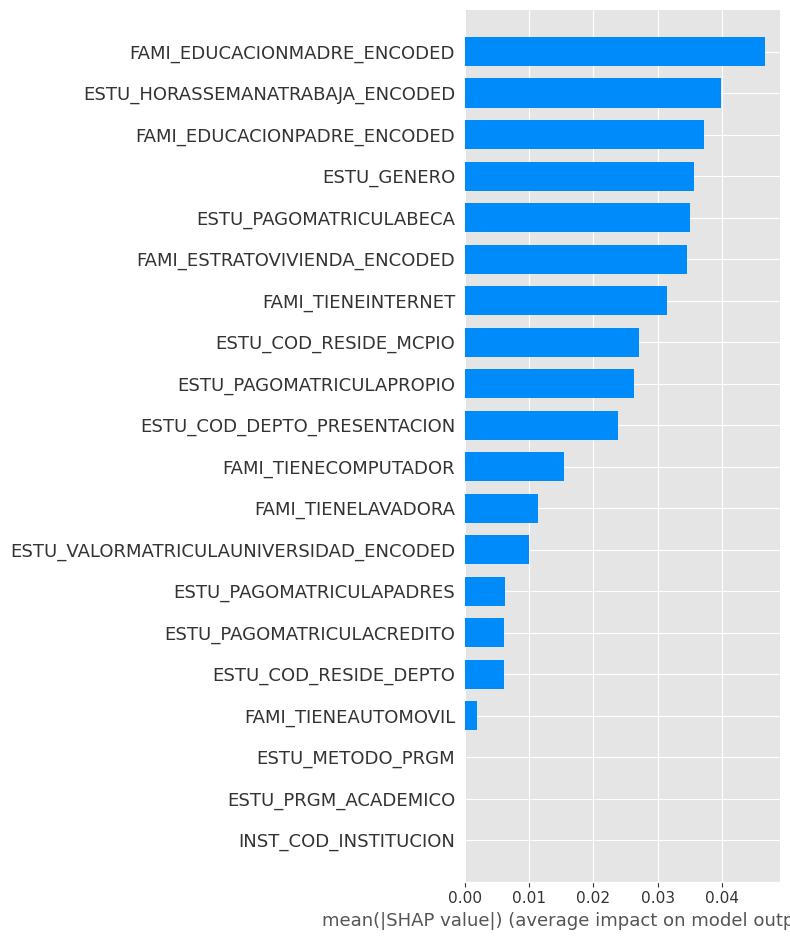

In [146]:
print(f"Summary Plot para le target: {list_of_labels[current_label.value]}")
shap.summary_plot(valores_shap[: , : , current_label.value], 
                  muestra_shap,
                  feature_names = X.columns,
                  plot_type="bar")

In [147]:
# print the JS visualization code to the notebook
shap.initjs()
print(f"Force Plot para el target: {list_of_labels[current_label.value]}")

shap.force_plot(base_value = explicacion.expected_value[current_label.value],
                shap_values = valores_shap[: , : , current_label.value],
                features = muestra_shap)

Force Plot para el target: PUNTAJE_GLOBAL


In [148]:
# Waterfall plot para un registro específico
explicacion_2 = explicacion(muestra_shap)

  0%|          | 0/100 [00:00<?, ?it/s]

Watrfall plot para el target: PUNTAJE_GLOBAL , y el registro 0


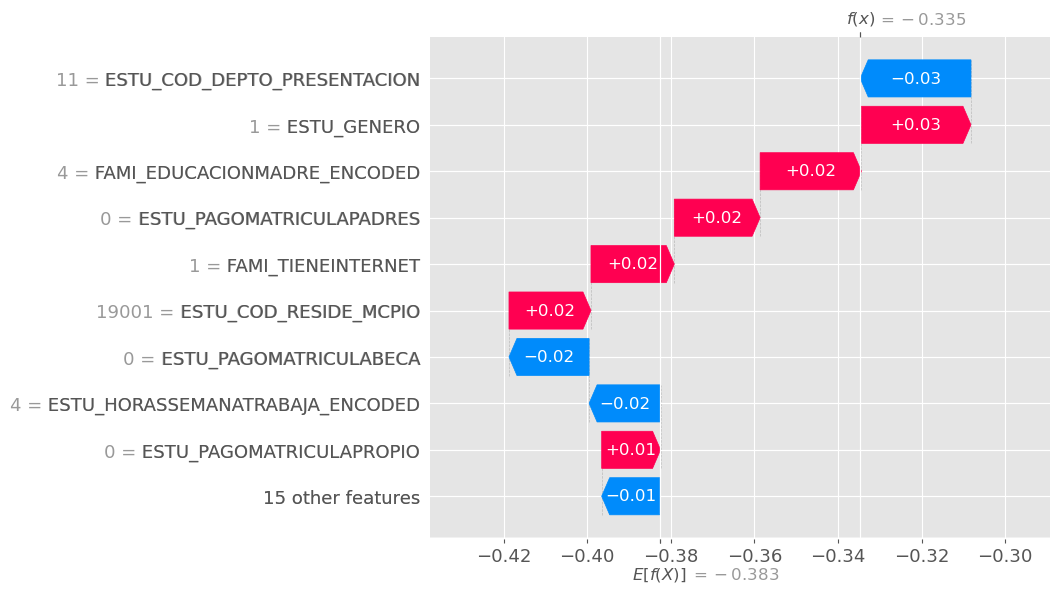

In [149]:
# Mostrar el plot
registro_a_mostrar = 0 # Fila de la cual se quiere mostrar el valor especifico de los shap
print(f"Watrfall plot para el target: {list_of_labels[current_label.value]} , y el registro {registro_a_mostrar}")
shap.plots.waterfall(explicacion_2[0][: , registro_a_mostrar])